<a href="https://colab.research.google.com/github/gabelev/pinns/blob/main/Pinns_plots_gabe_05062024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Authorize me
from google.colab import auth
auth.authenticate_user()

In [ ]:
!mkdir data/

In [ ]:
# Download data

from google.cloud import storage
from pathlib import Path


STORAGE_CLIENT = storage.Client()
BUCKET = STORAGE_CLIENT.get_bucket('pinns_gabe')

prefix = ''
dir = 'data/'

storage_client = storage.Client()
blobs = BUCKET.list_blobs(prefix=prefix)  # Get list of files
for blob in blobs:
    blob.download_to_filename(dir + blob.name)

In [ ]:
import os

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

df = pd.DataFrame()
for filename in os.listdir(dir):
    data = pd.read_csv(dir + filename, header=0)
    df = df.append(data, True)



train_geo = [[df.iloc[i]["train_geo_start"], df.iloc[i]["train_geo_end"], df.iloc[i]["train_geo_end"], df.iloc[i]["train_geo_start"]] for i in range(df.shape[0])]
test_geo = [[df.iloc[i]["test_geo_start"], df.iloc[i]["test_geo_end"], df.iloc[i]["test_geo_end"], df.iloc[i]["test_geo_start"]] for i in range(df.shape[0])]
train_time = [[df.iloc[i]["train_time_start"], df.iloc[i]["train_time_start"], df.iloc[i]["train_time_end"], df.iloc[i]["train_time_end"]] for i in range(df.shape[0])]
test_time = [[df.iloc[i]["test_time_start"], df.iloc[i]["test_time_start"], df.iloc[i]["test_time_end"], df.iloc[i]["test_time_end"]] for i in range(df.shape[0])]
l2 = [df.iloc[i]["l2_relative_error"] for i in range(df.shape[0])]




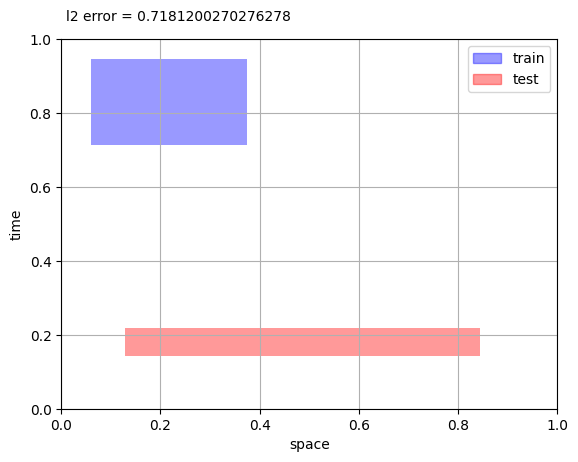

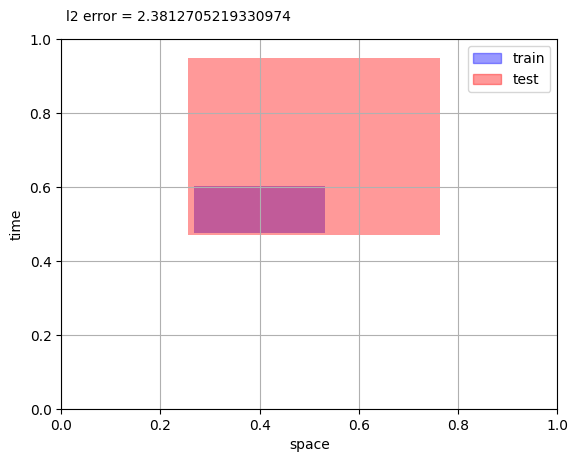

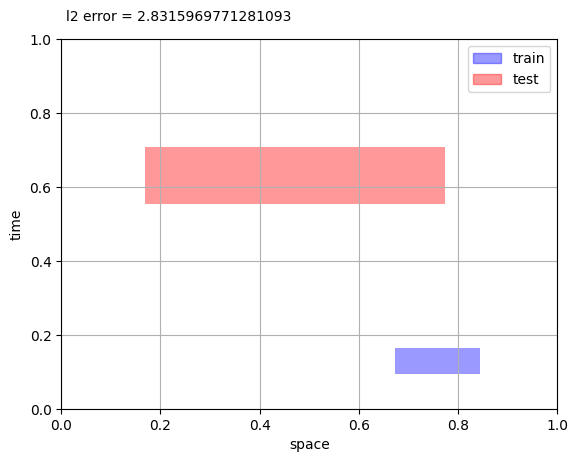

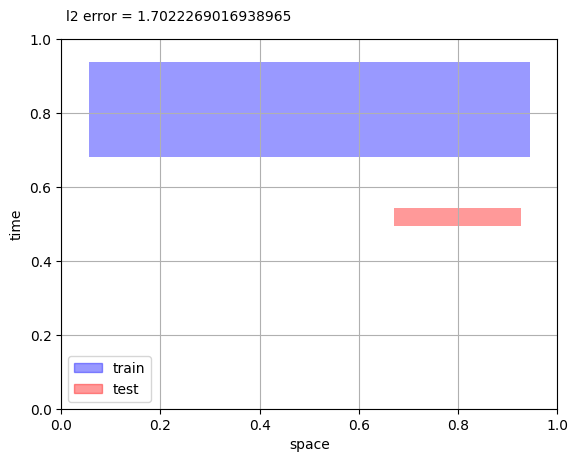

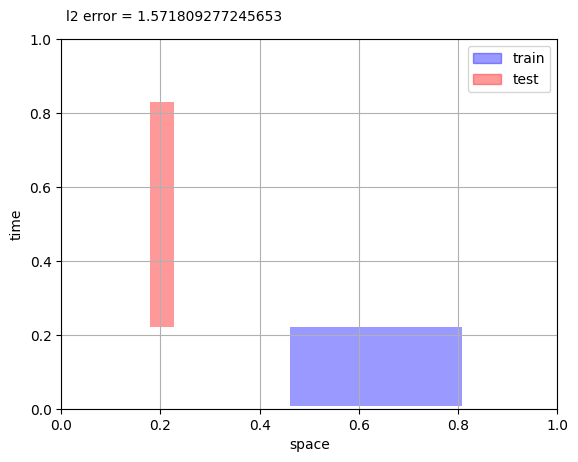

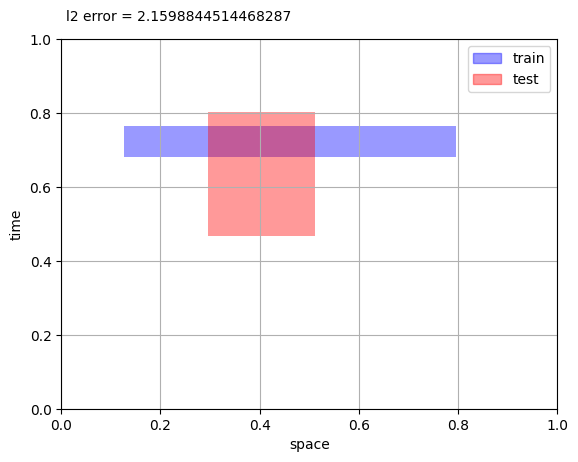

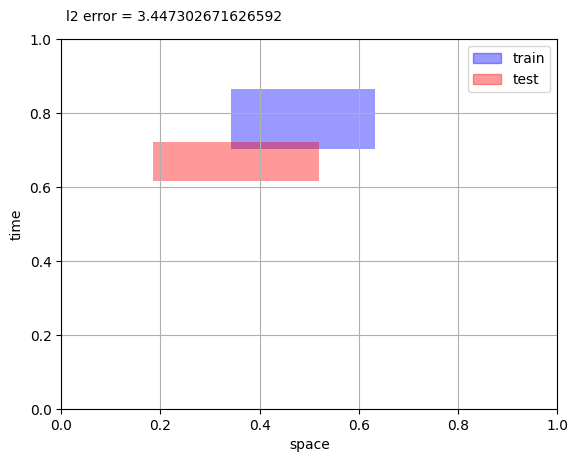

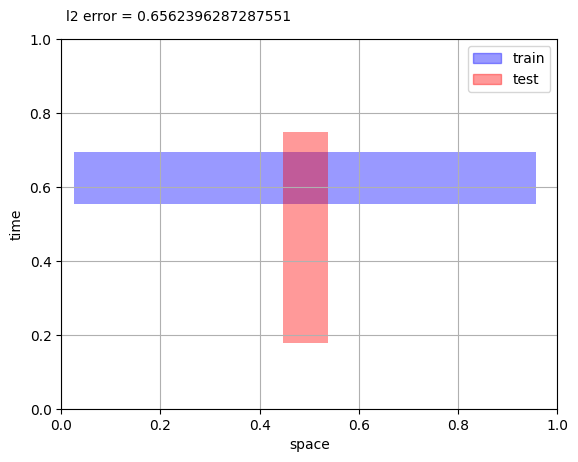

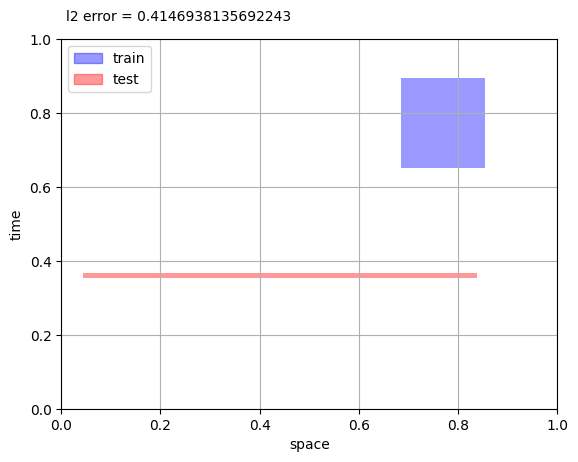

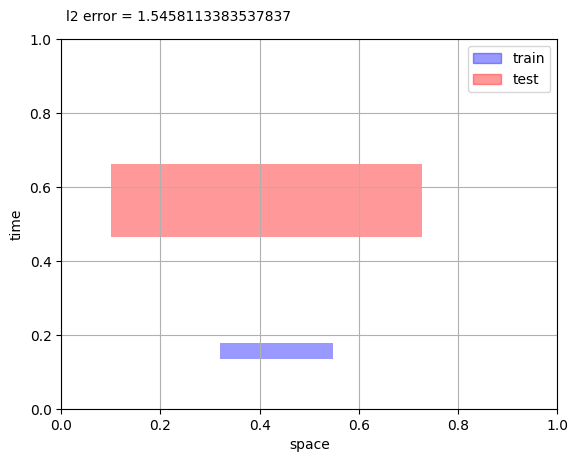

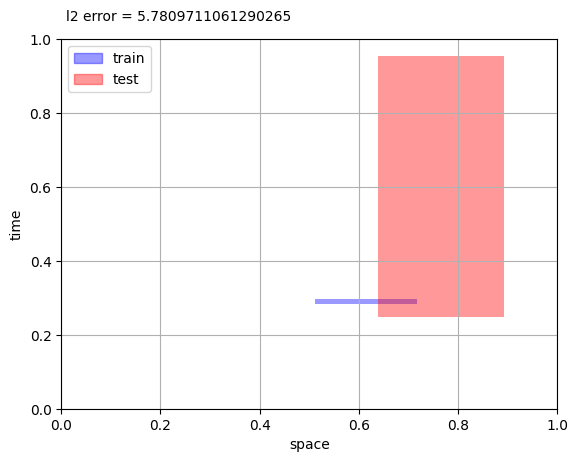

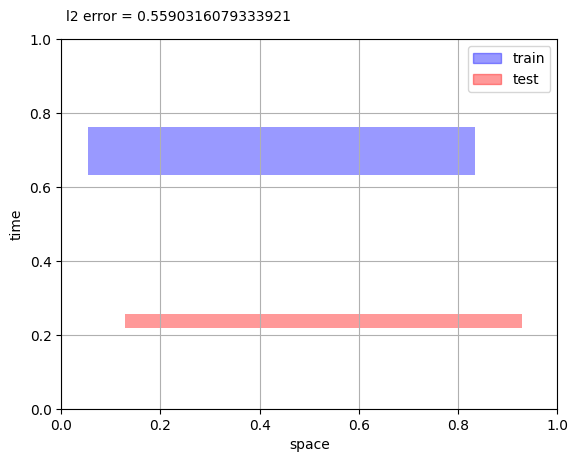

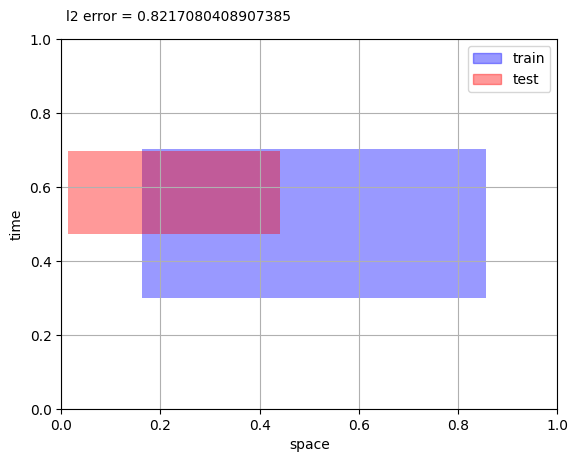

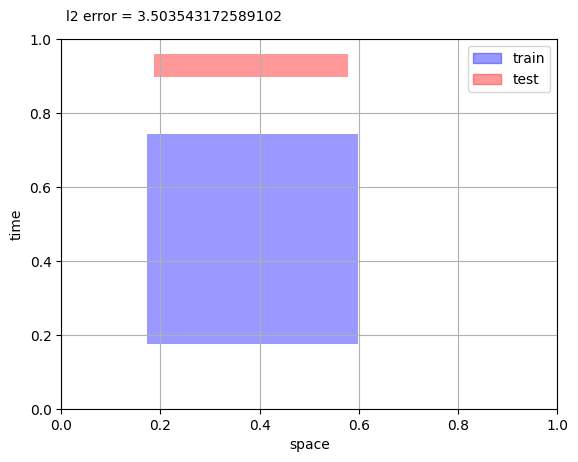

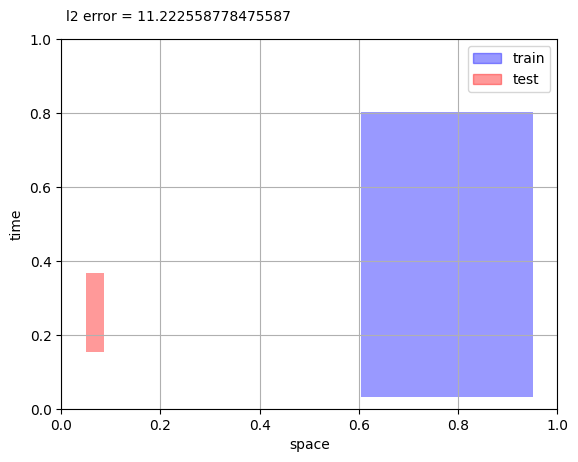

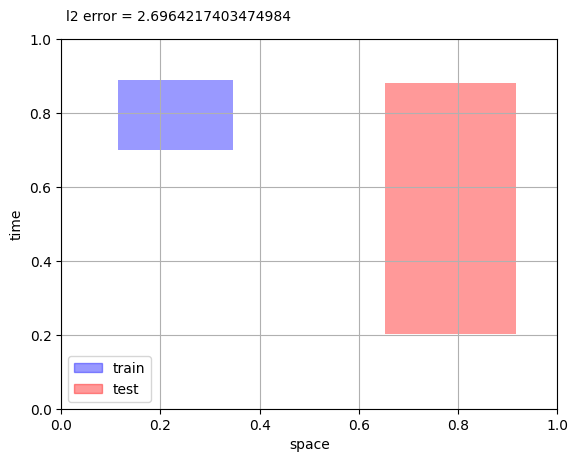

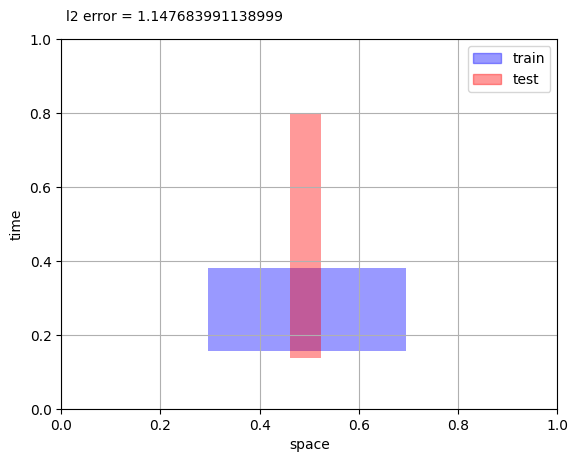

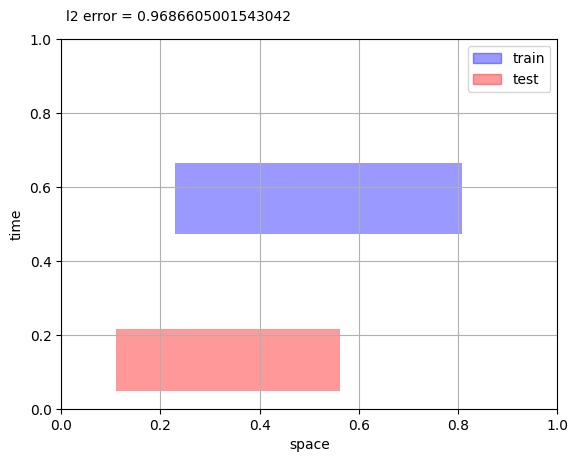

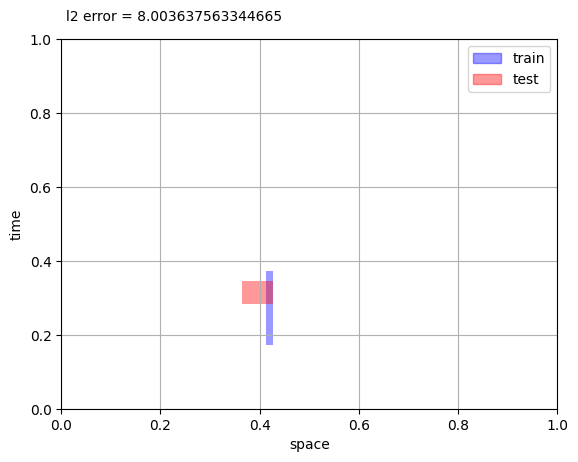

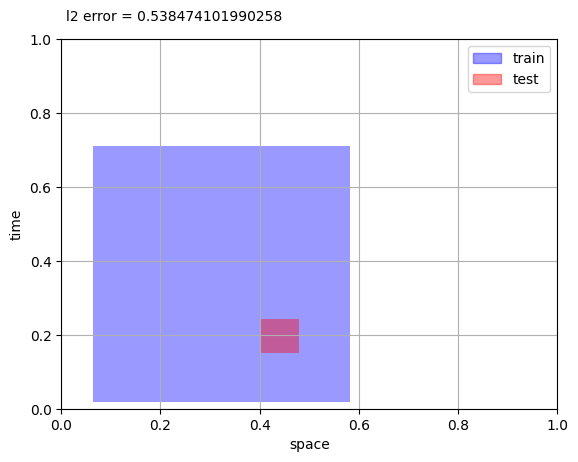

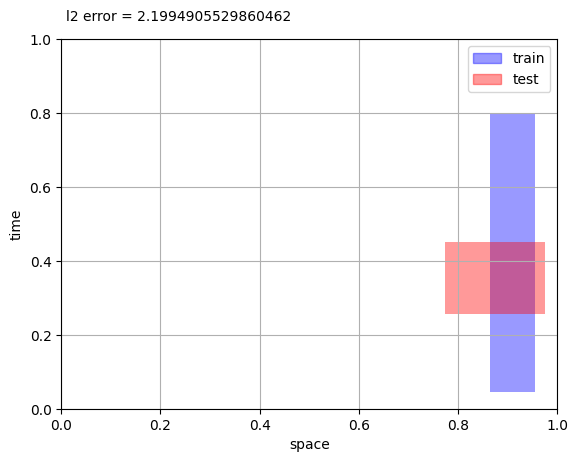

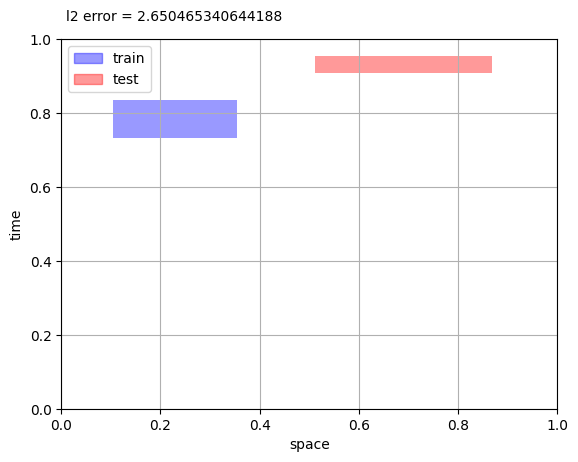

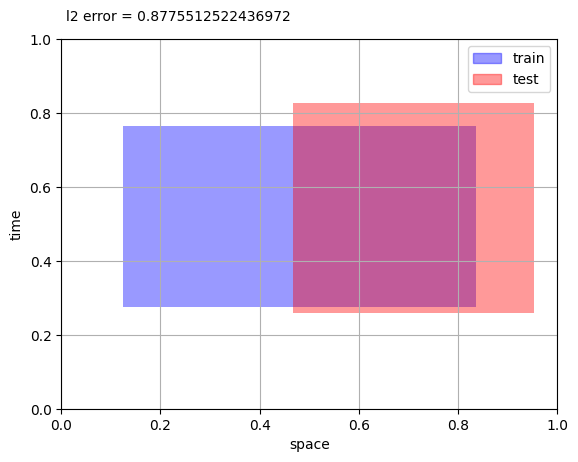

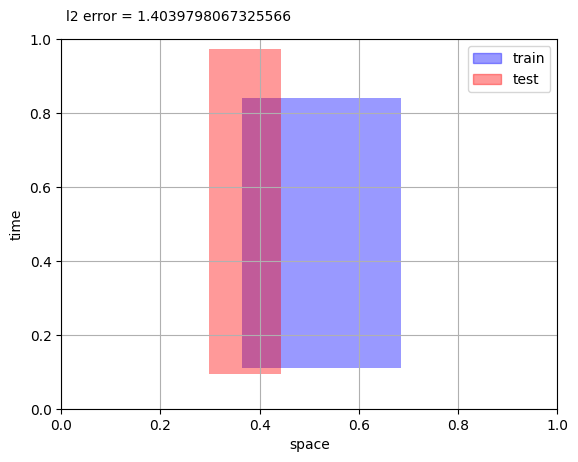

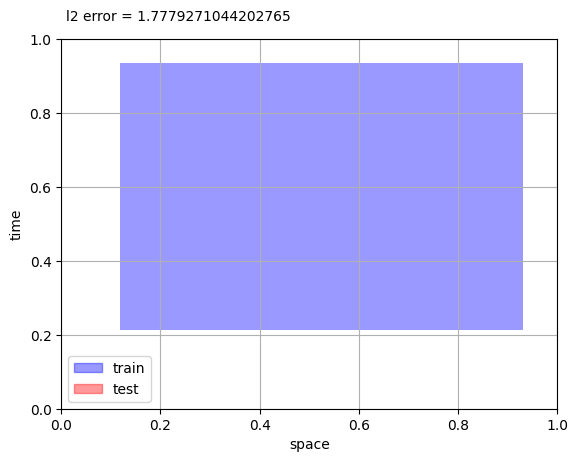

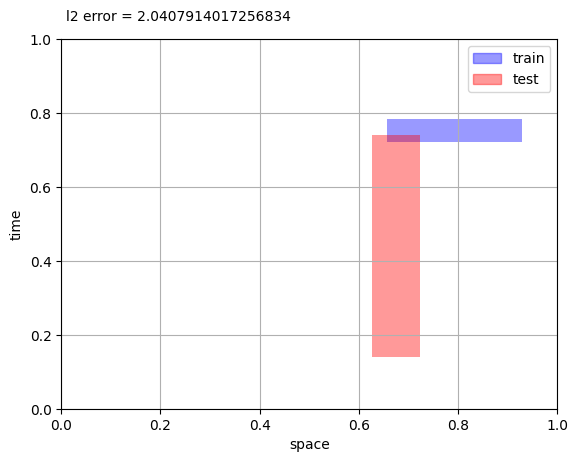

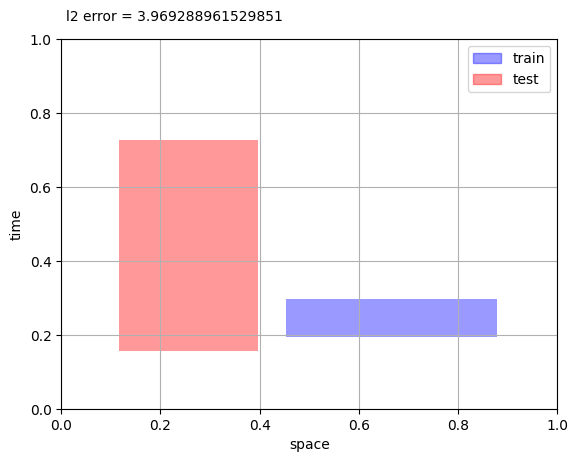

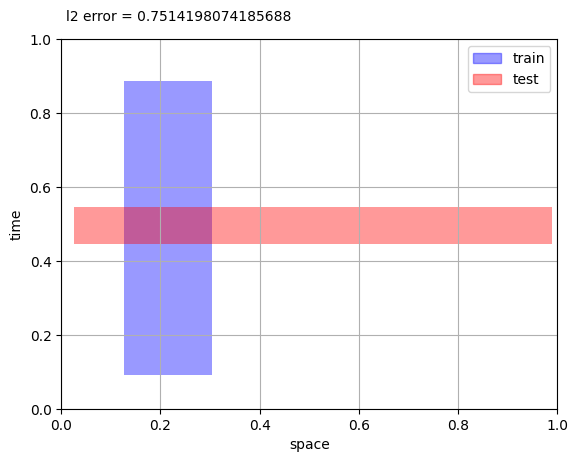

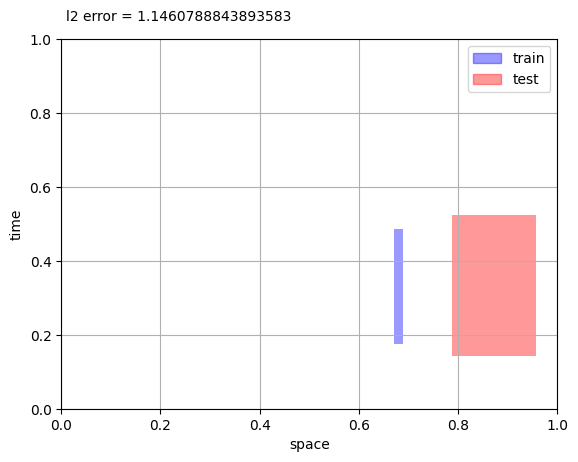

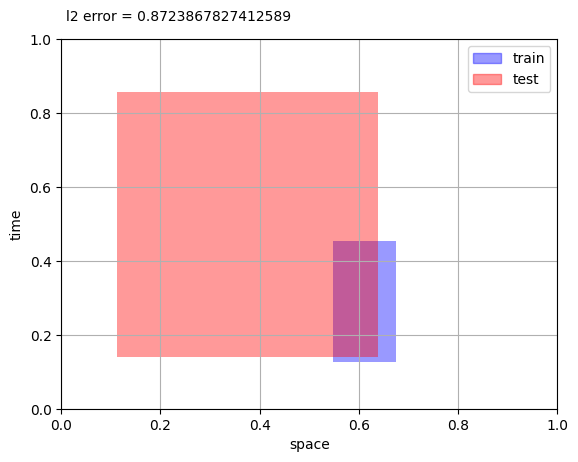

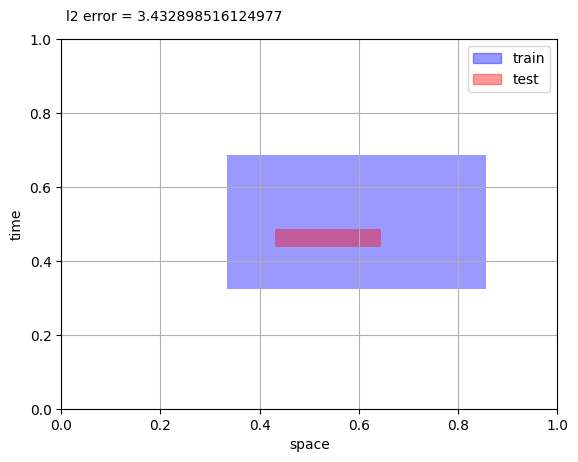

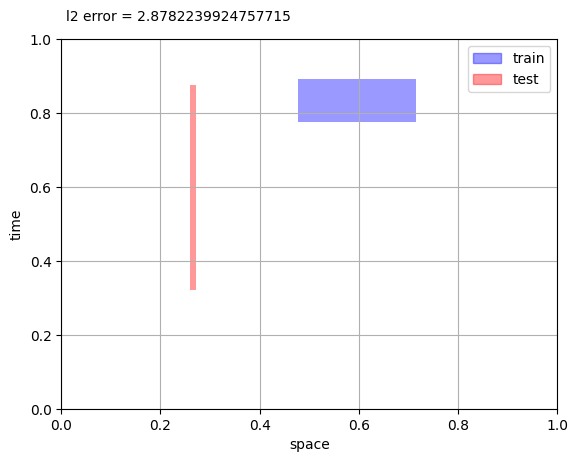

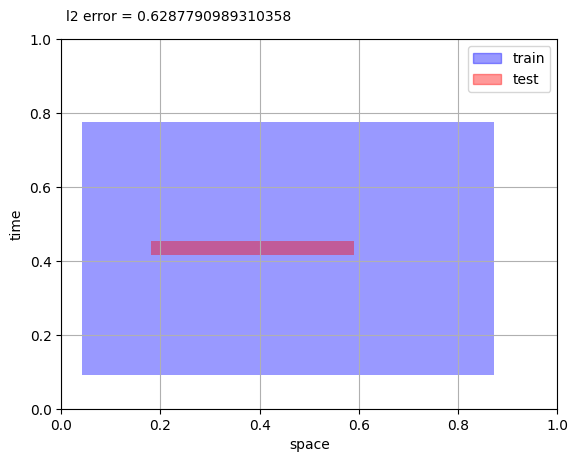

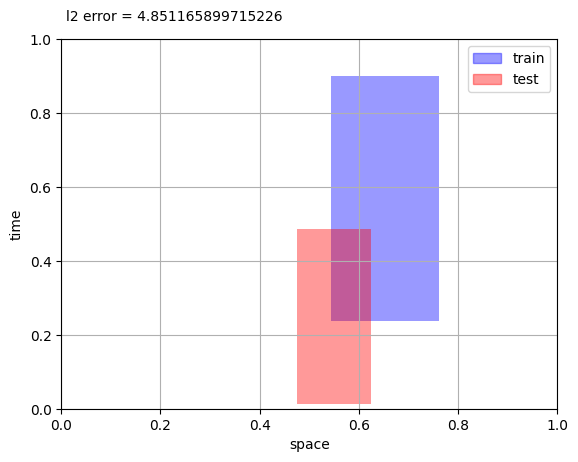

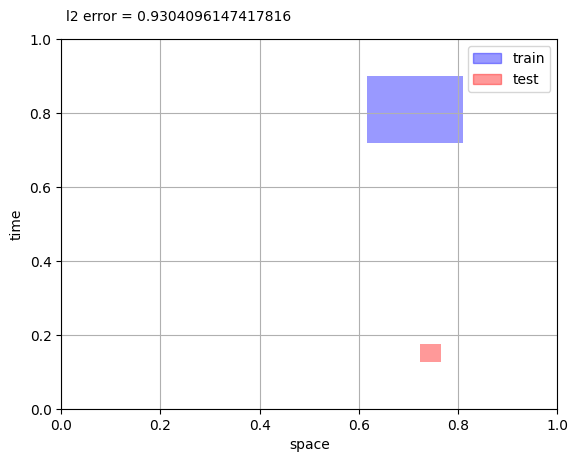

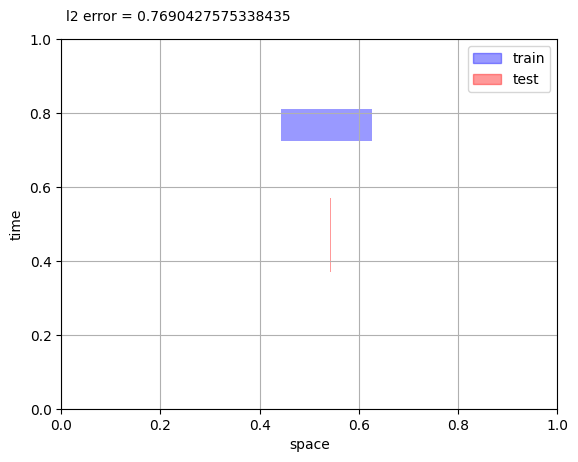

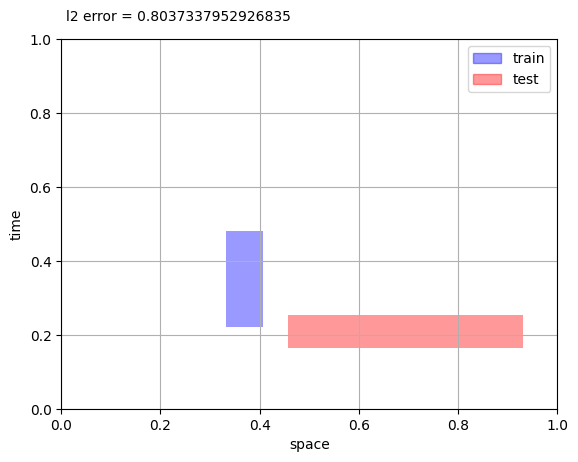

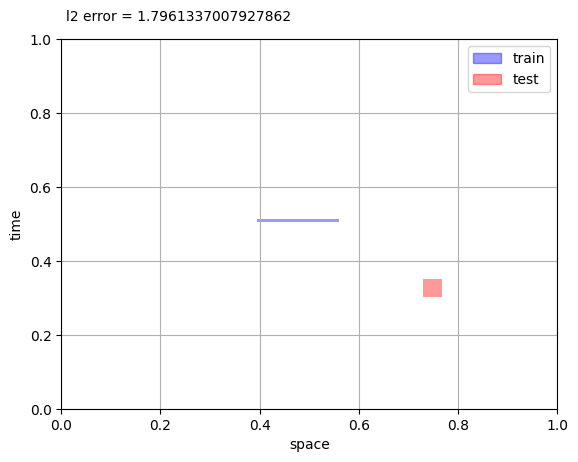

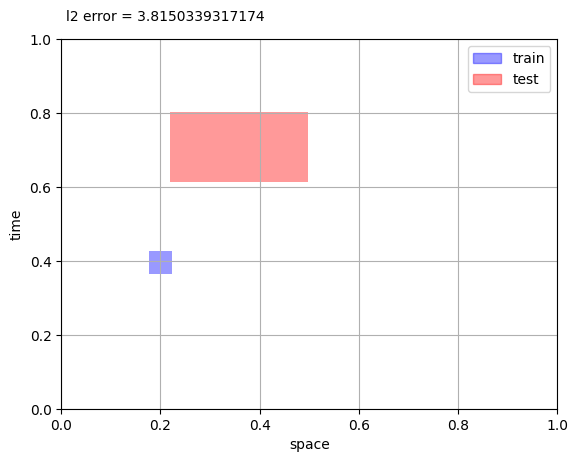

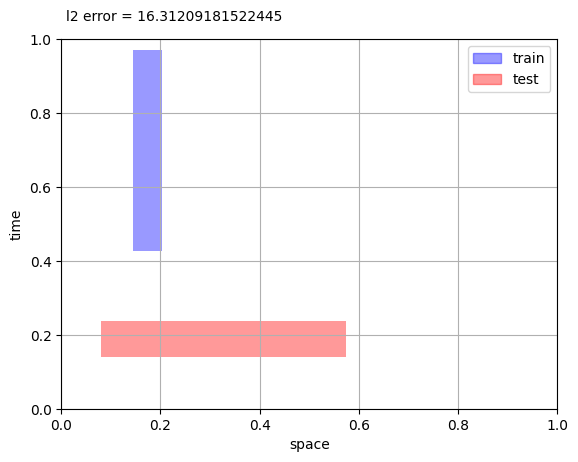

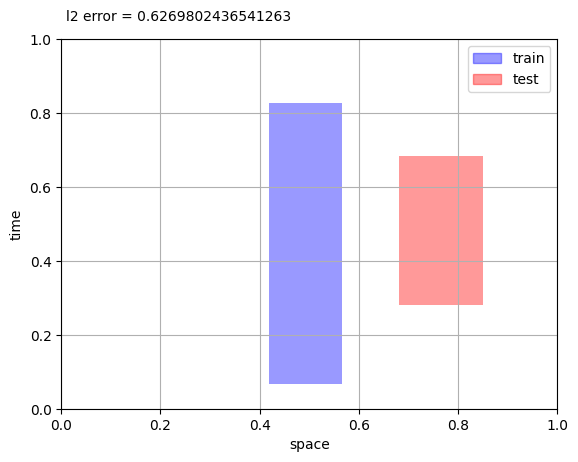

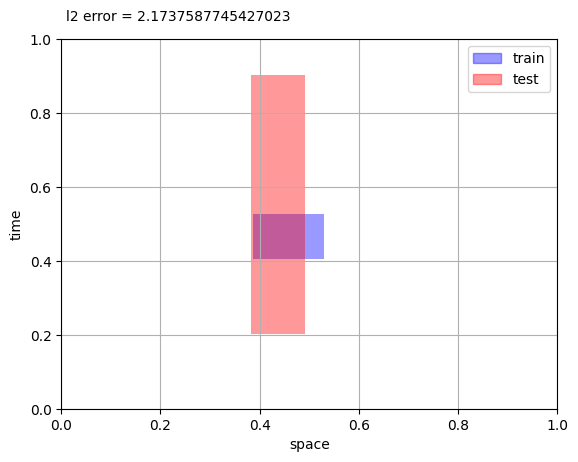

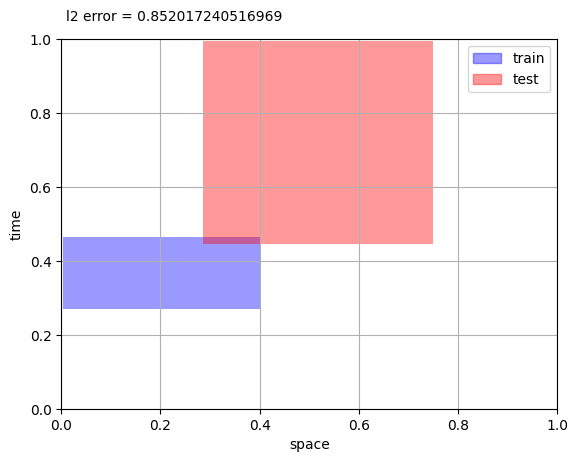

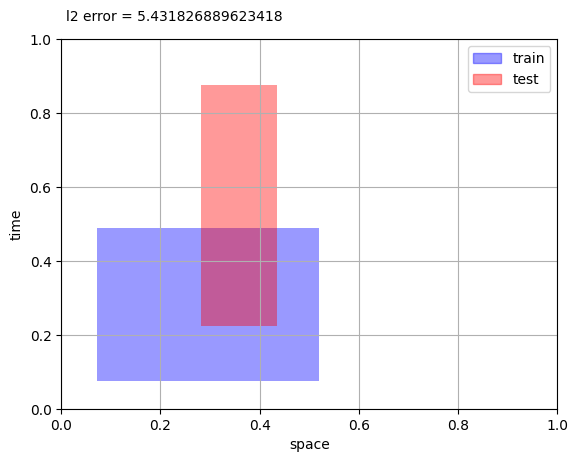

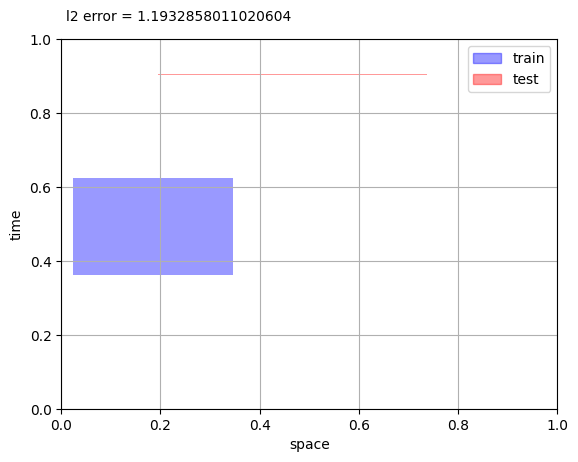

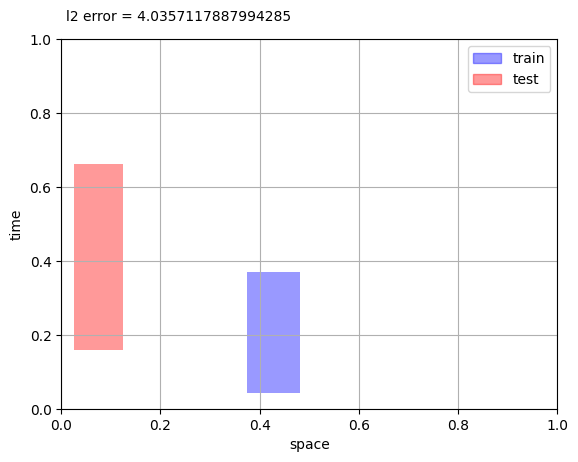

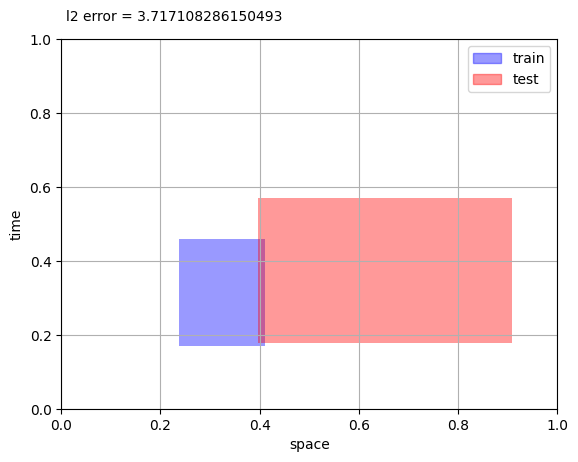

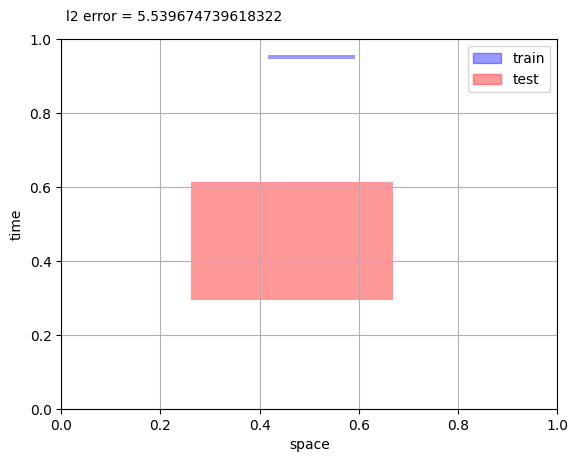

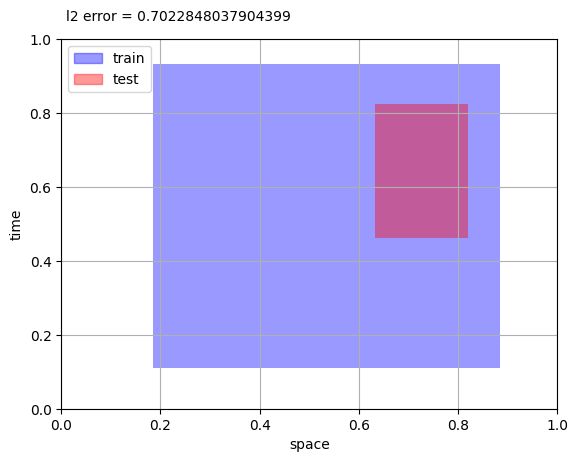

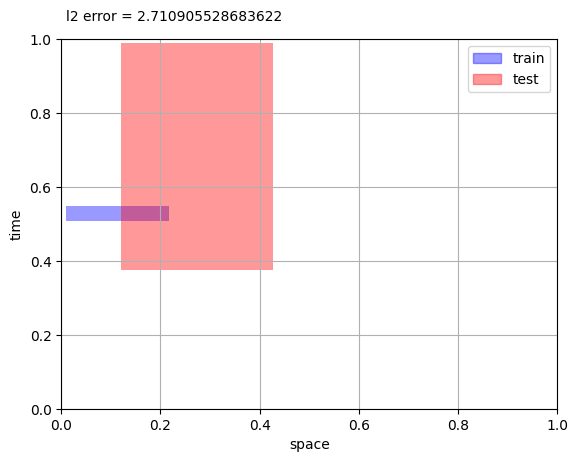

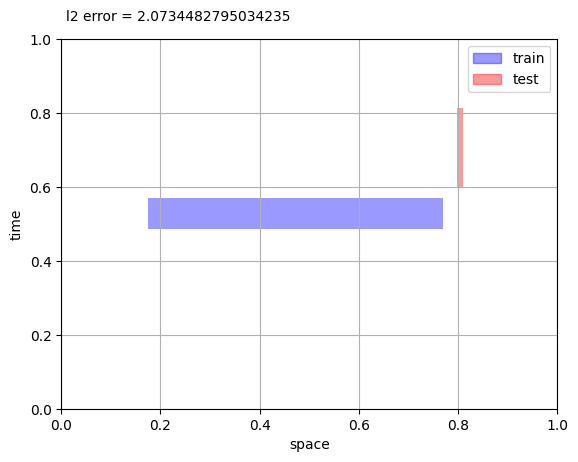

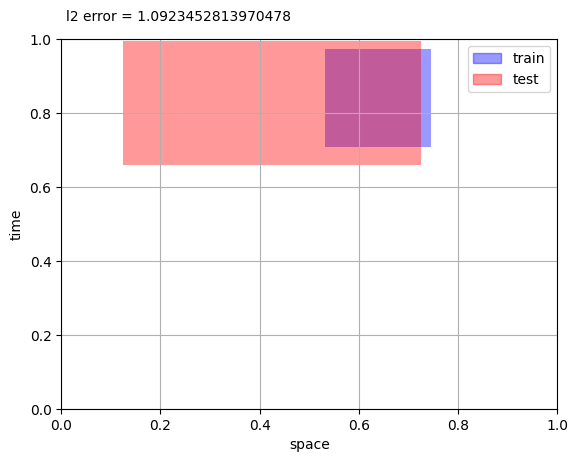

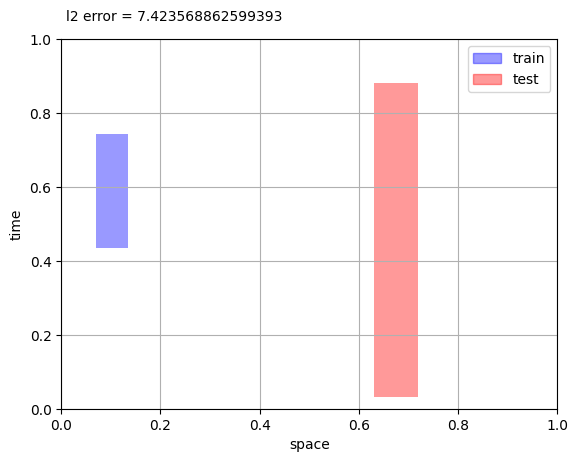

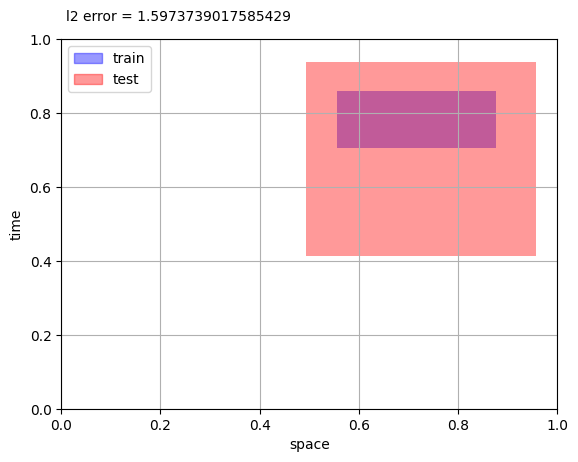

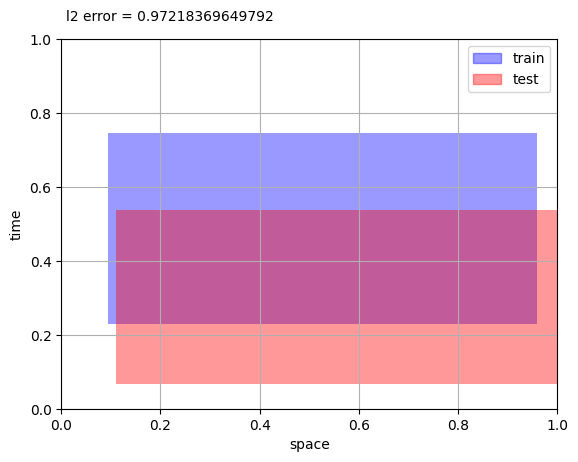

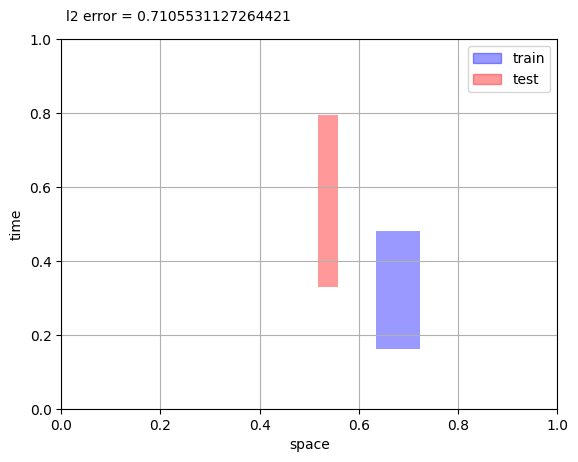

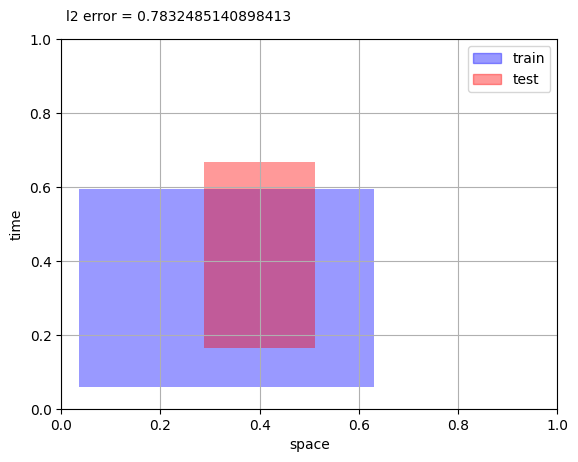

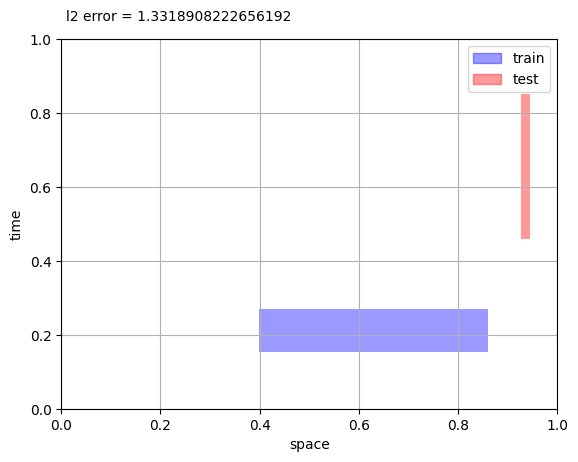

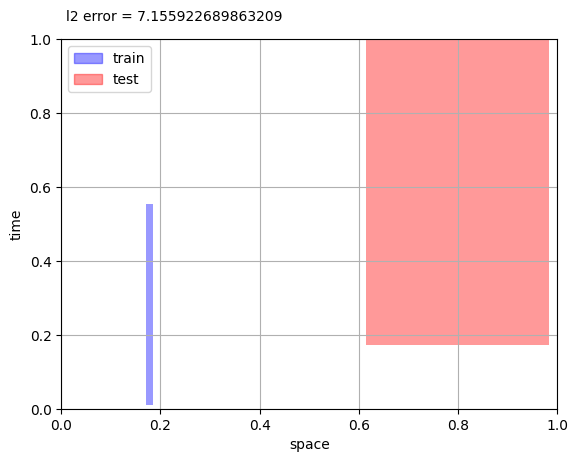

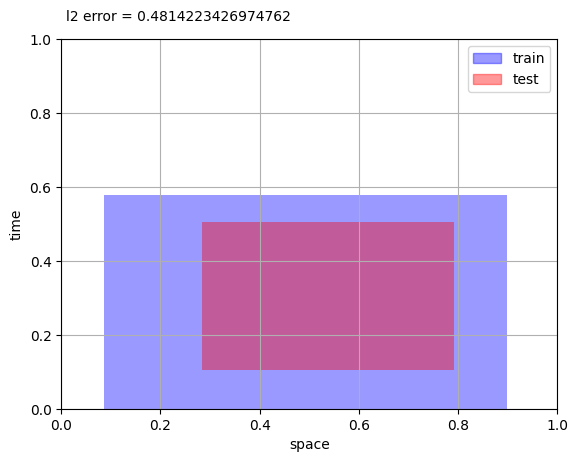

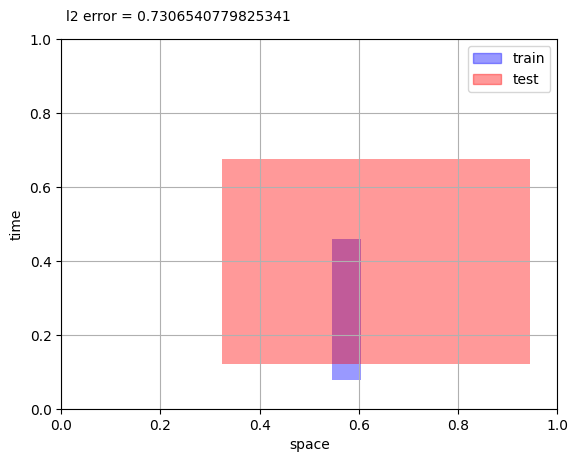

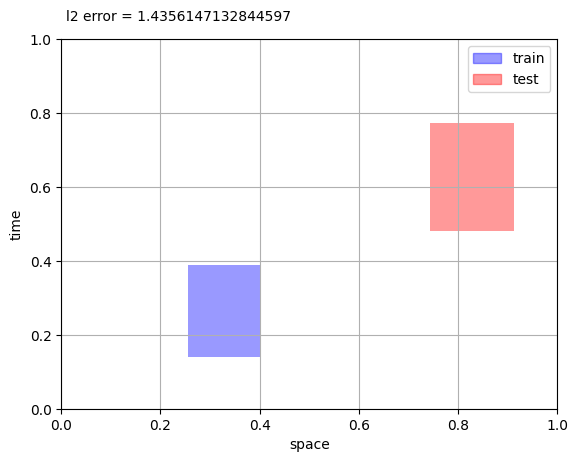

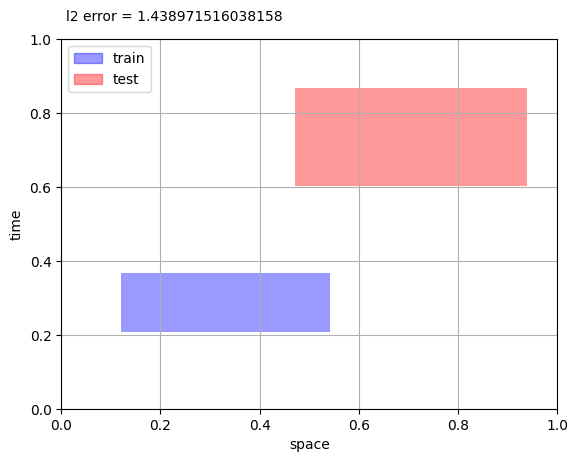

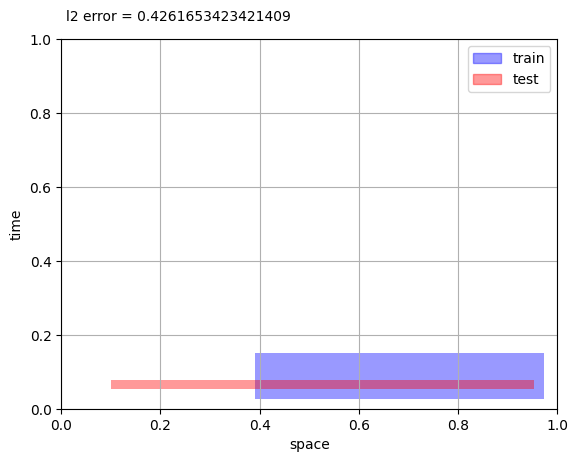

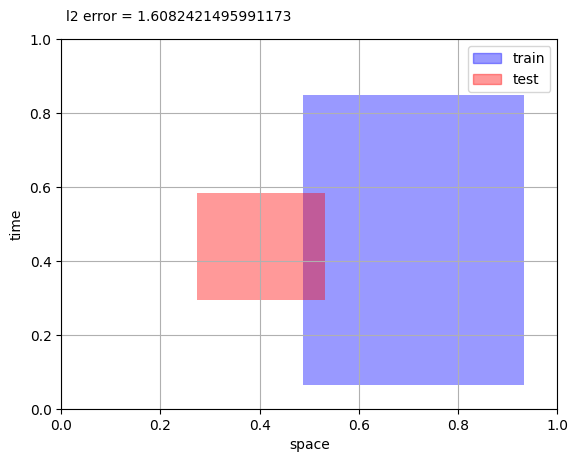

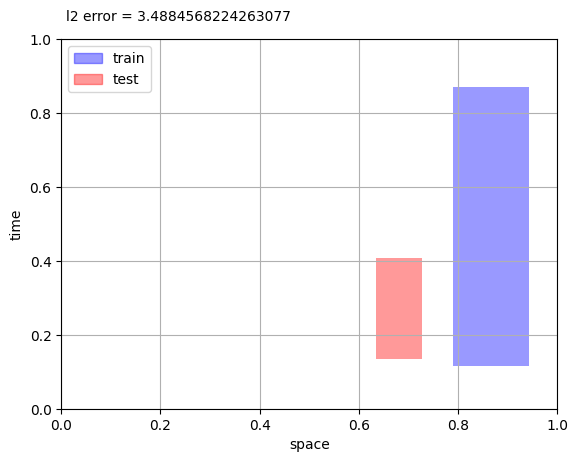

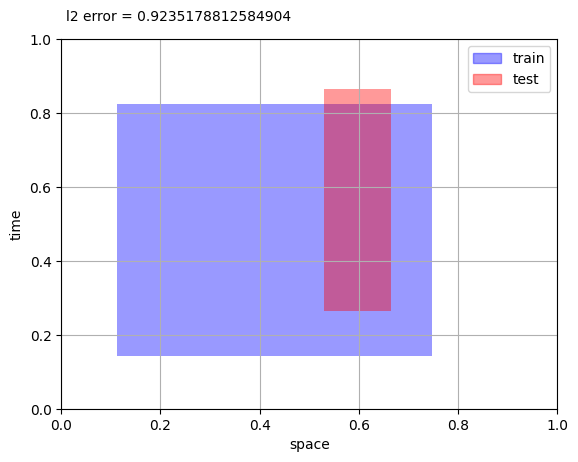

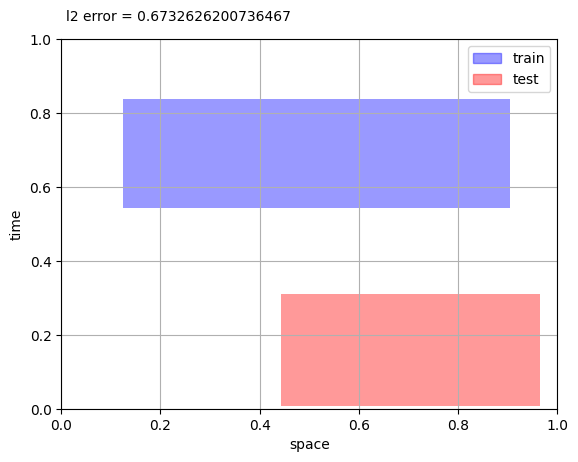

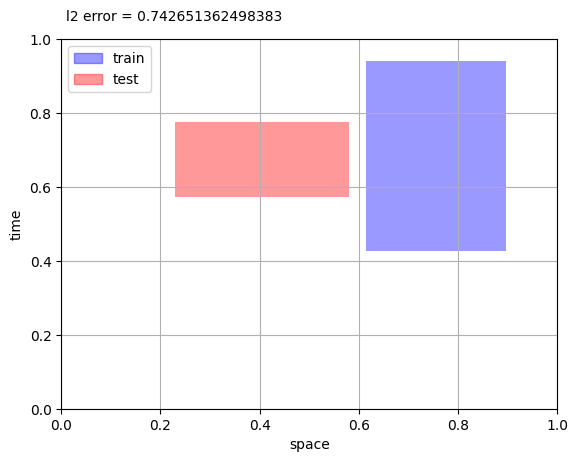

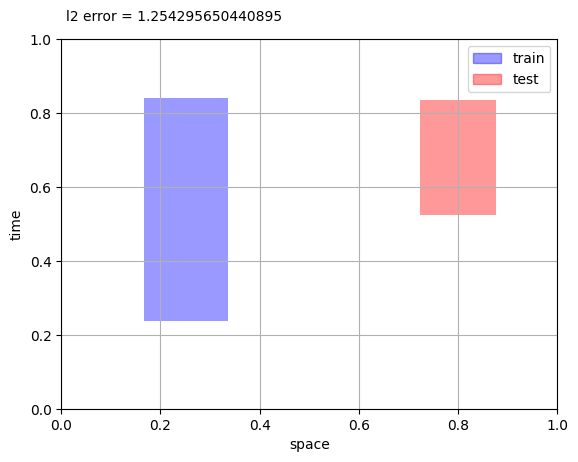

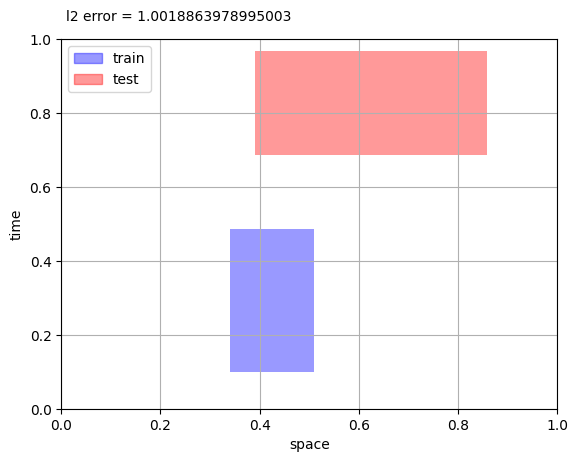

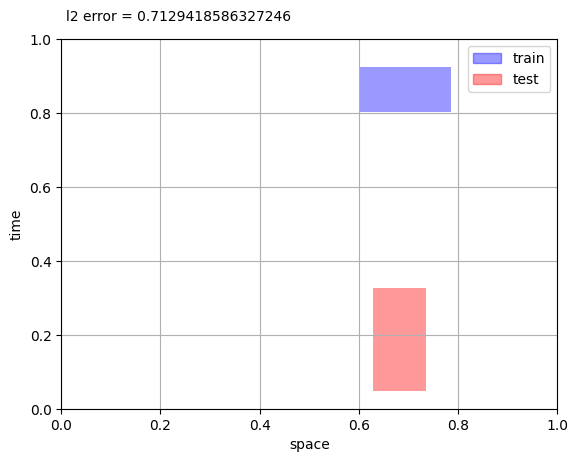

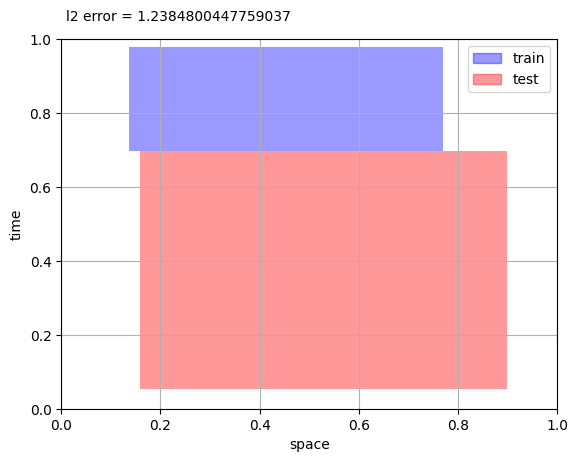

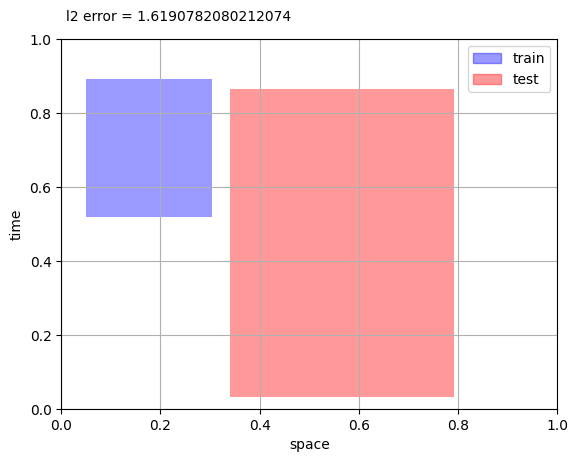

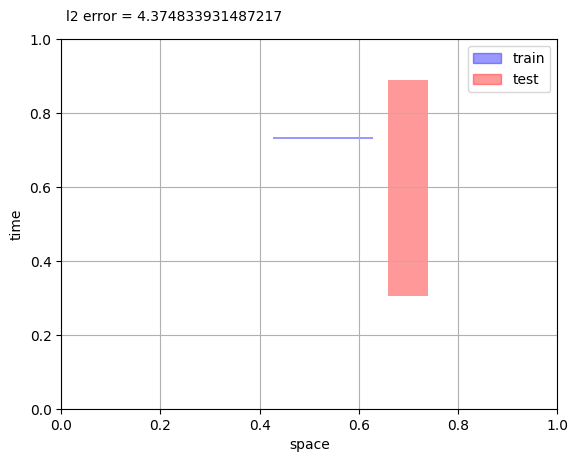

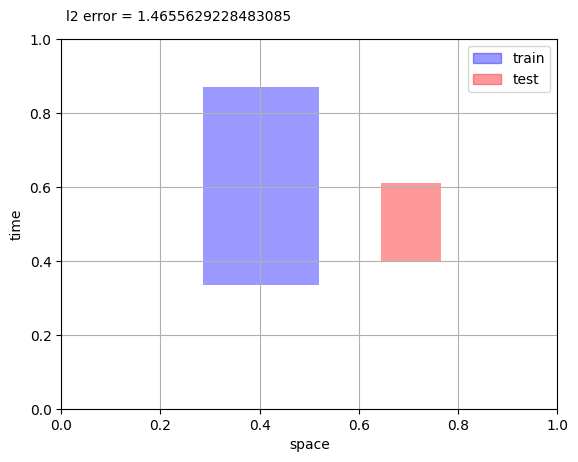

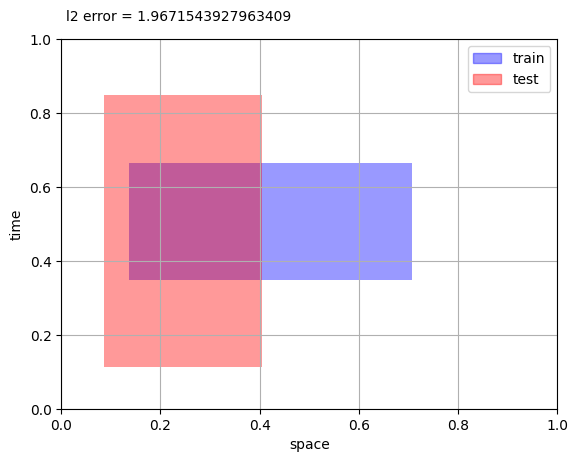

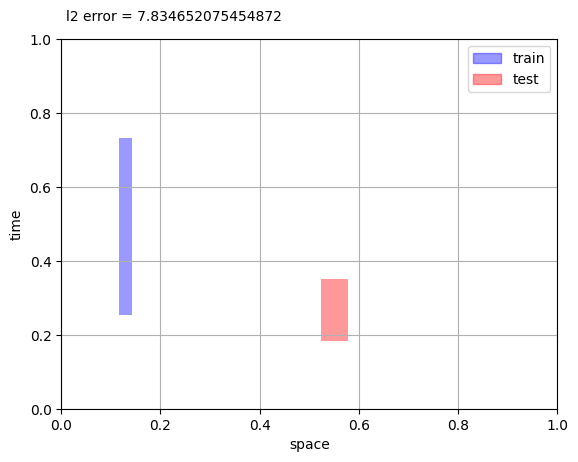

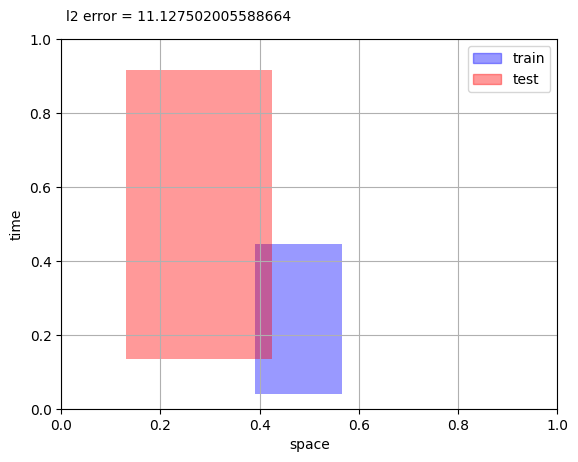

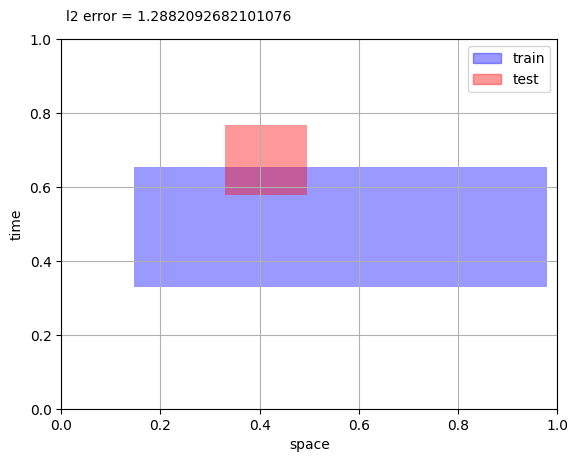

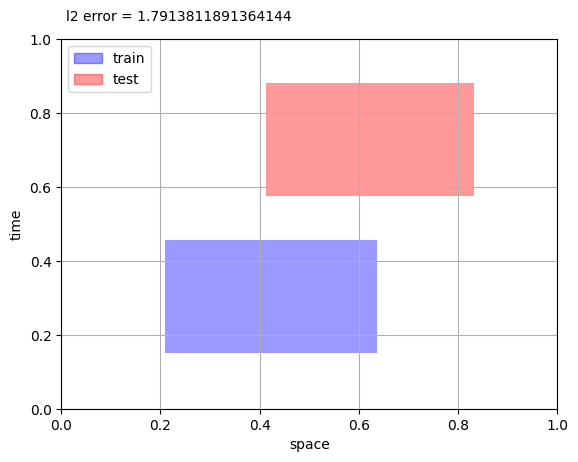

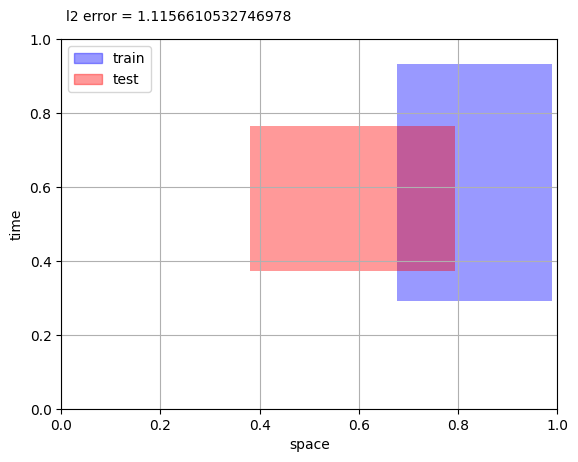

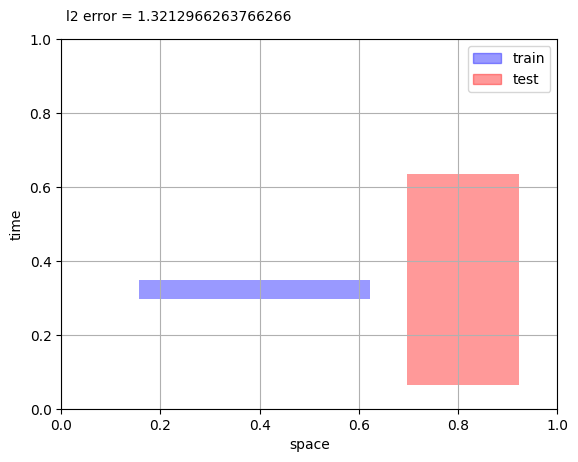

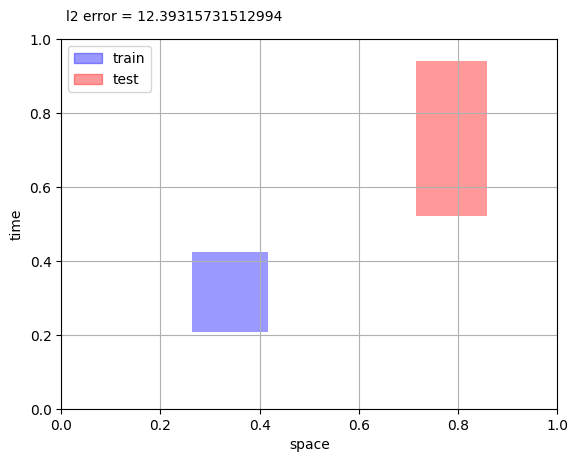

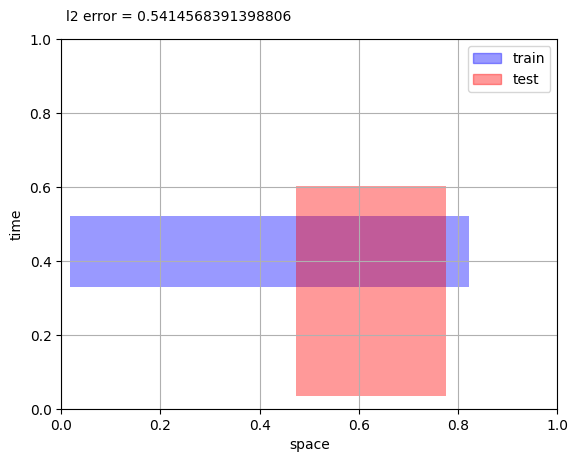

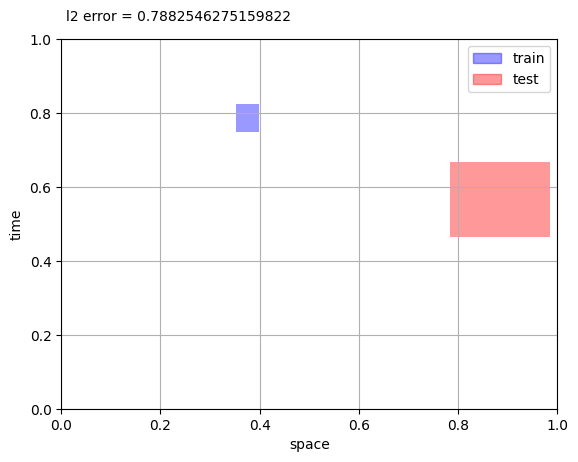

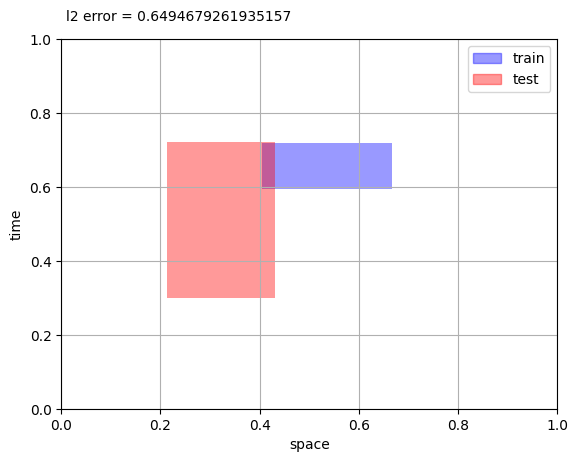

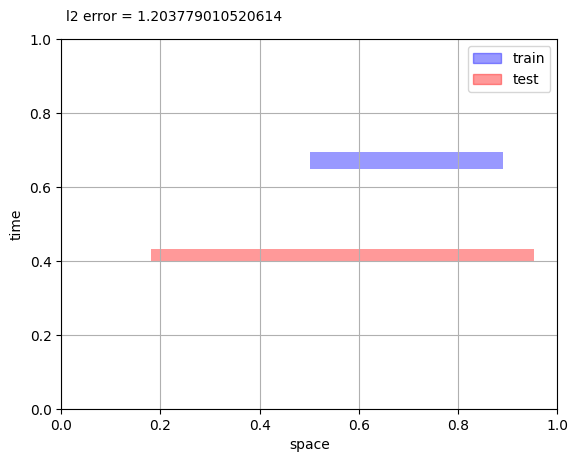

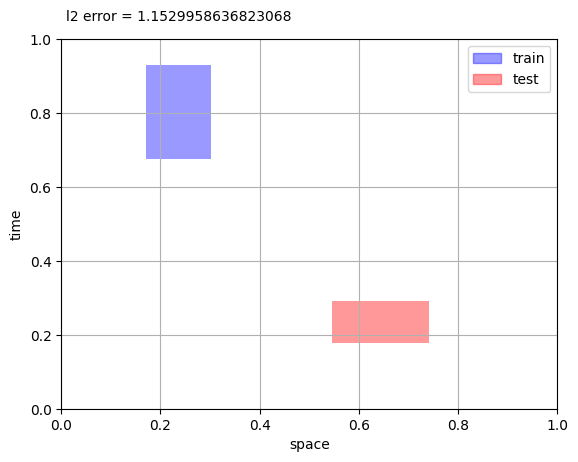

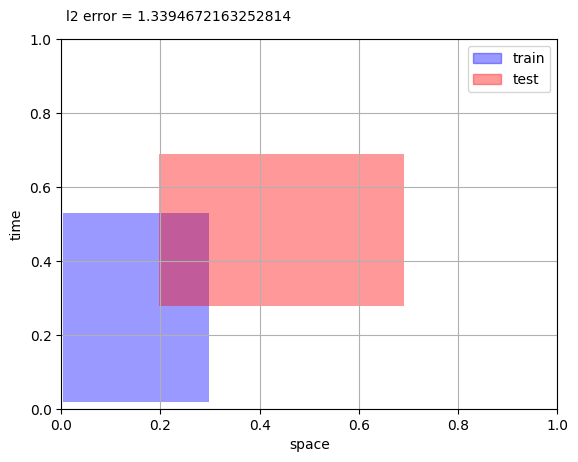

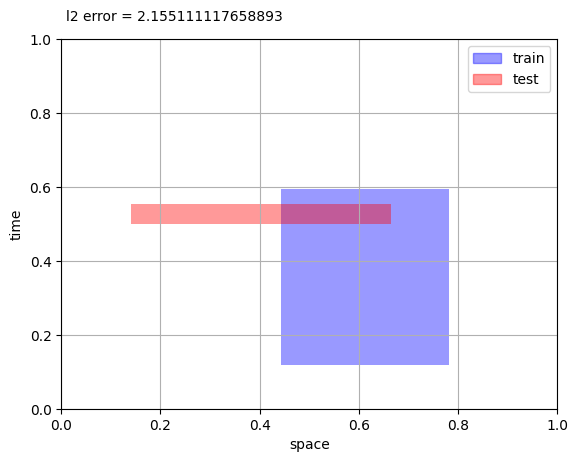

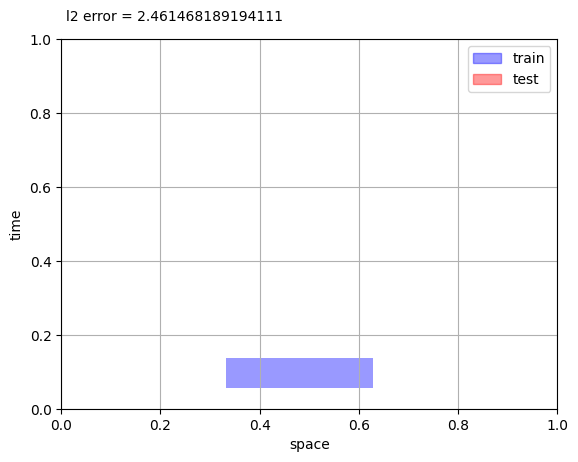

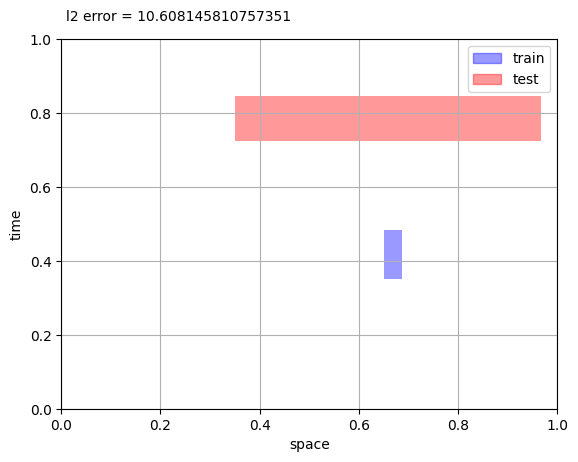

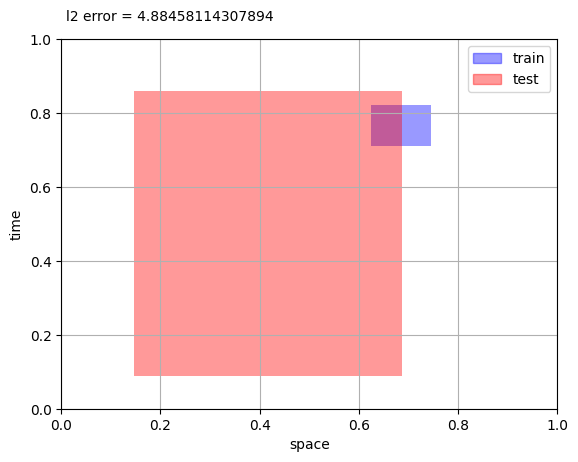

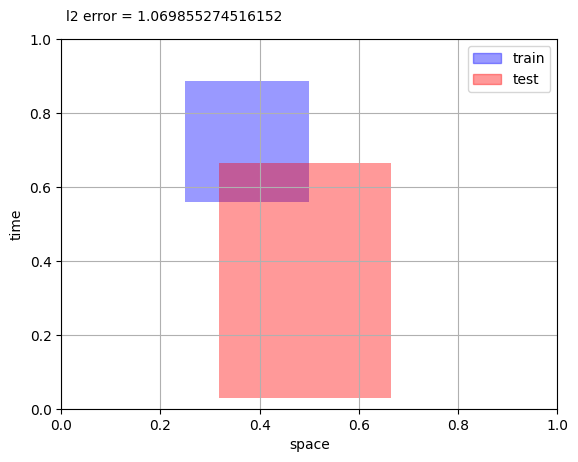

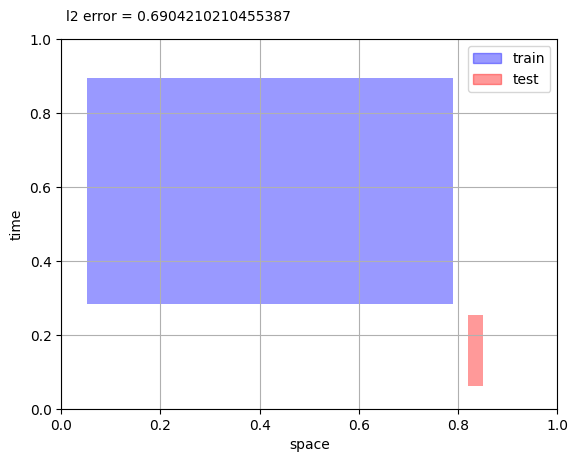

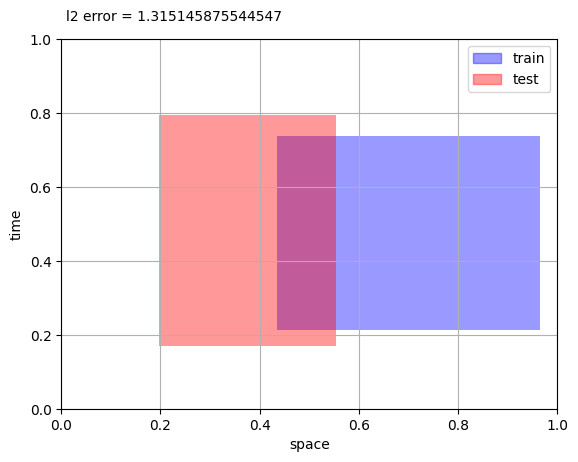

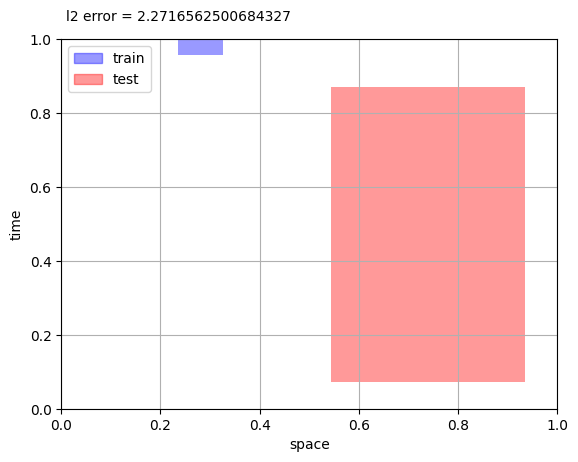

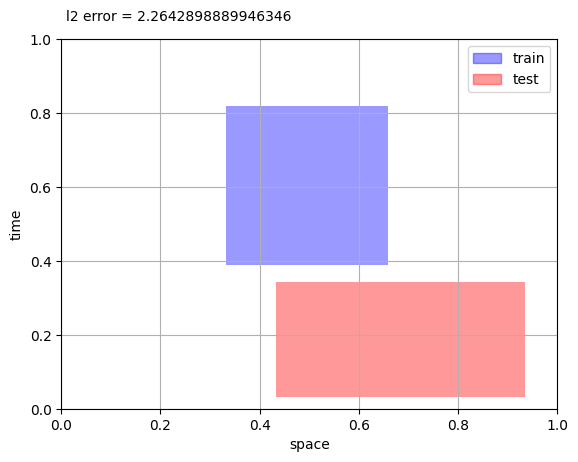

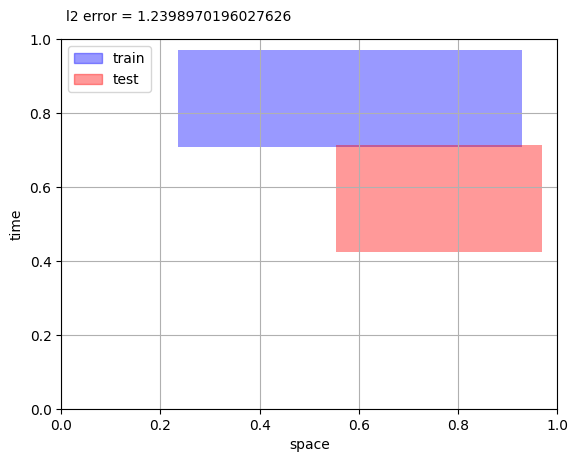

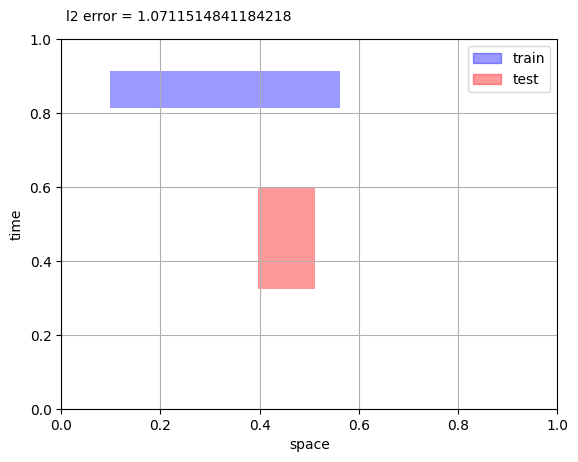

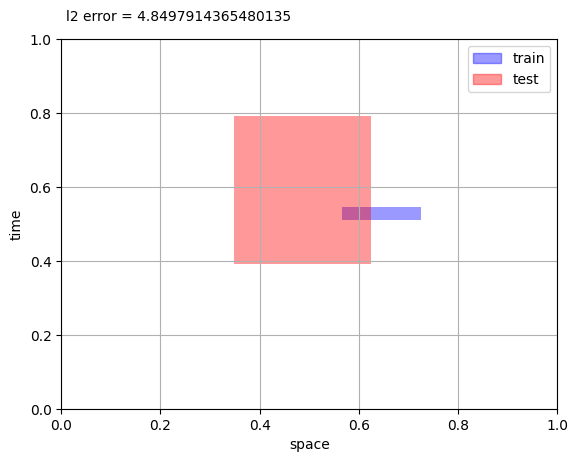

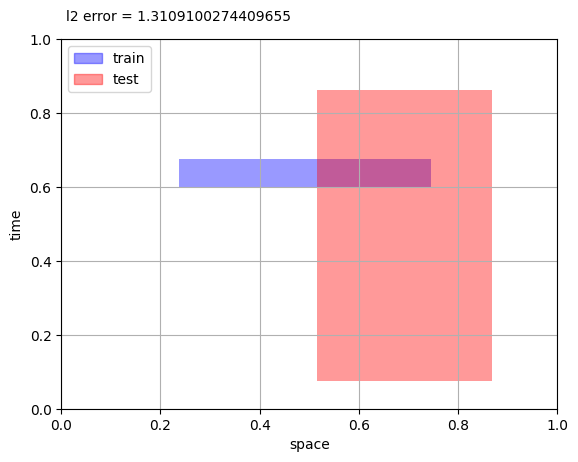

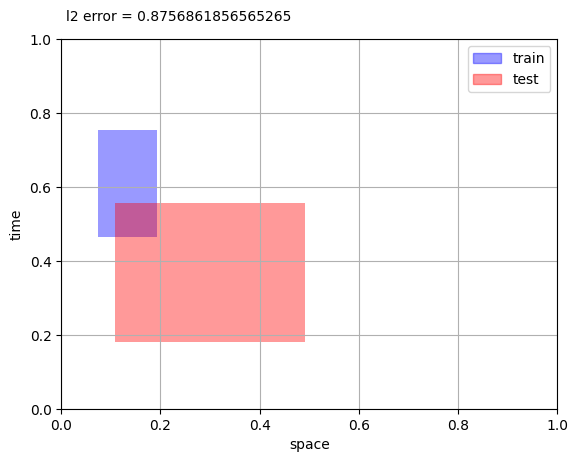

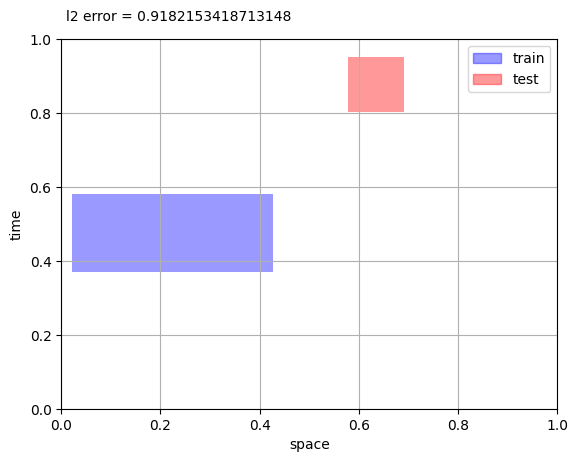

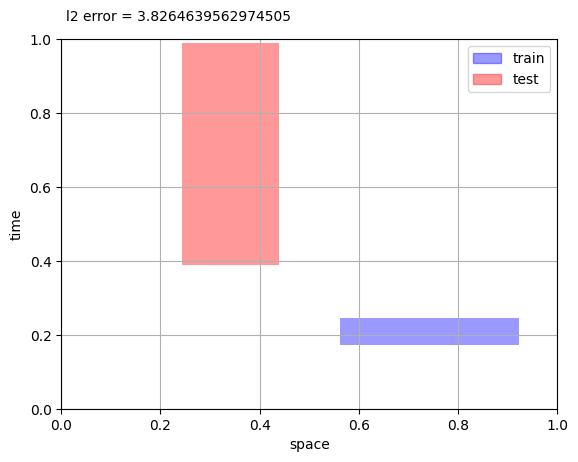

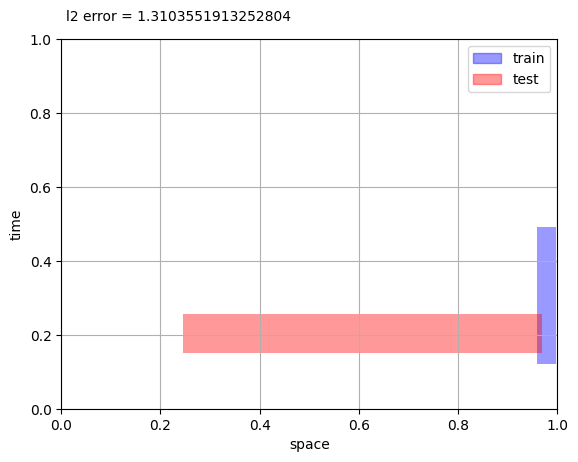

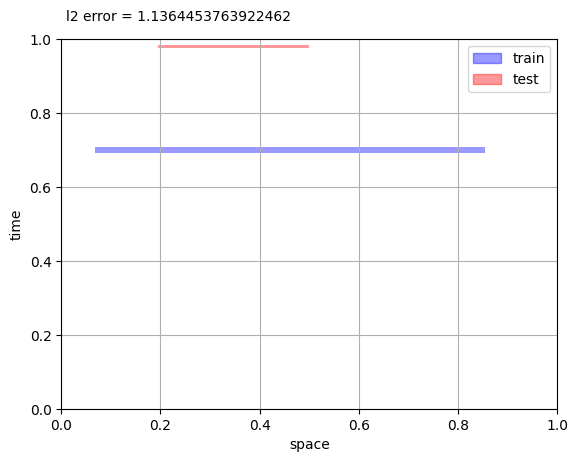

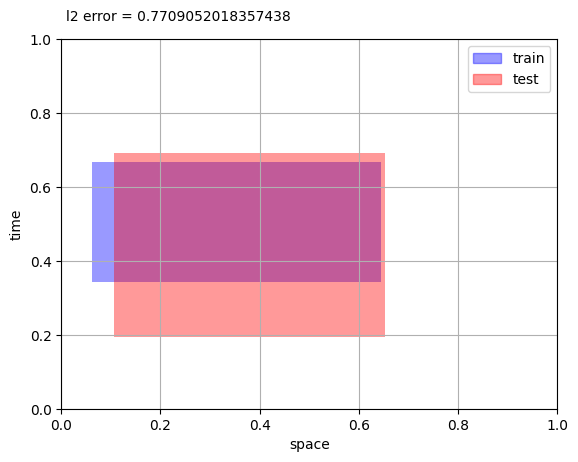

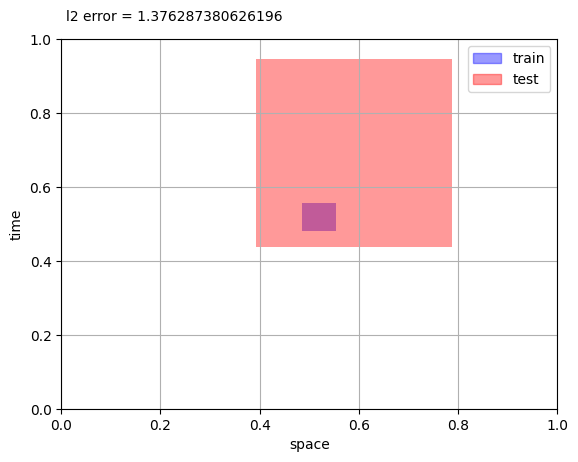

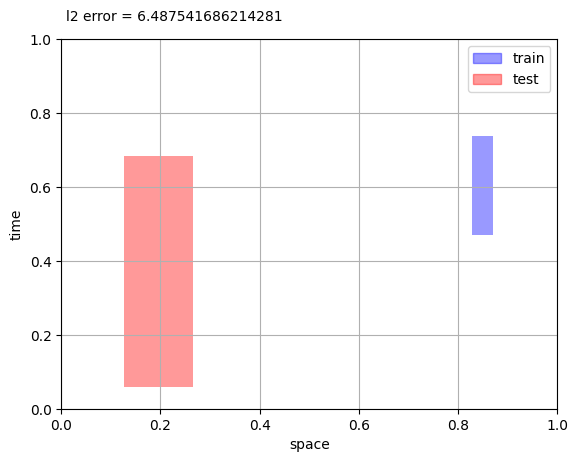

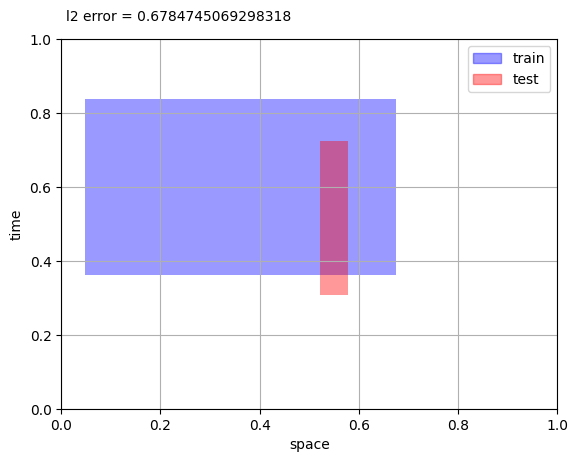

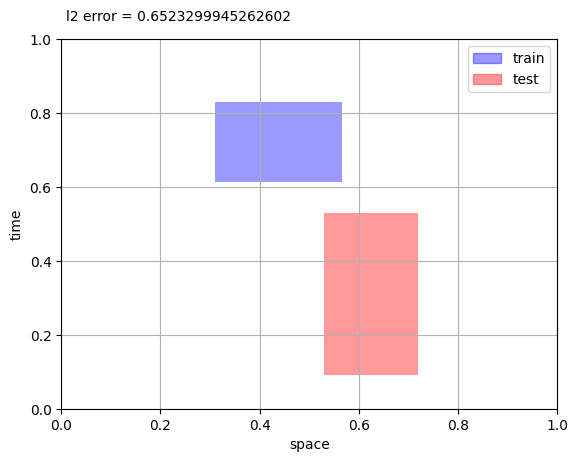

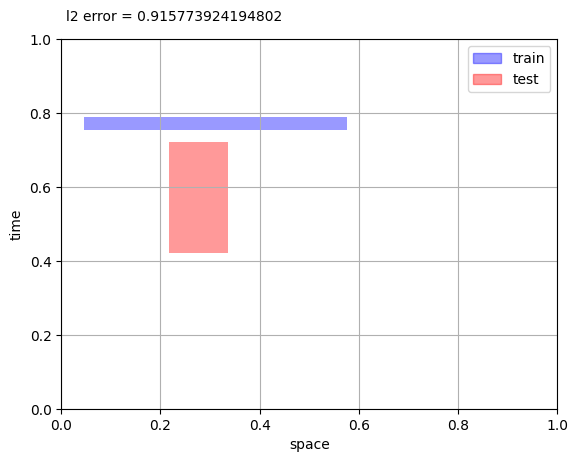

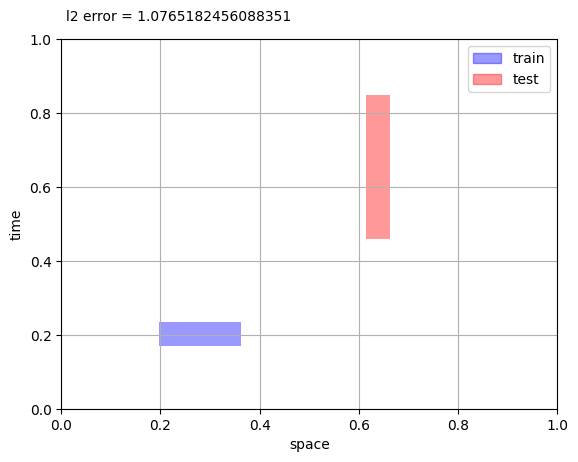

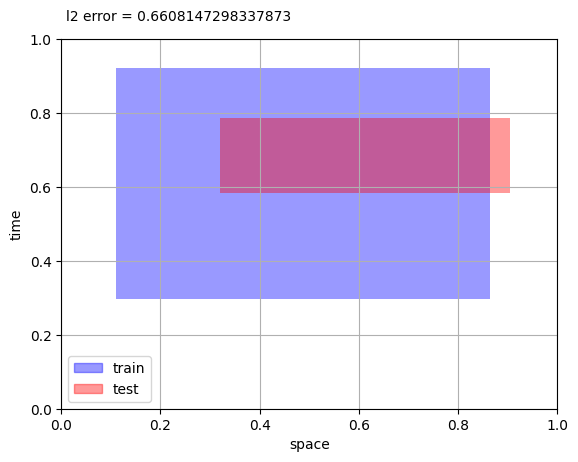

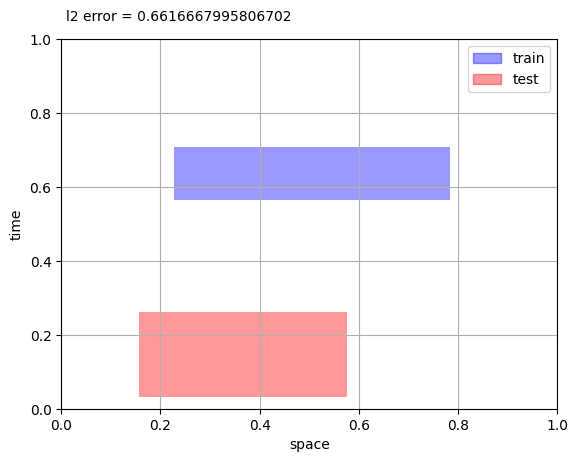

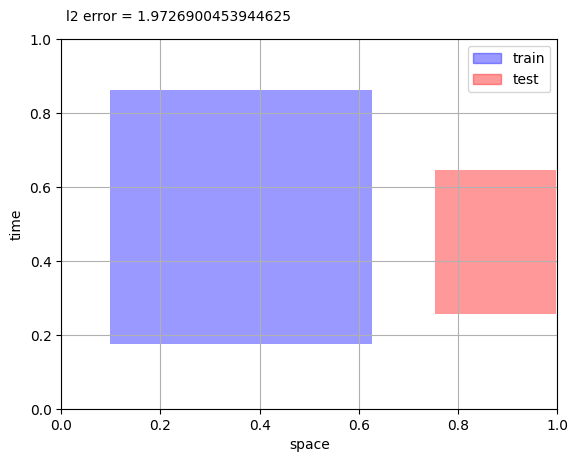

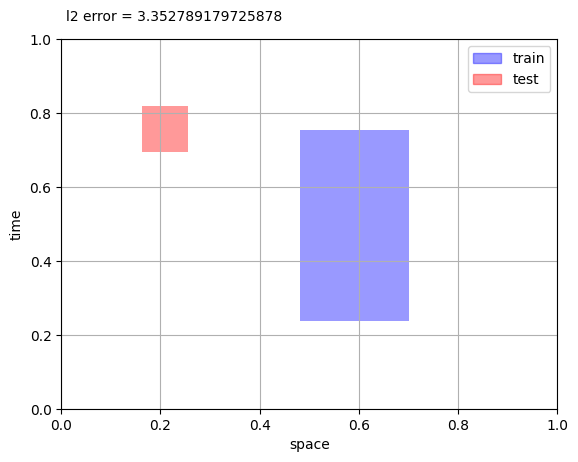

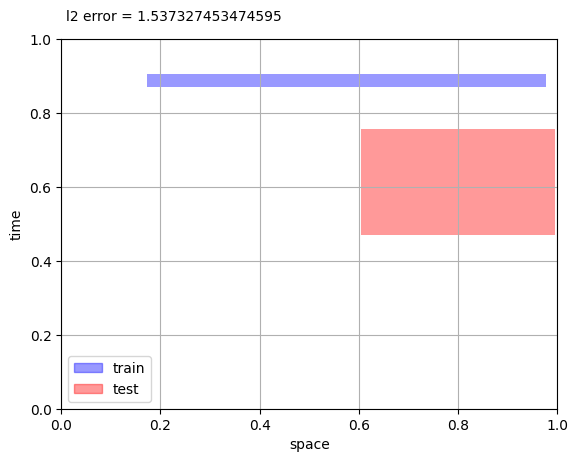

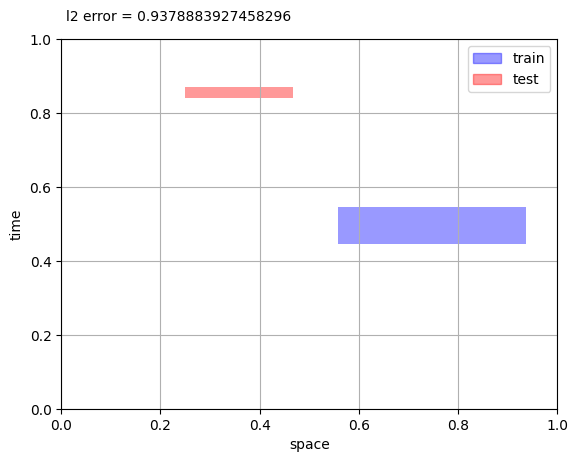

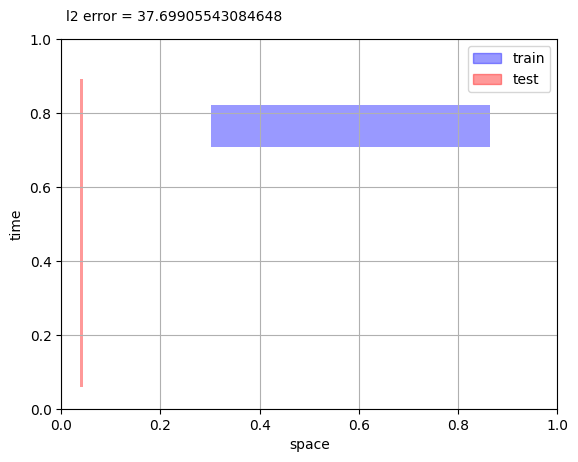

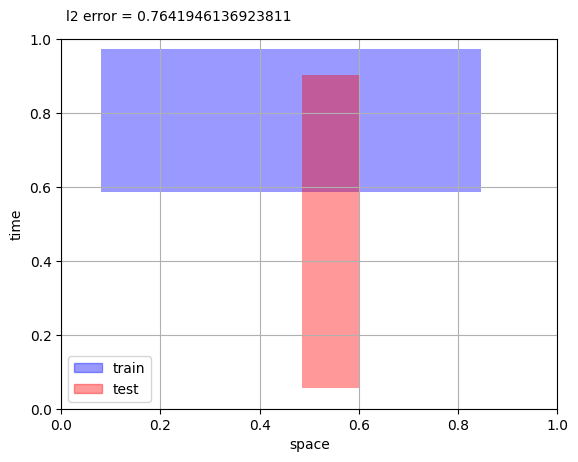

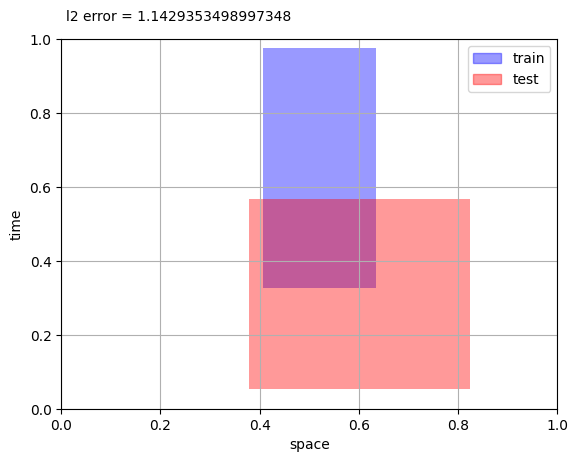

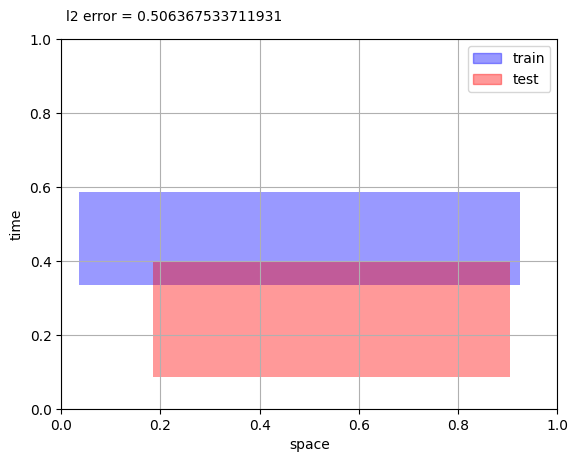

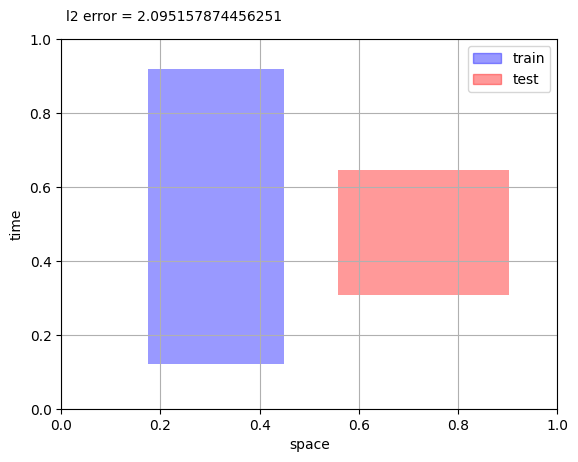

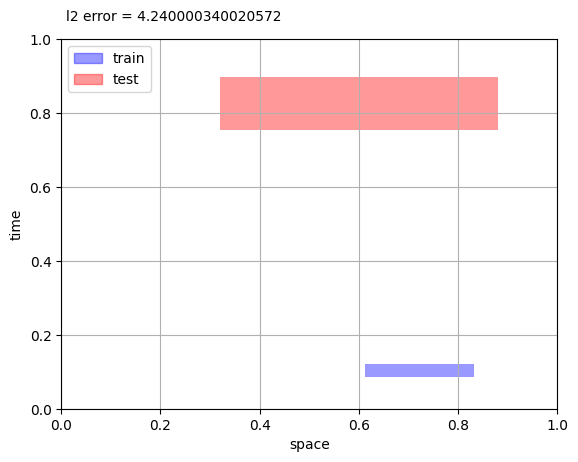

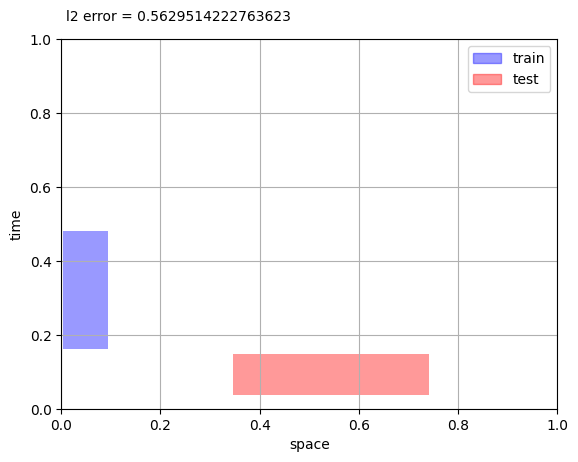

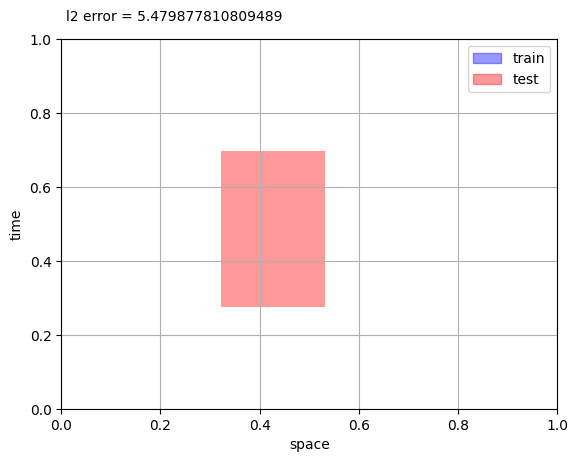

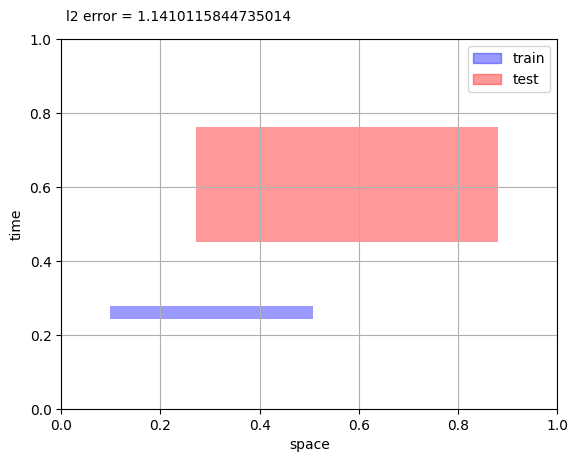

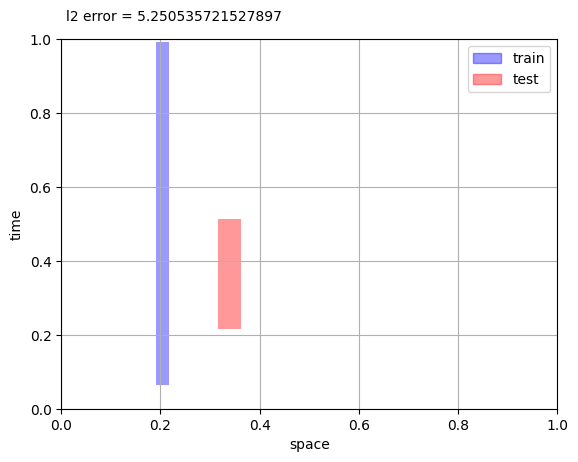

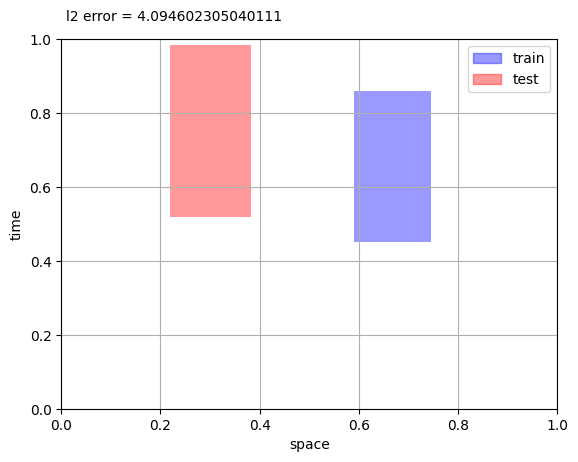

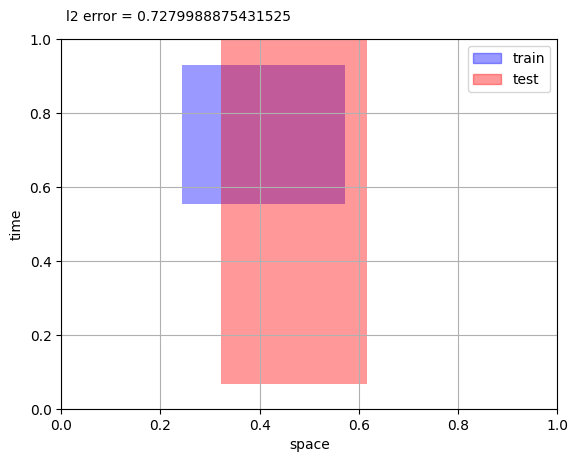

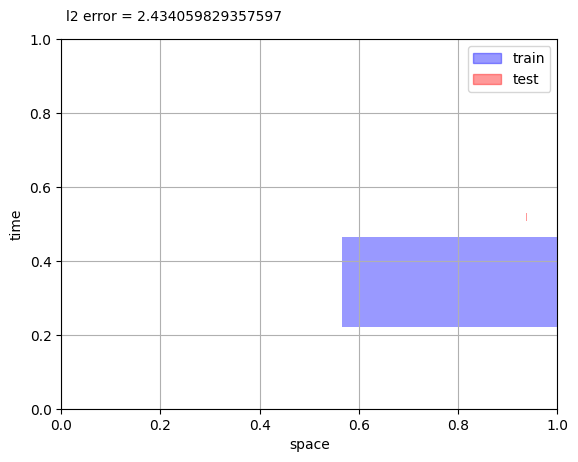

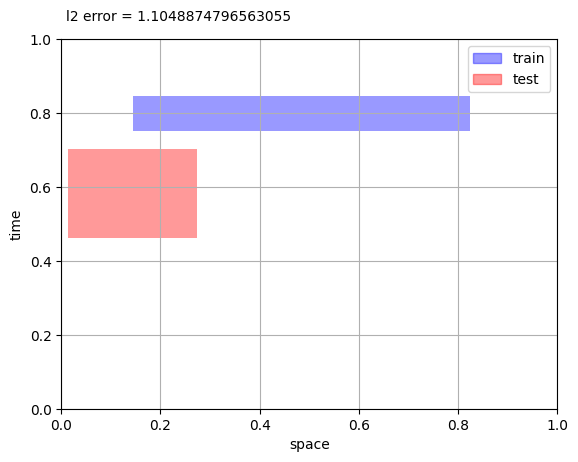

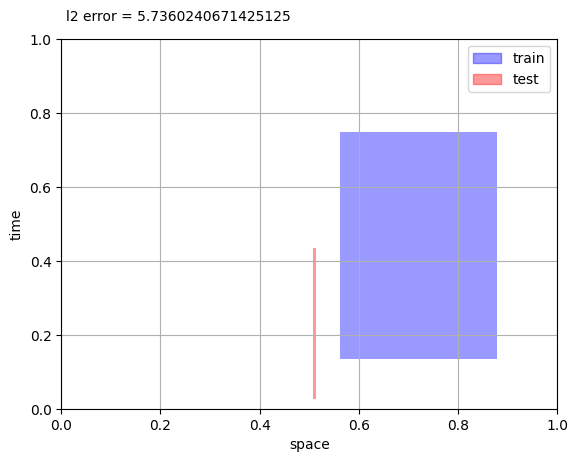

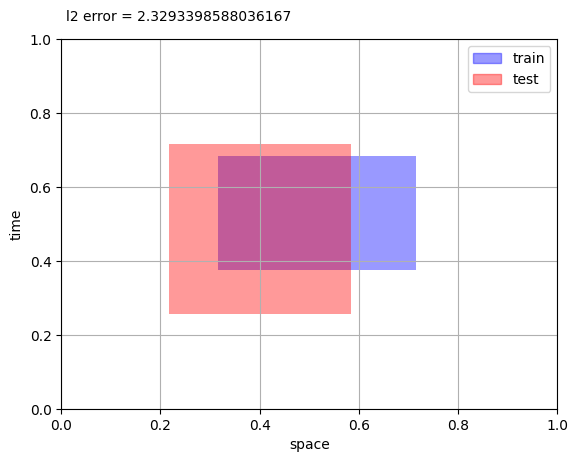

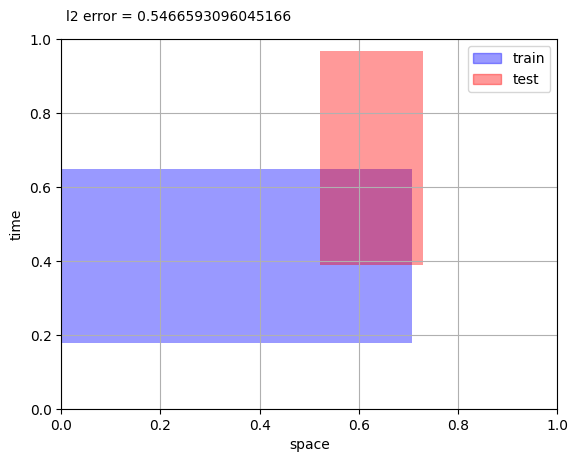

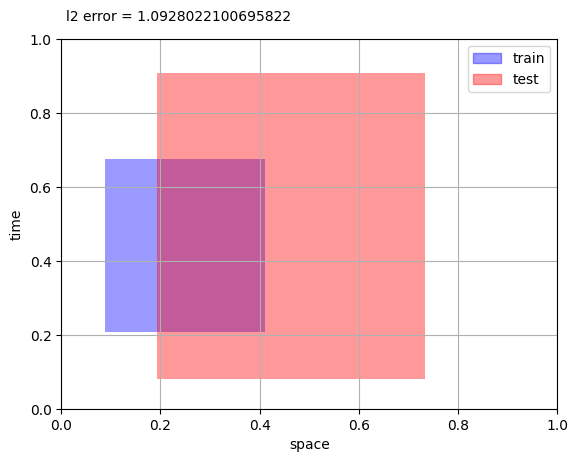

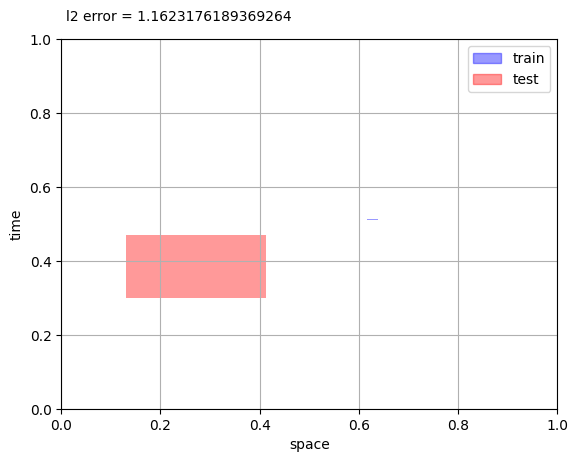

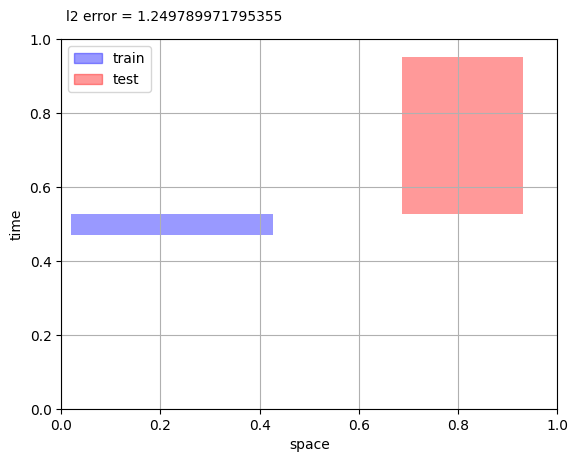

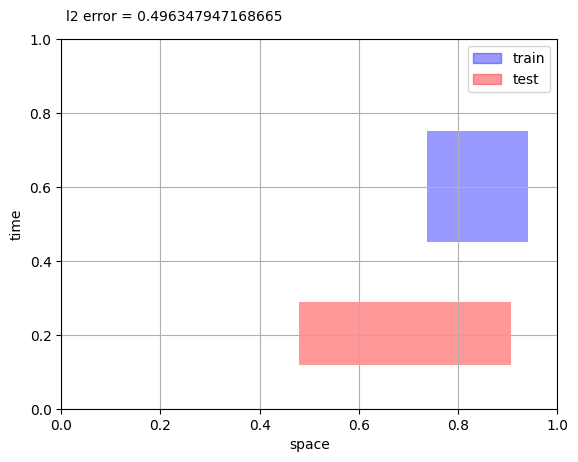

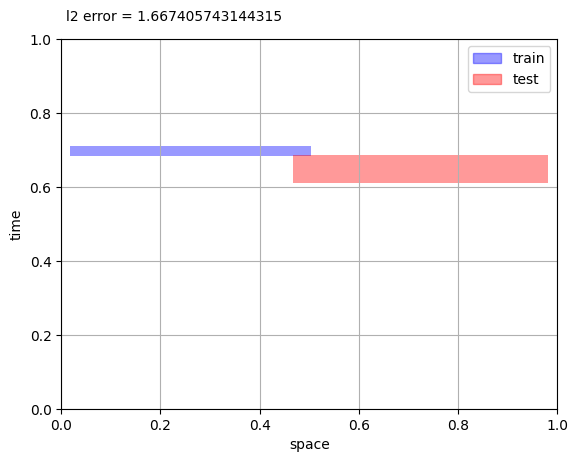

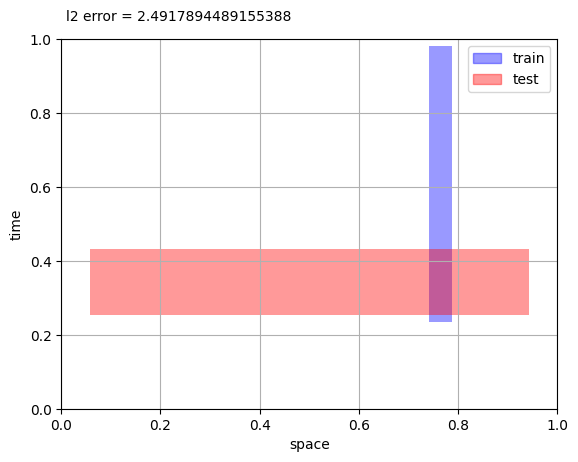

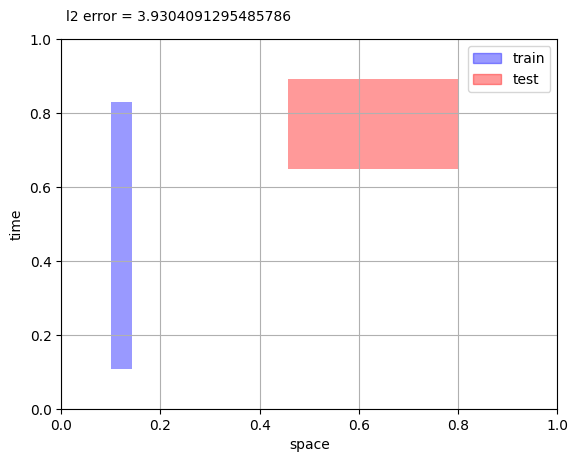

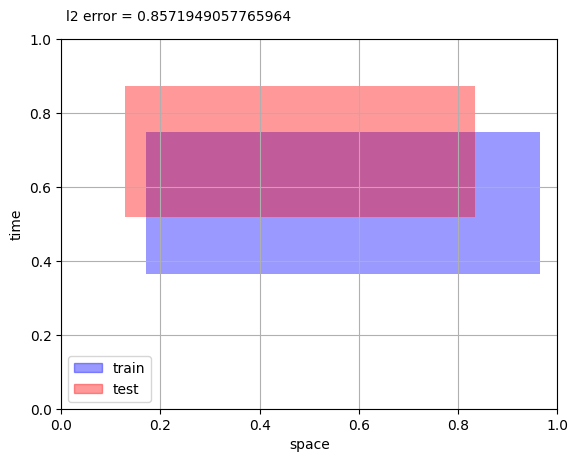

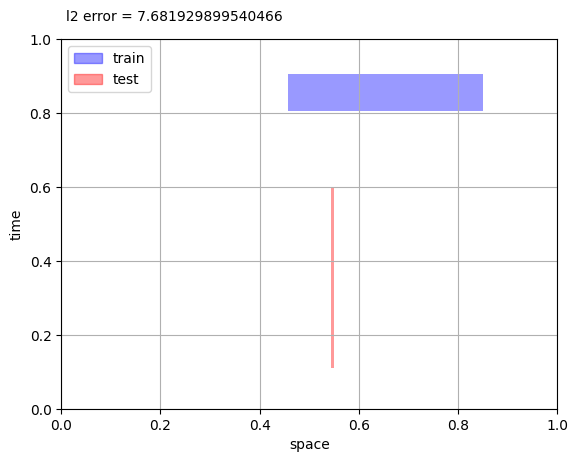

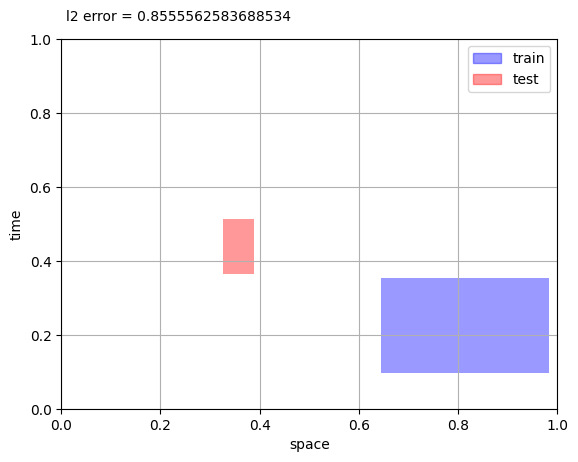

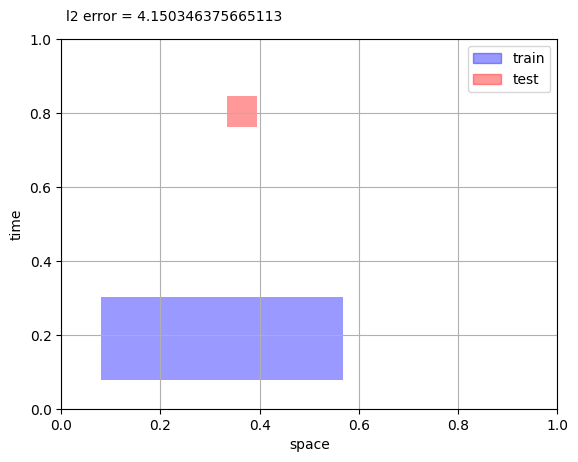

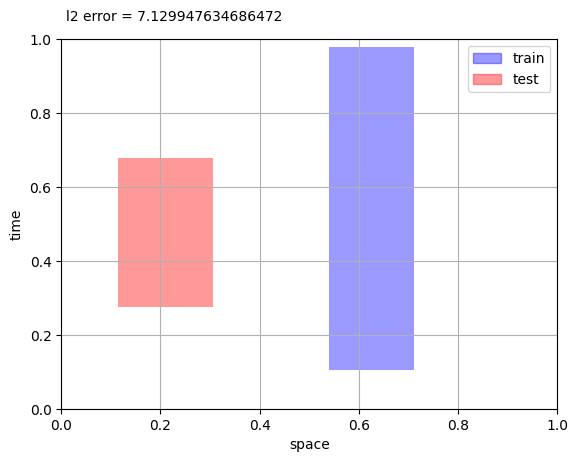

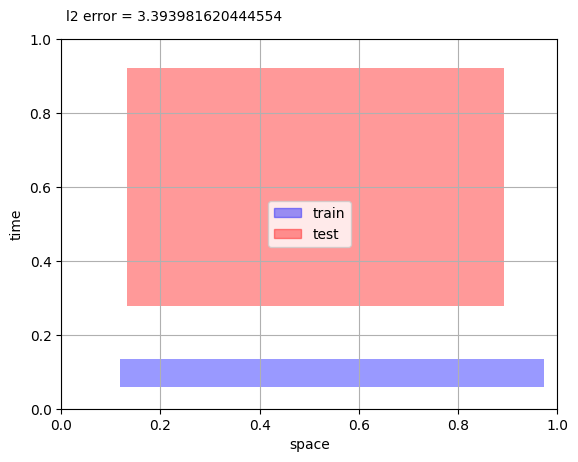

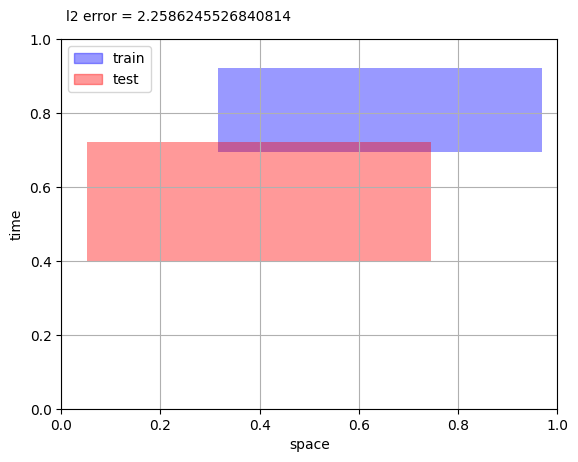

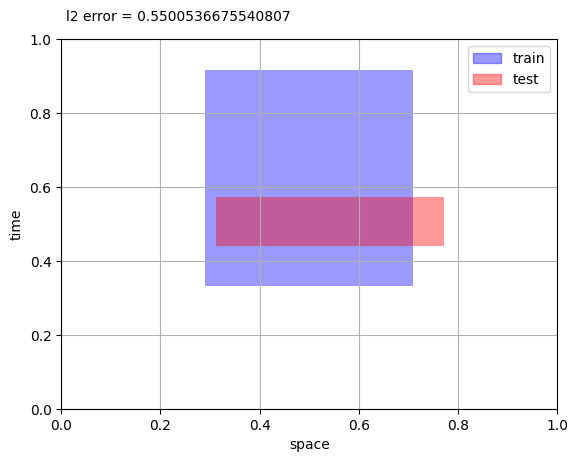

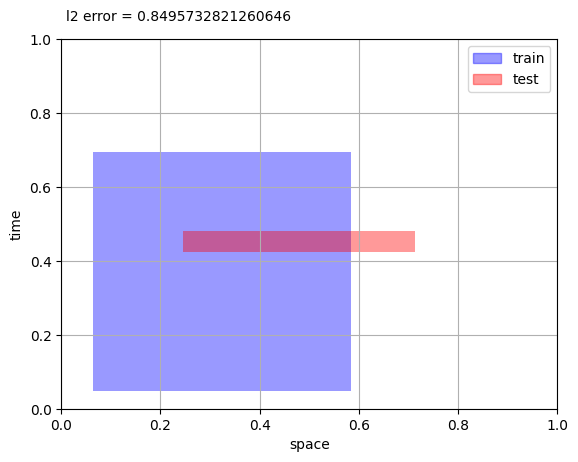

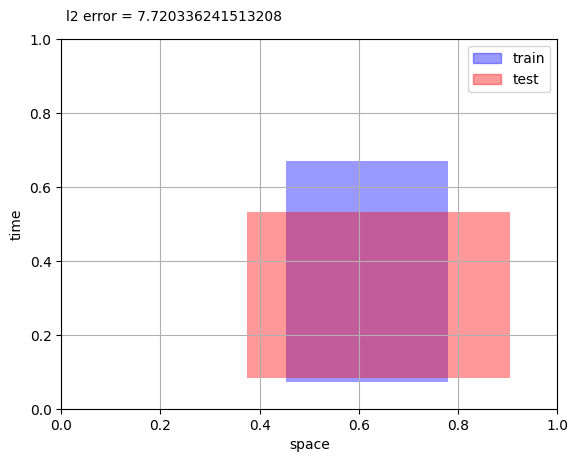

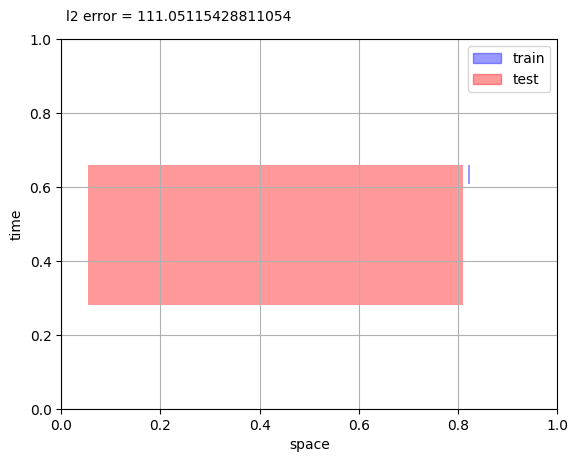

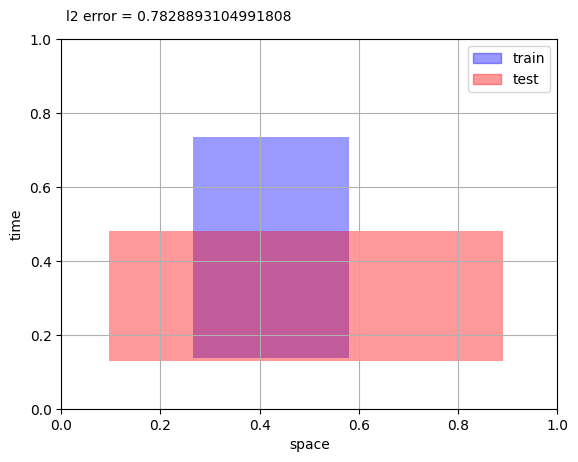

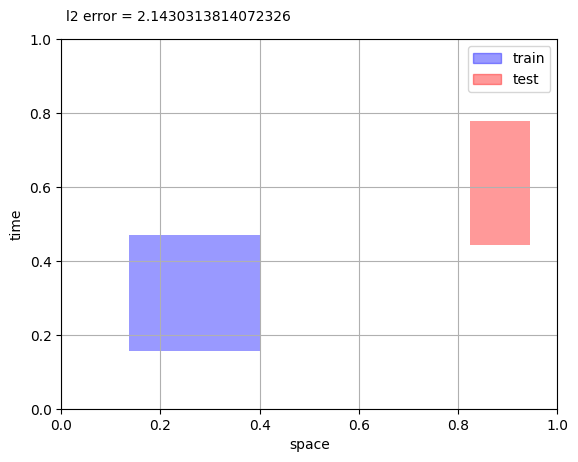

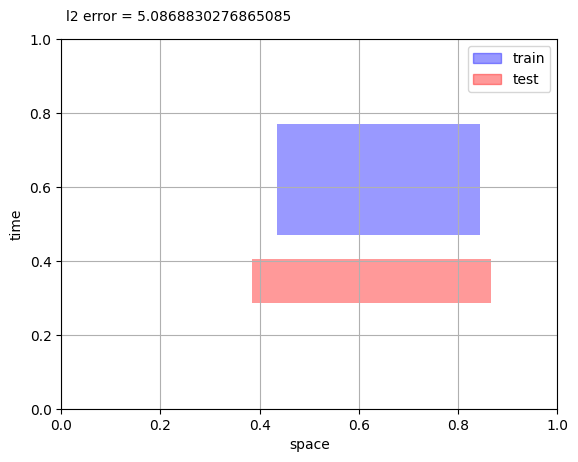

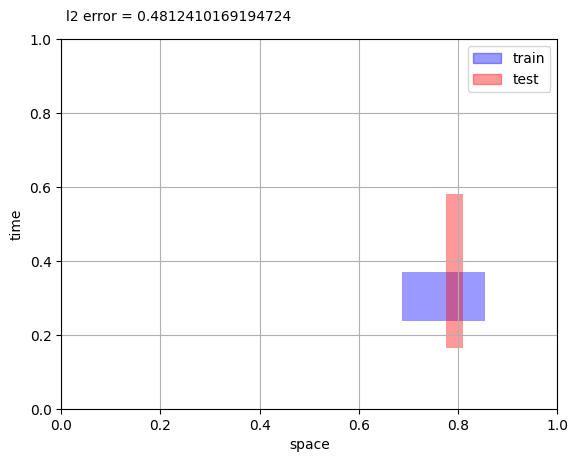

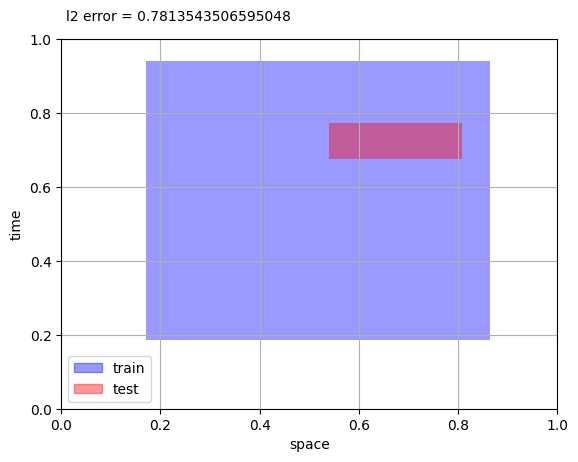

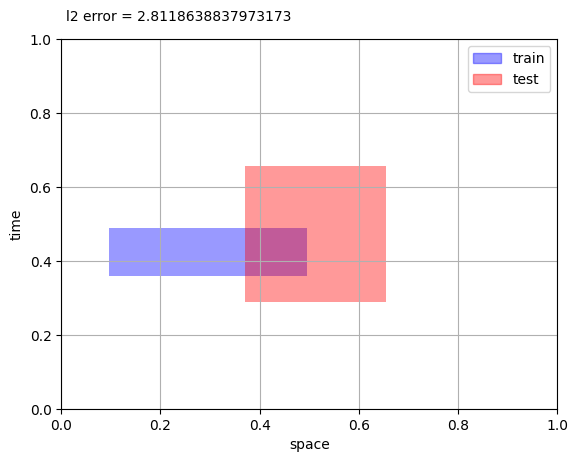

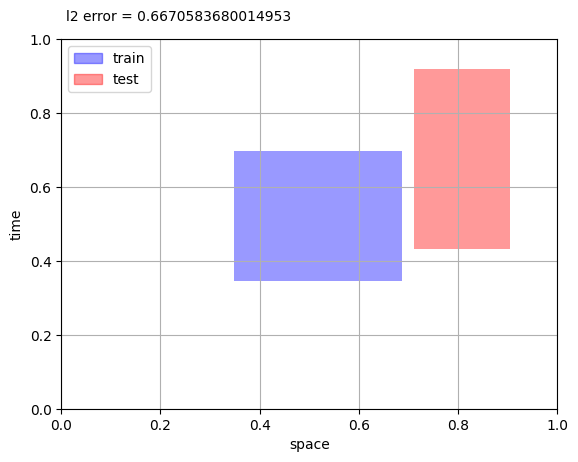

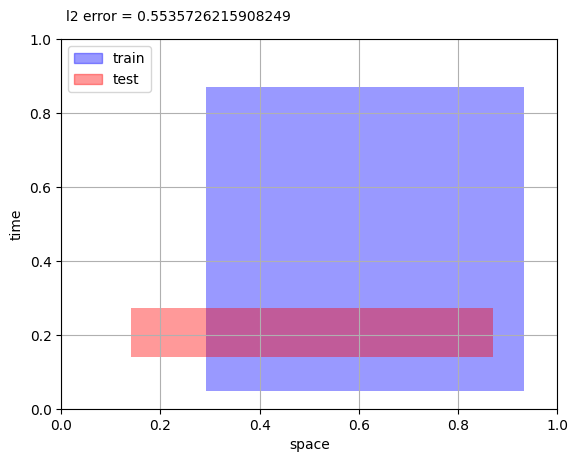

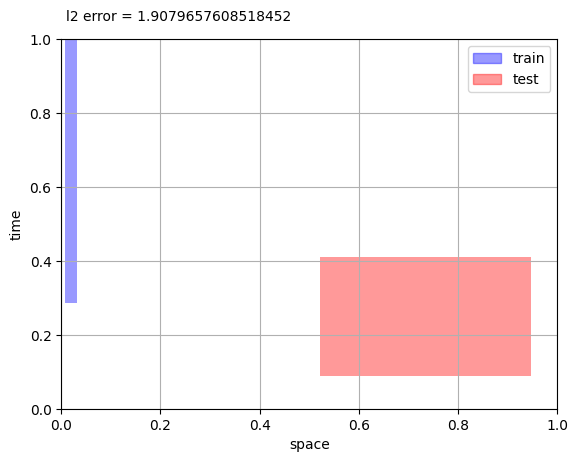

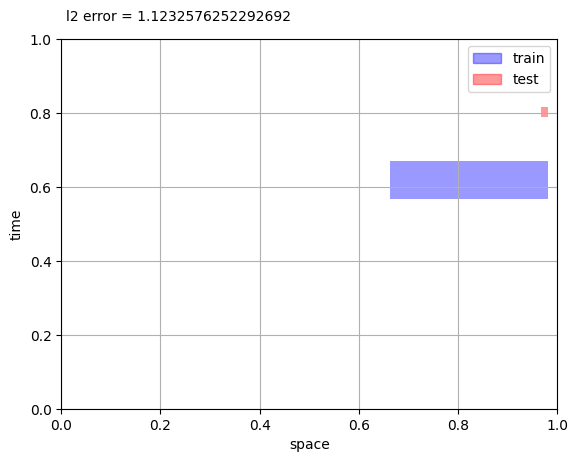

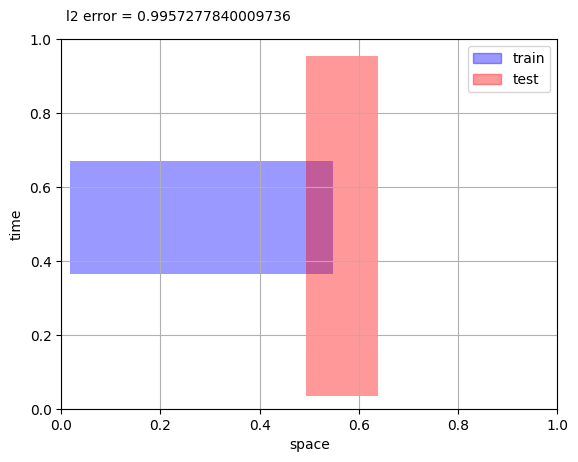

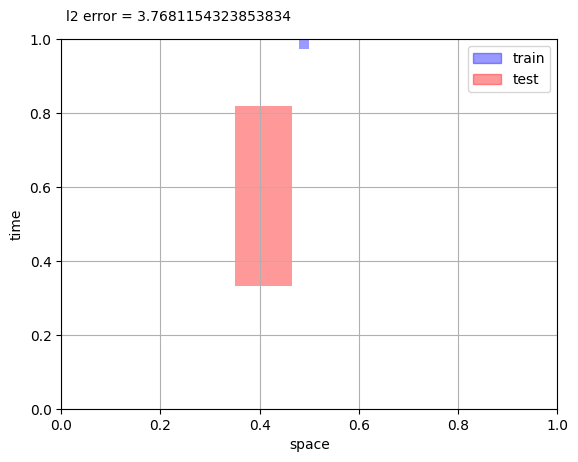

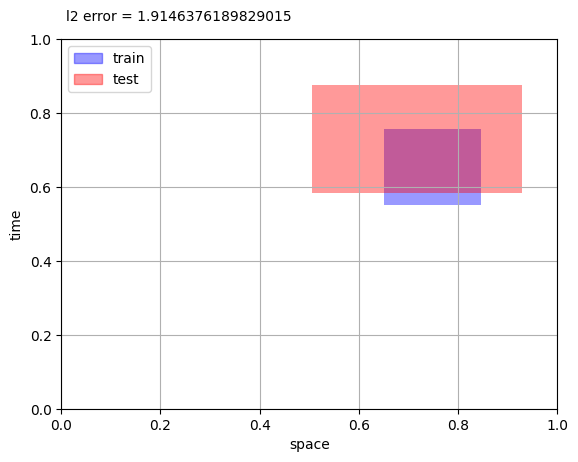

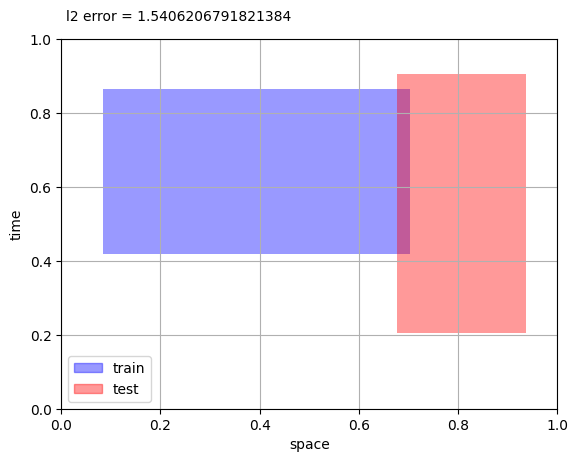

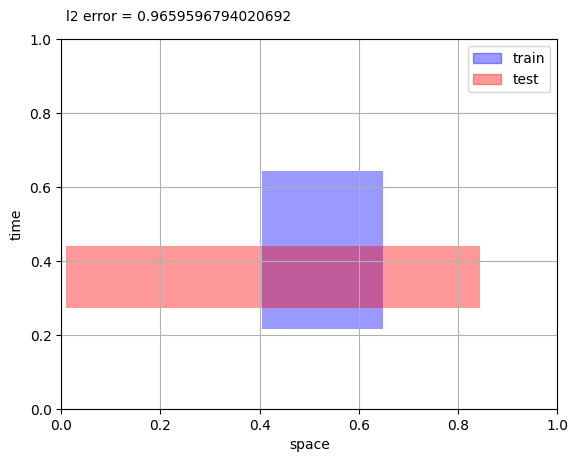

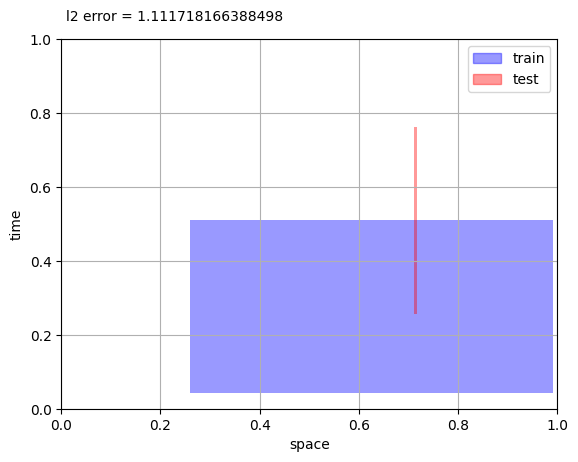

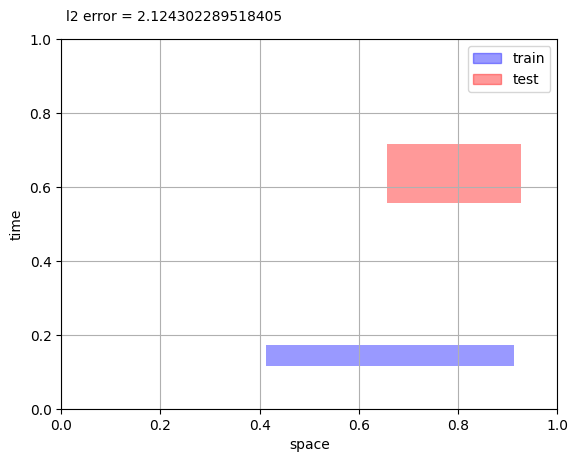

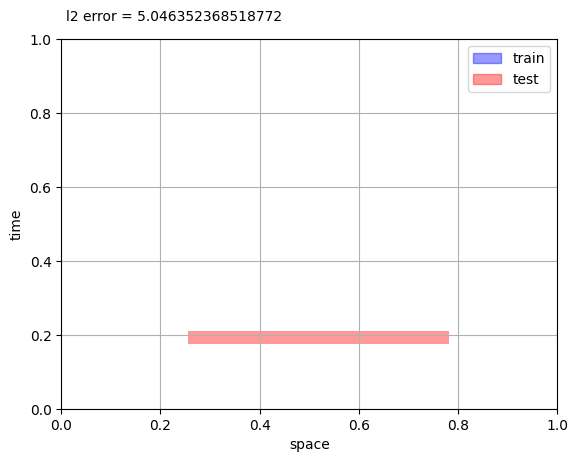

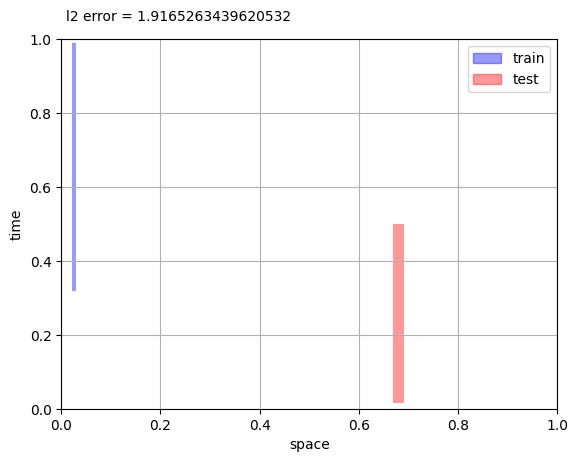

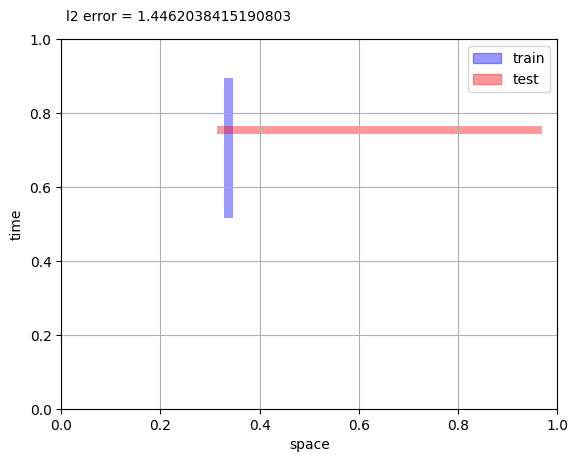

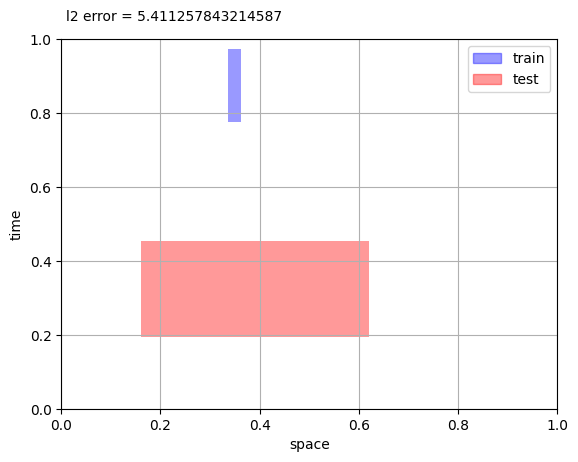

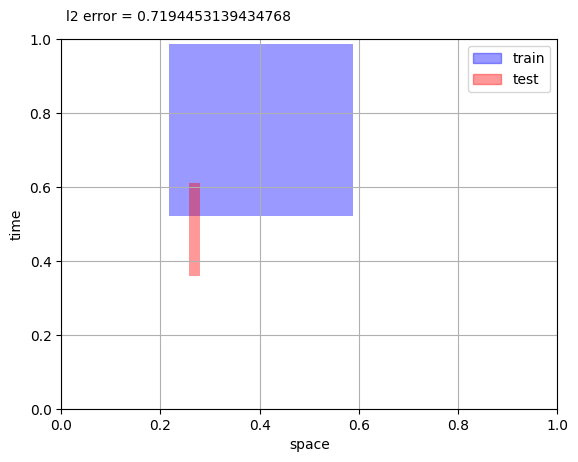

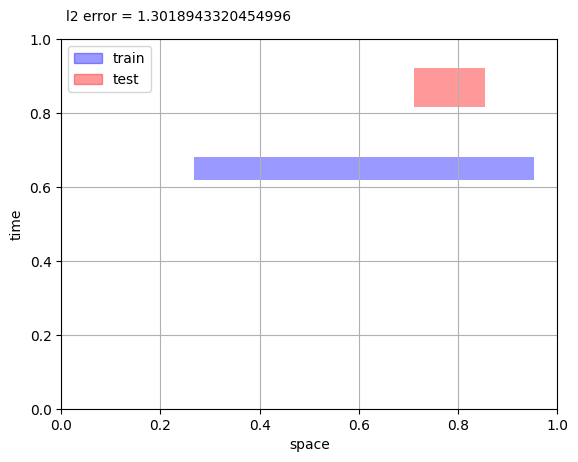

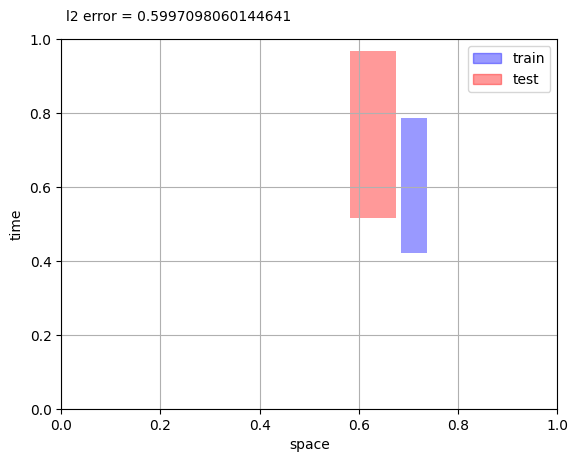

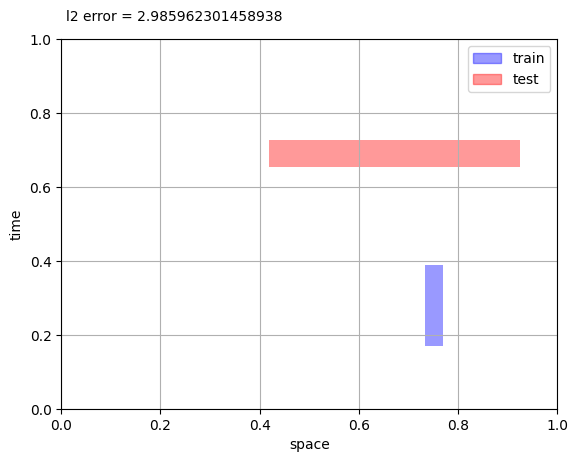

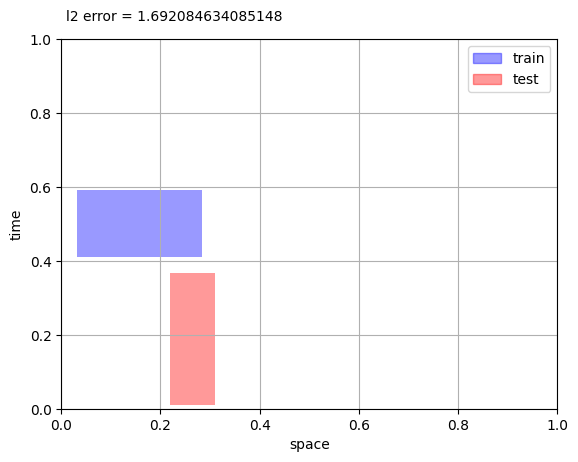

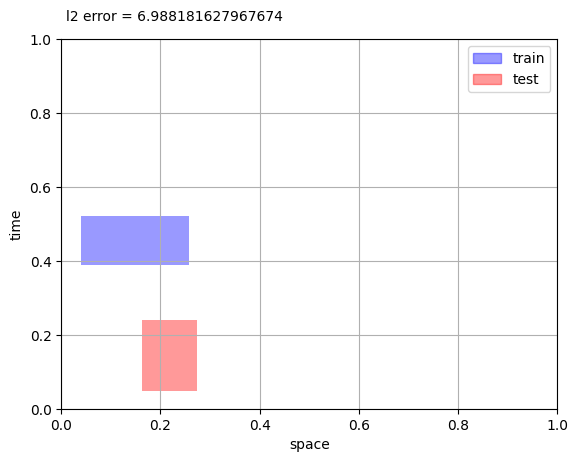

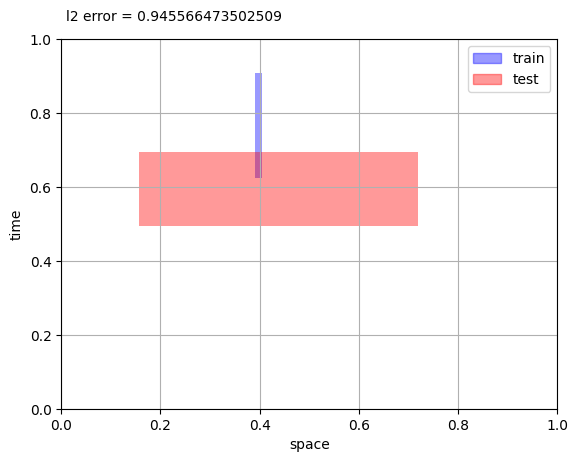

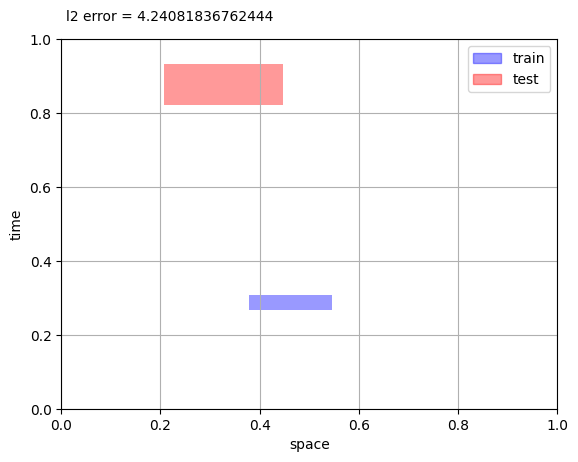

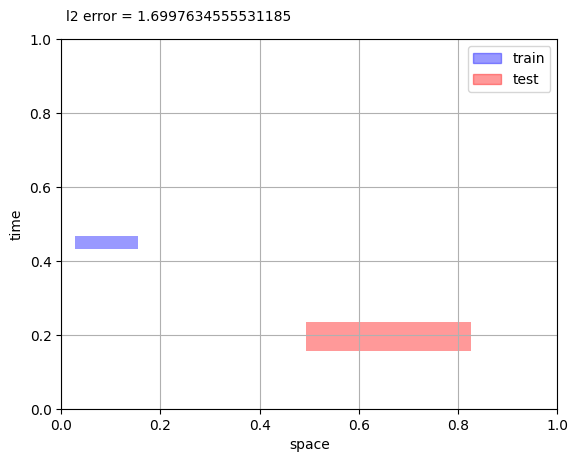

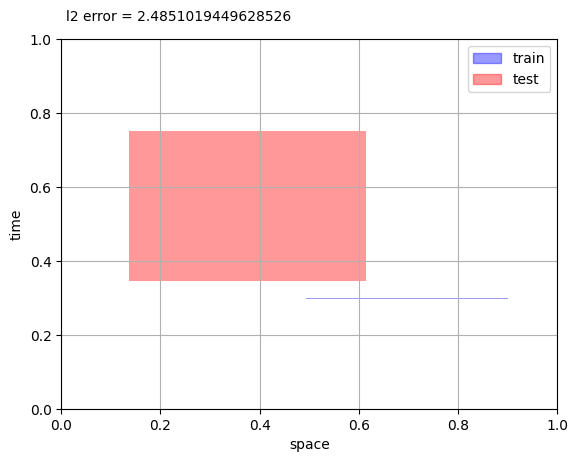

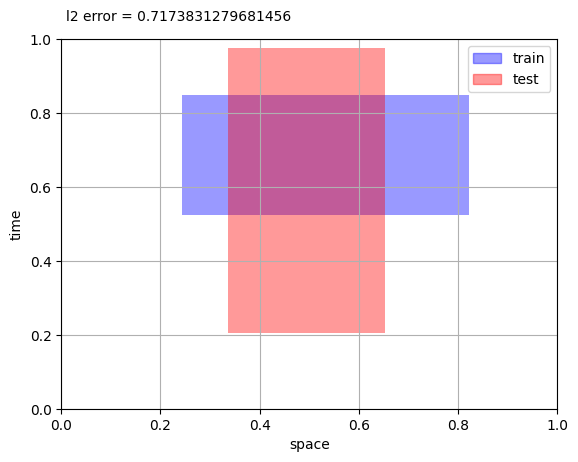

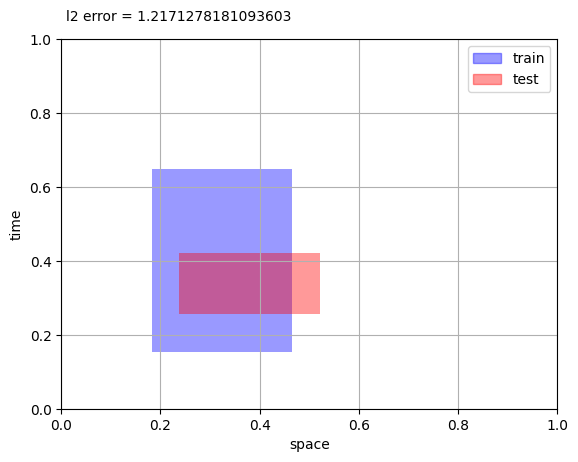

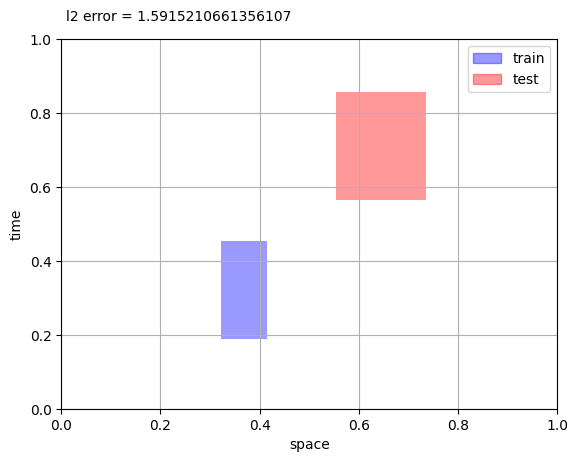

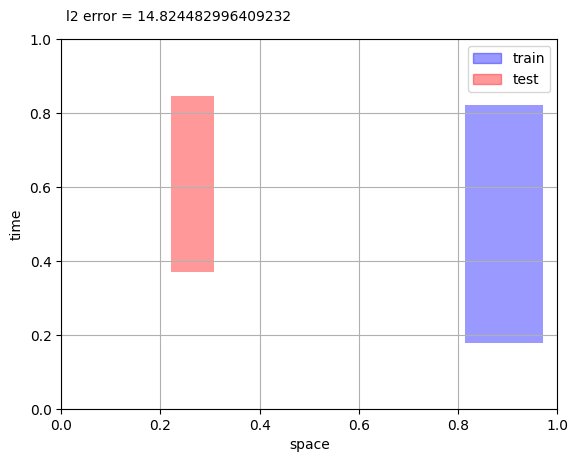

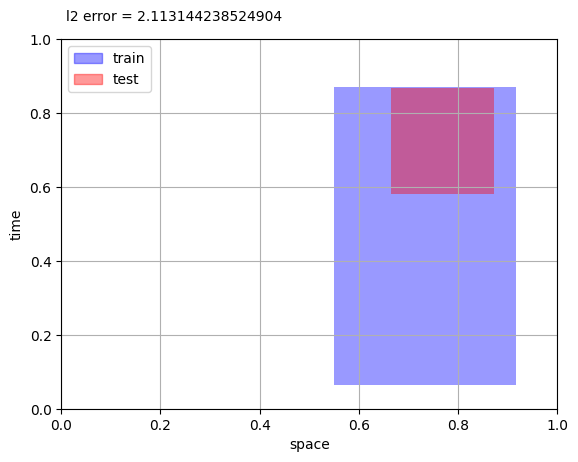

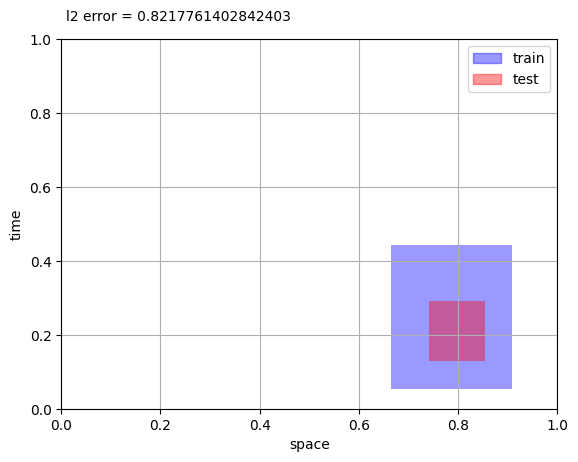

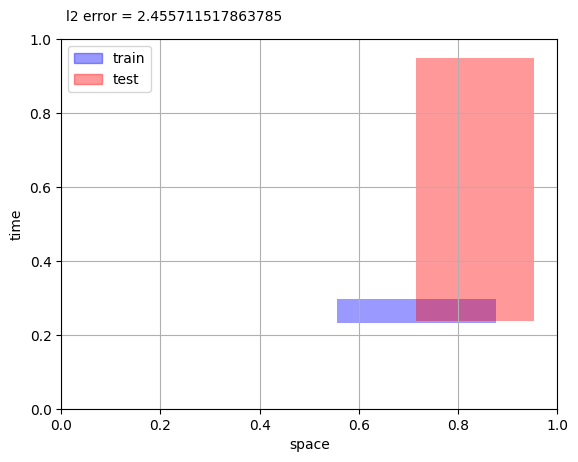

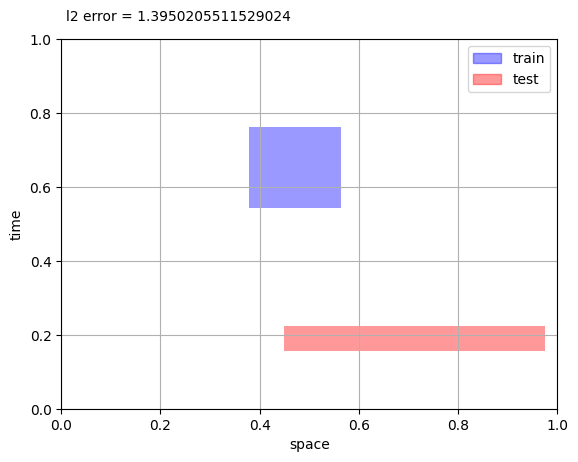

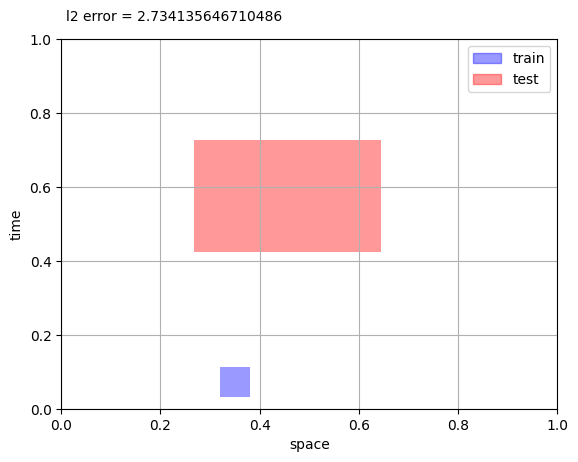

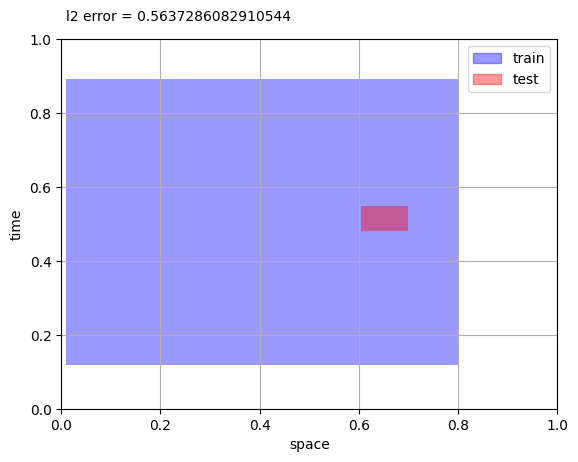

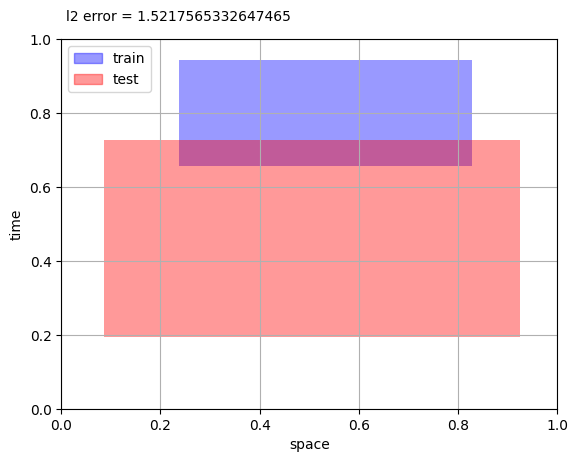

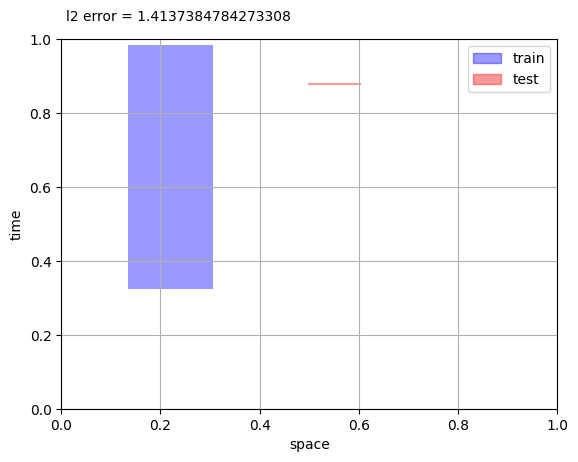

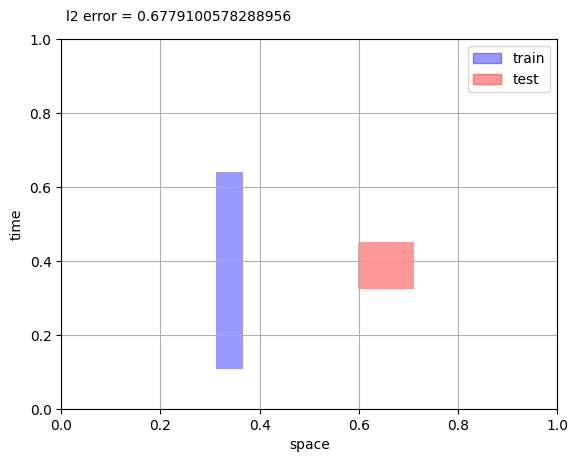

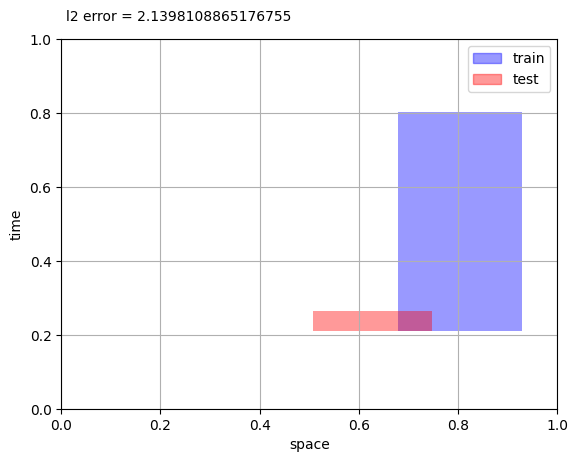

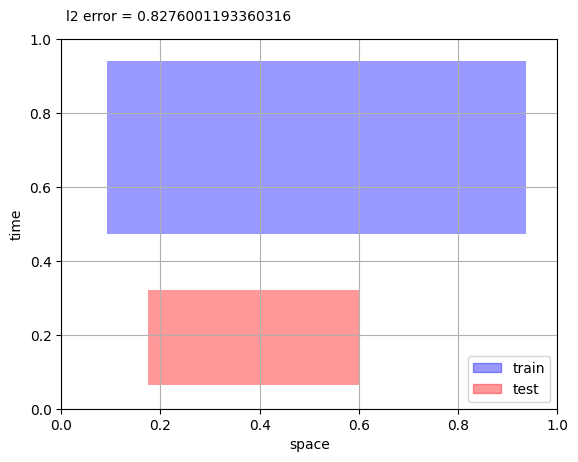

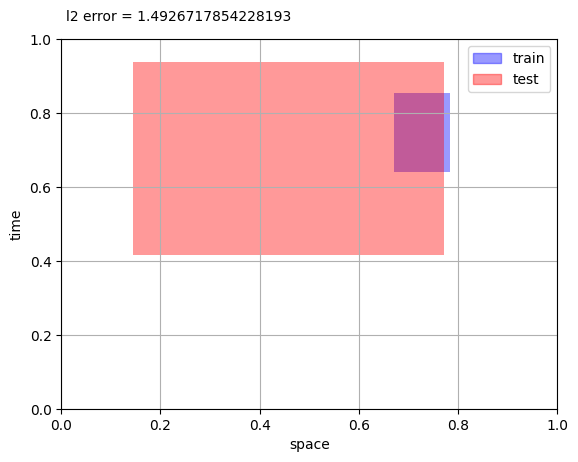

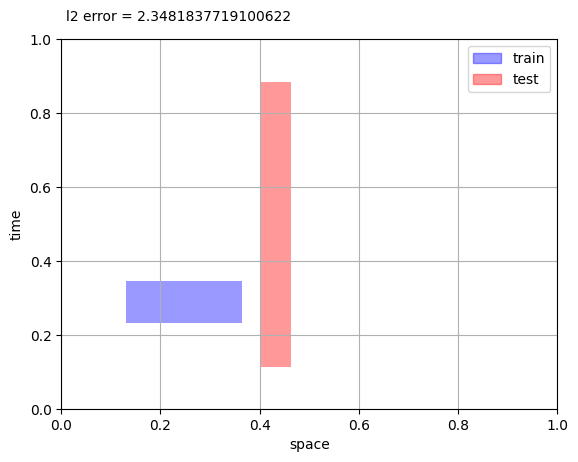

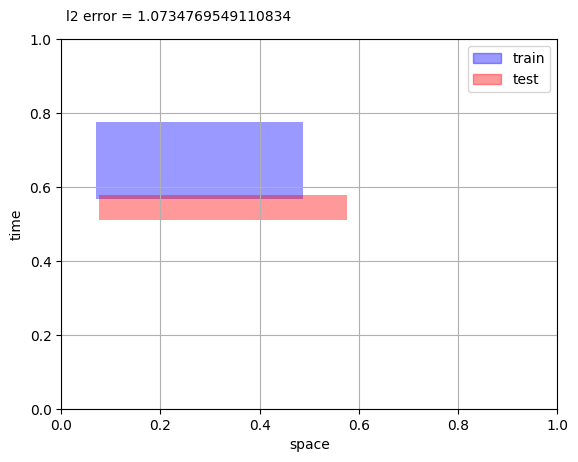

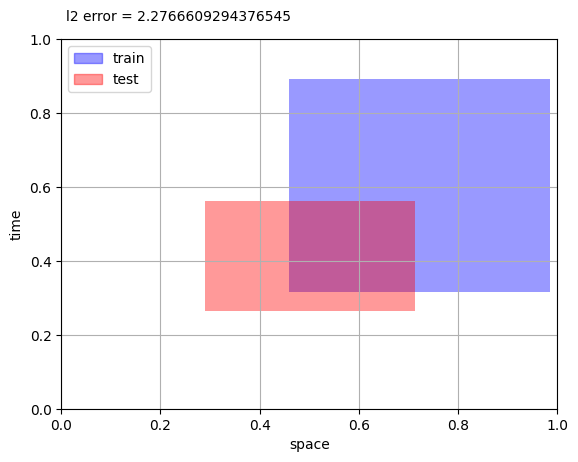

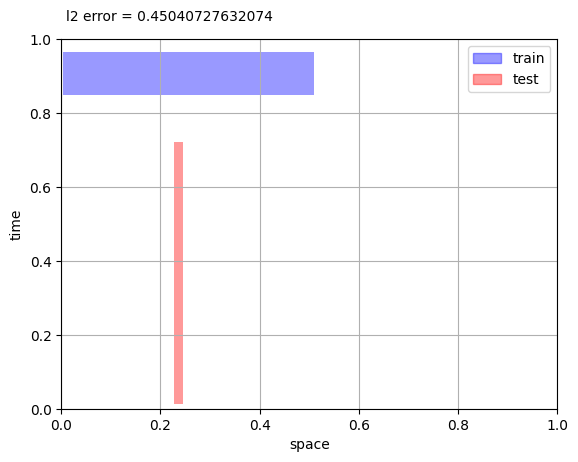

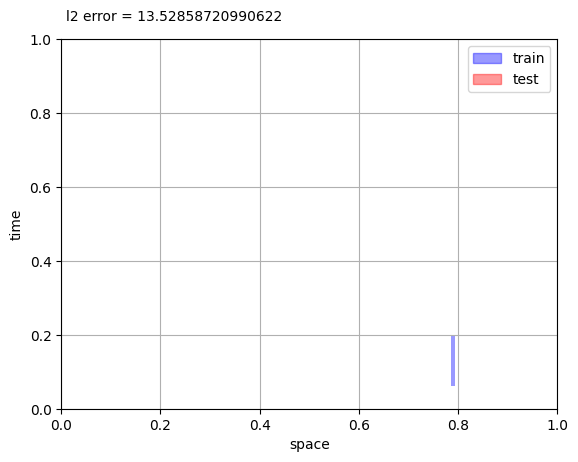

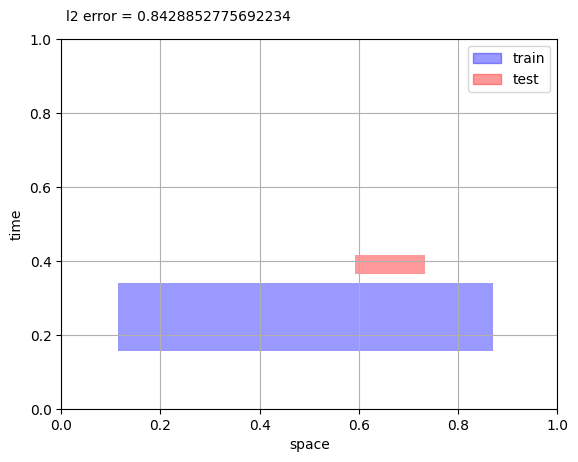

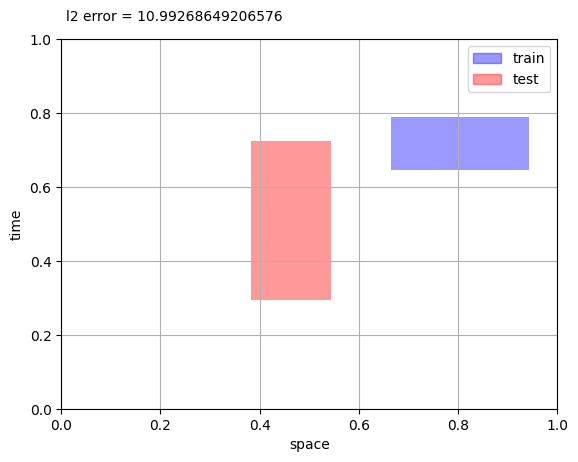

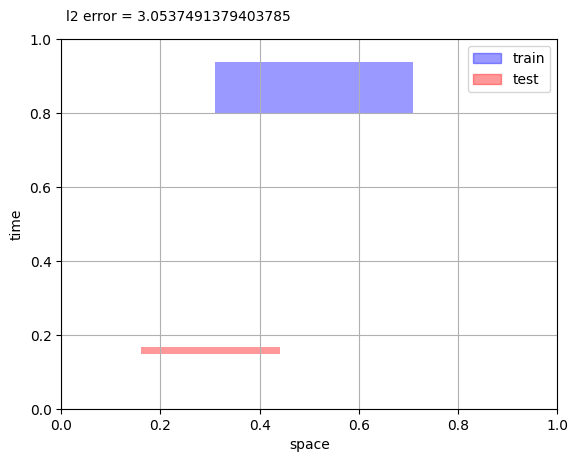

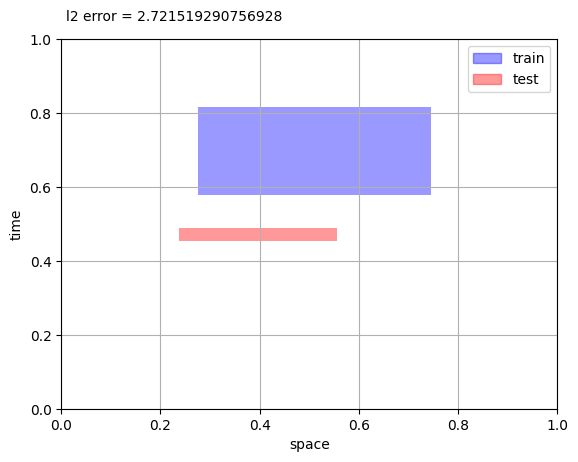

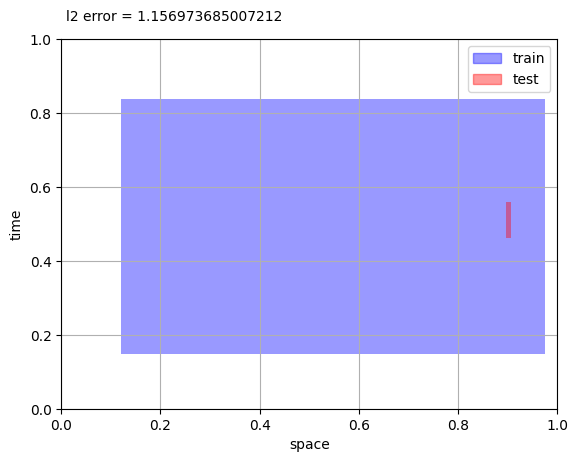

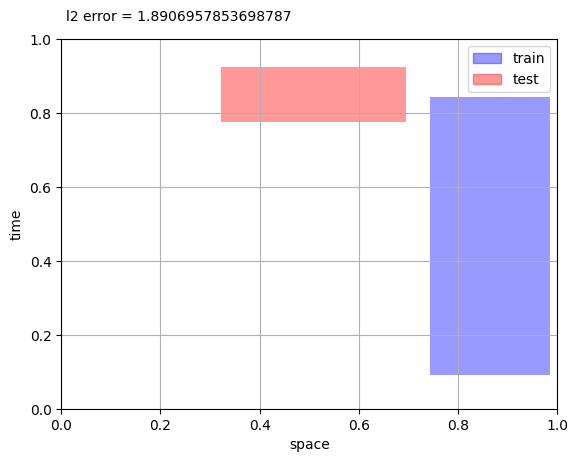

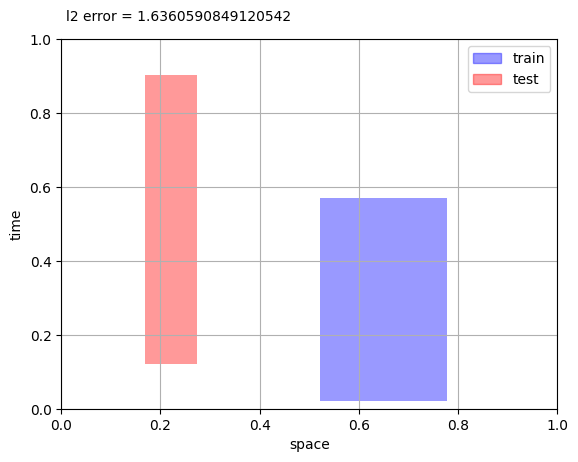

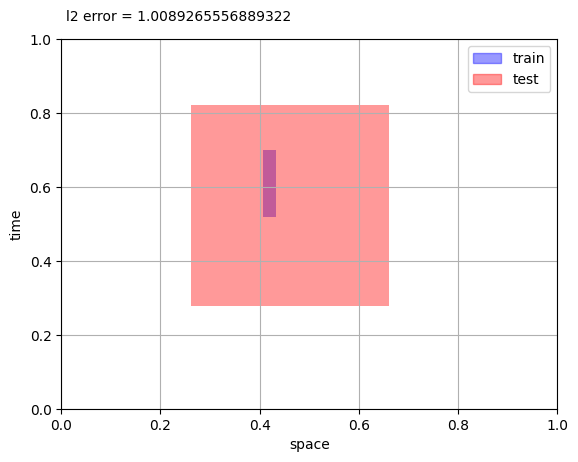

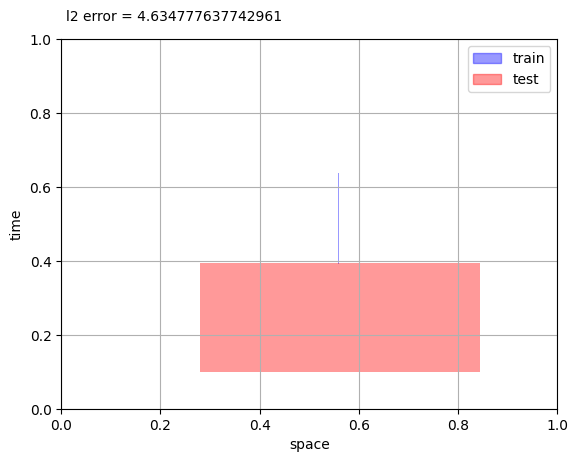

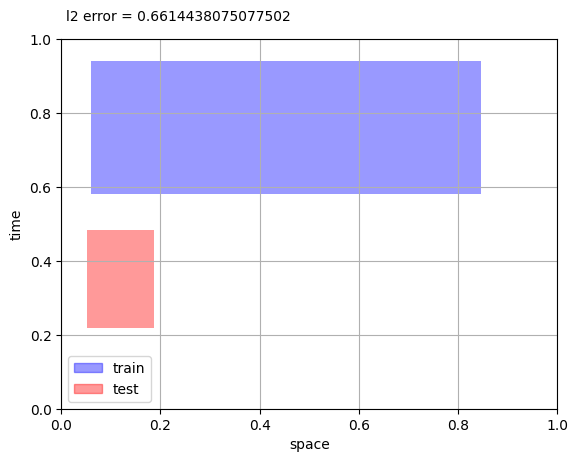

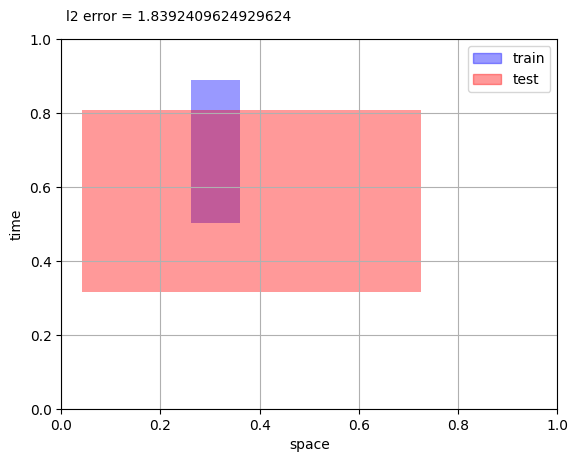

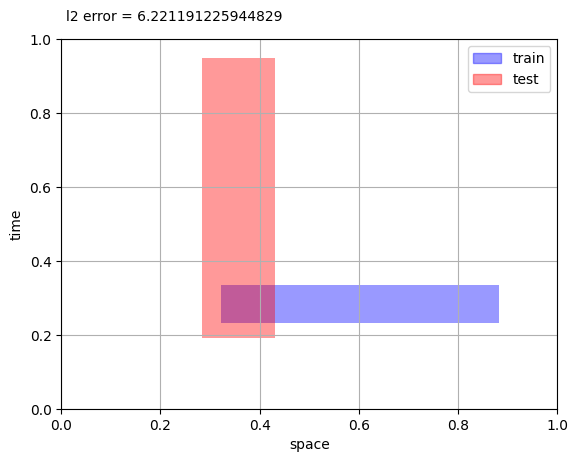

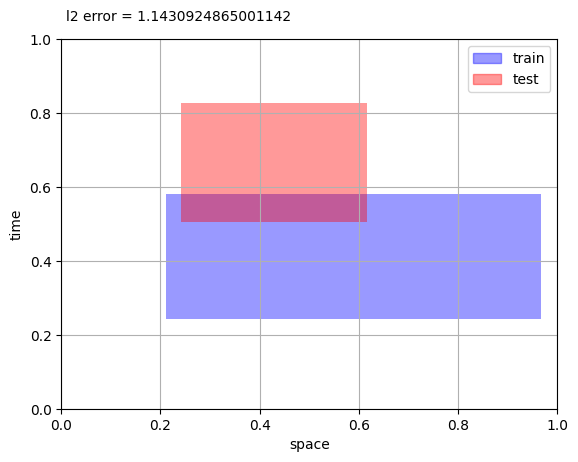

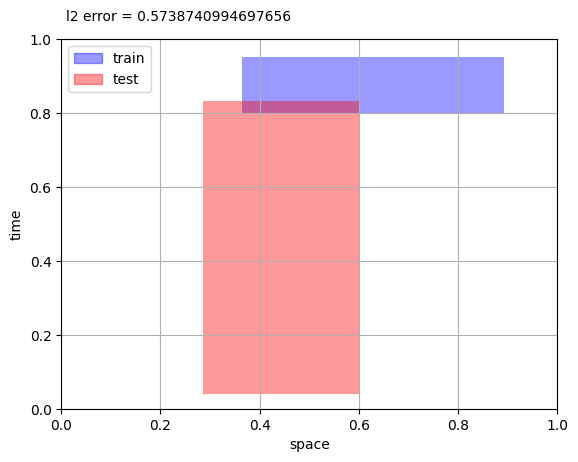

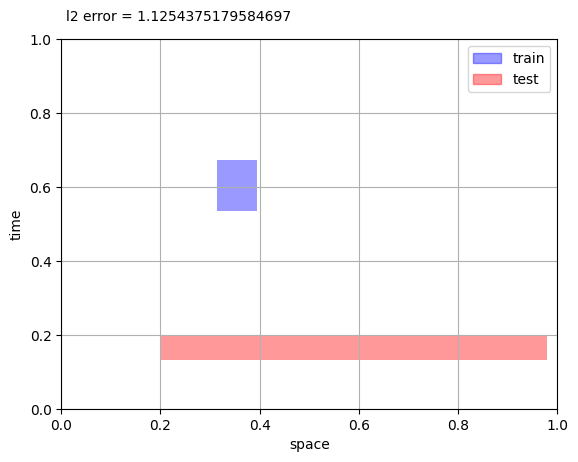

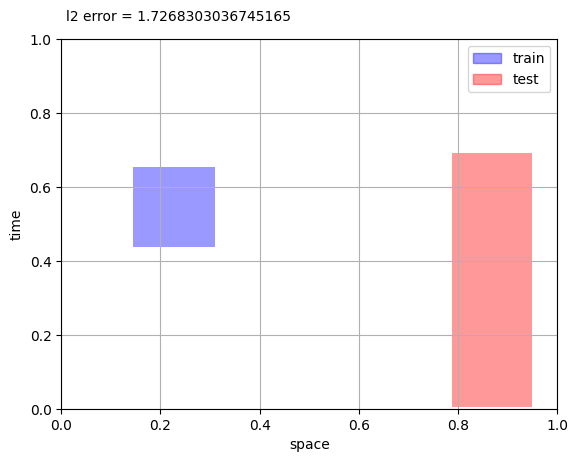

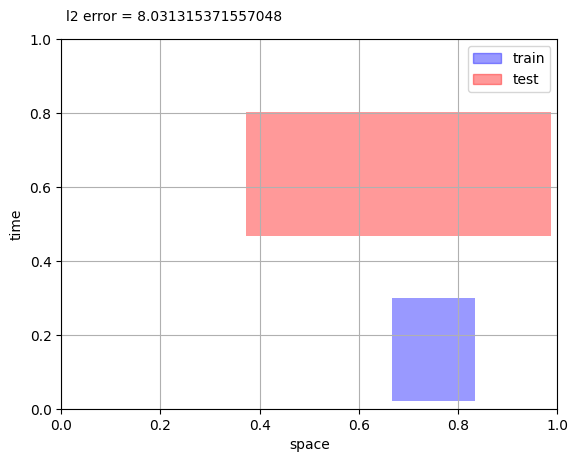

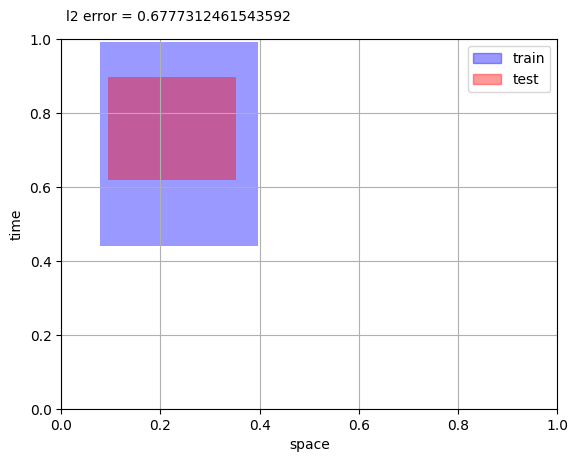

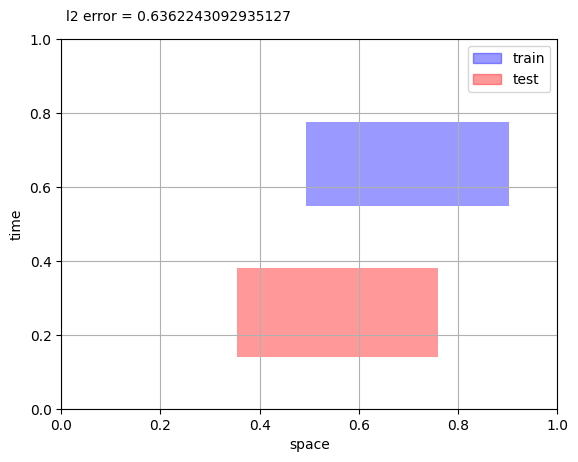

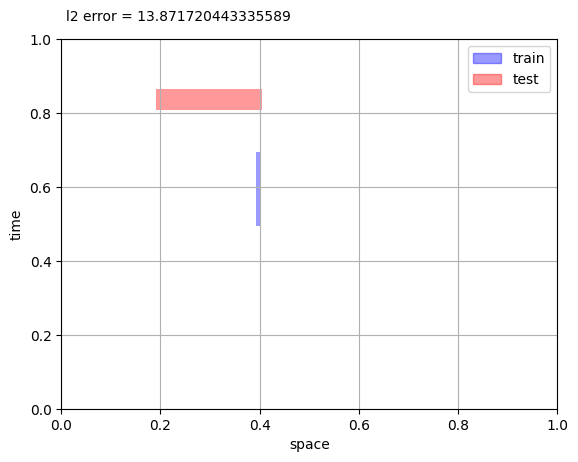

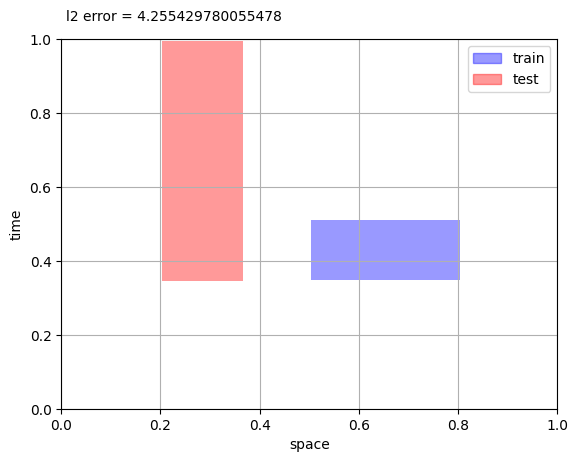

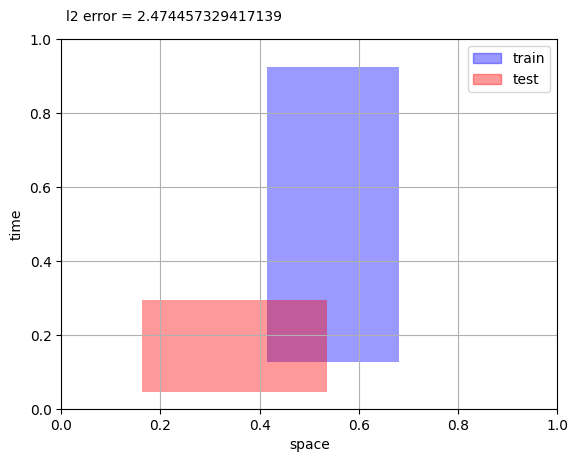

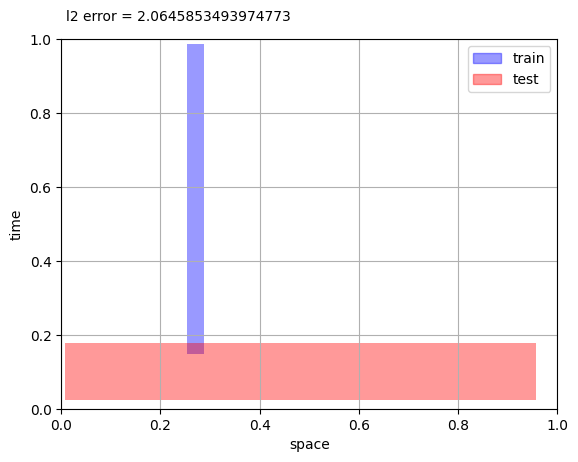

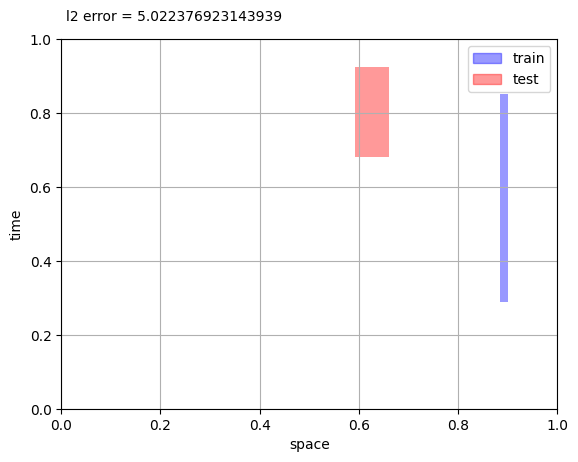

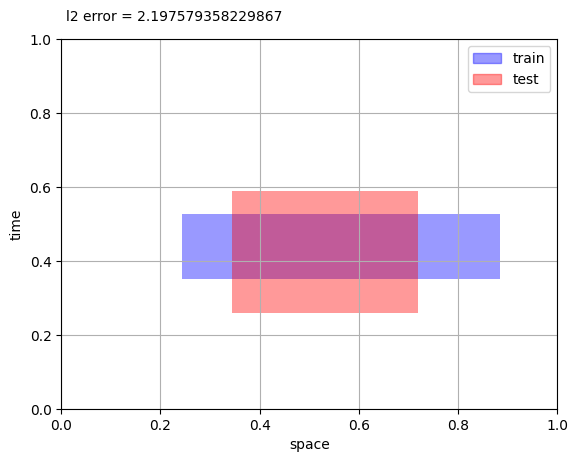

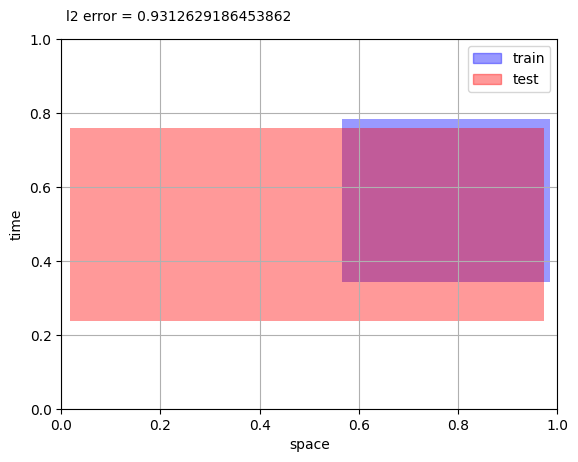

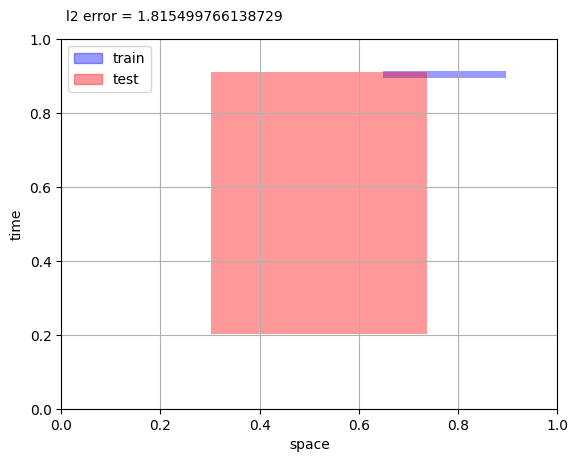

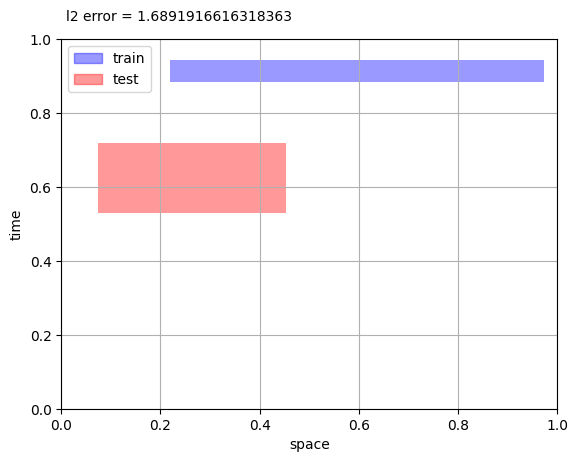

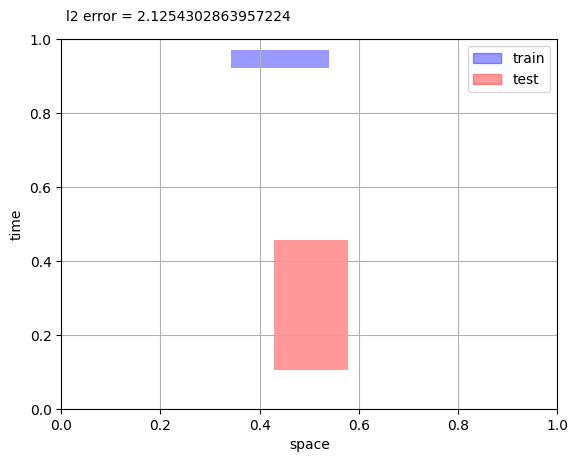

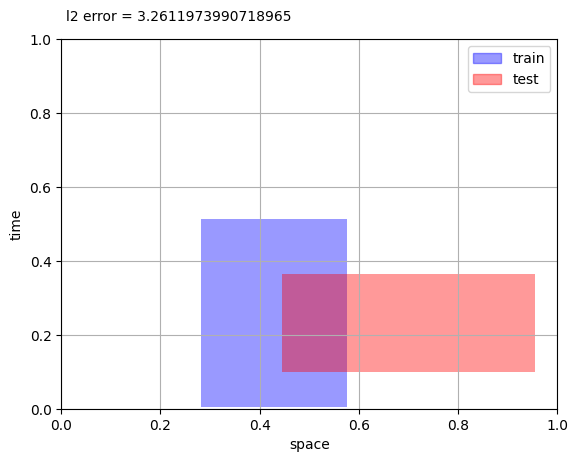

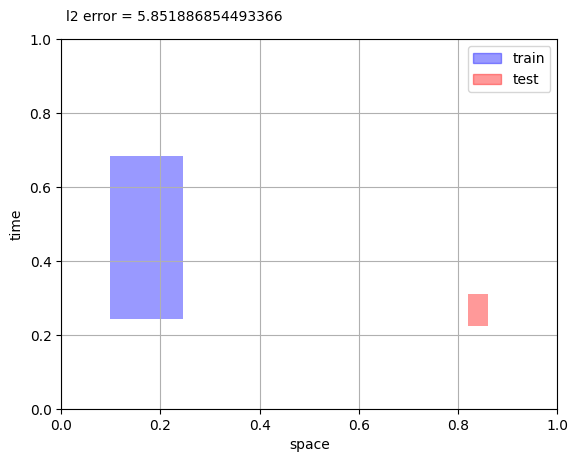

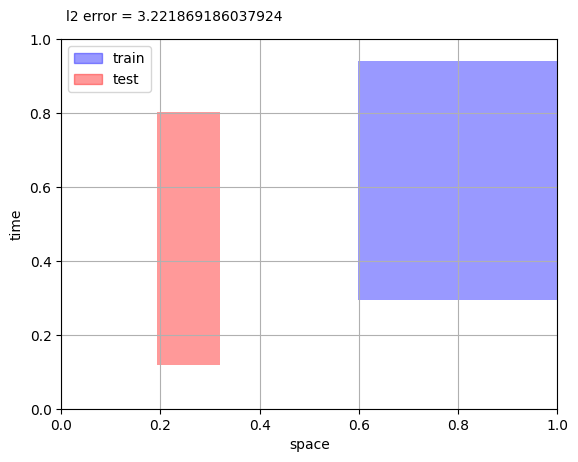

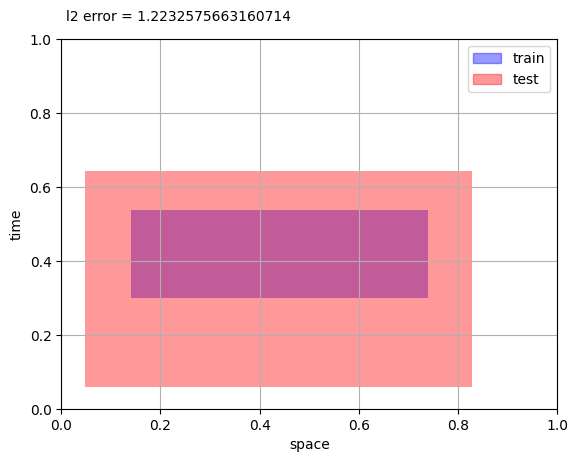

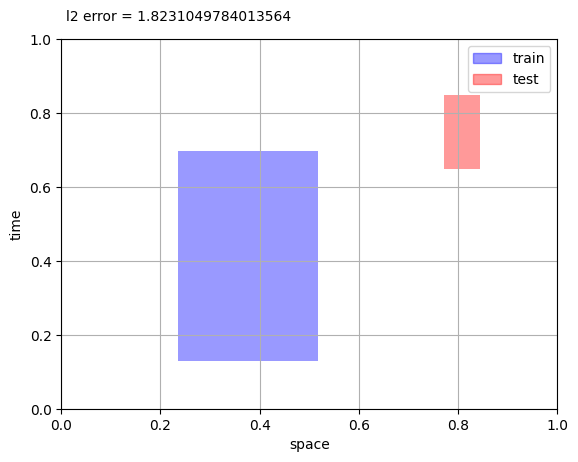

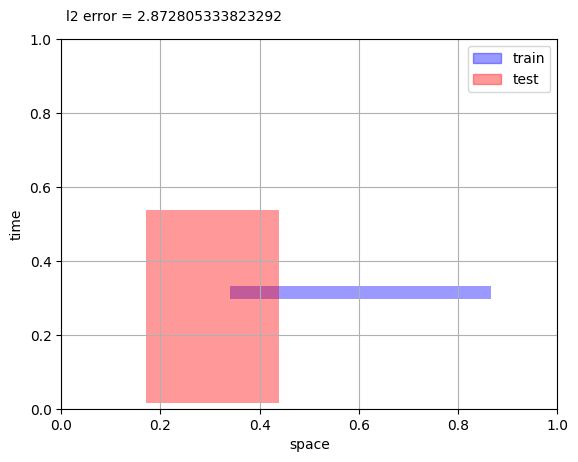

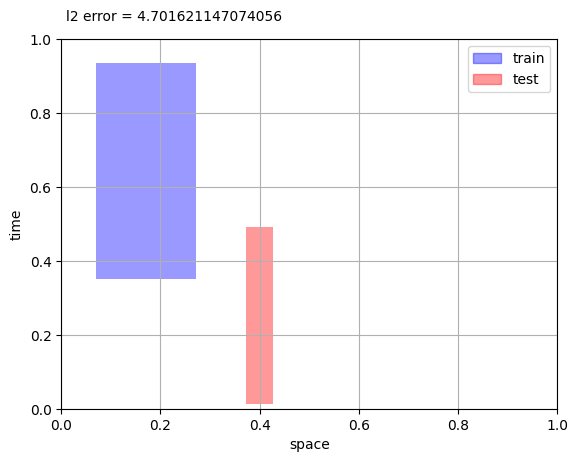

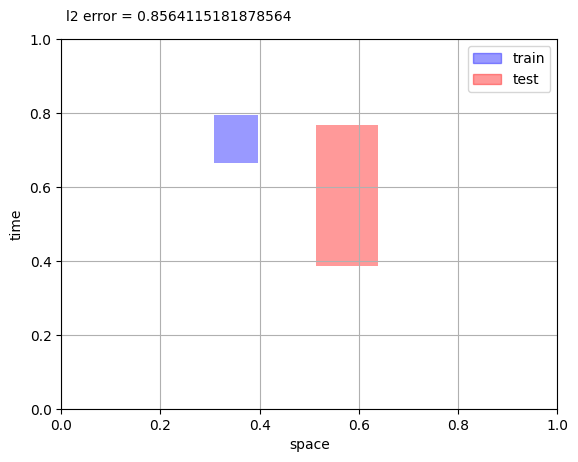

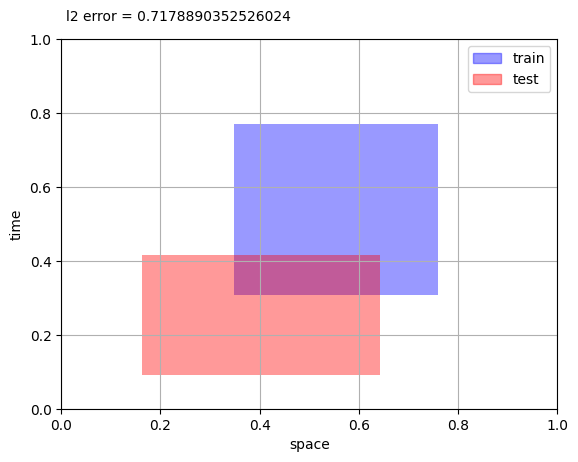

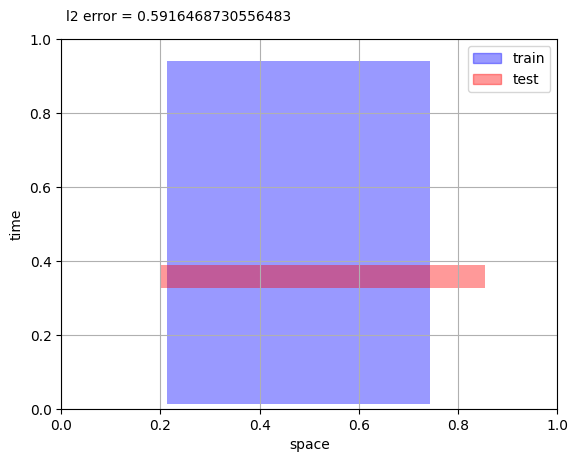

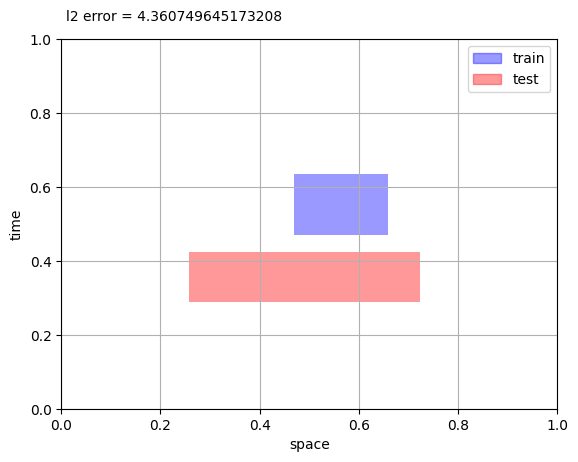

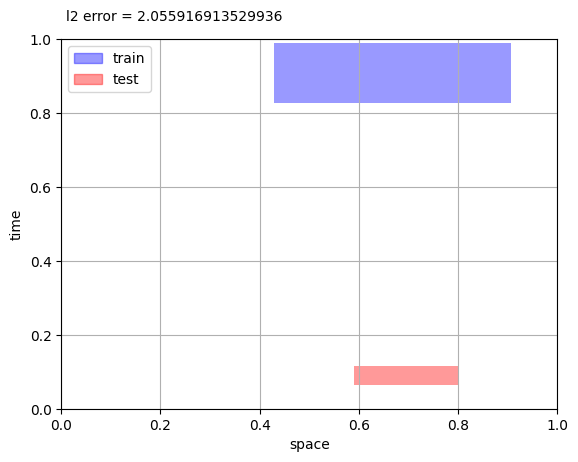

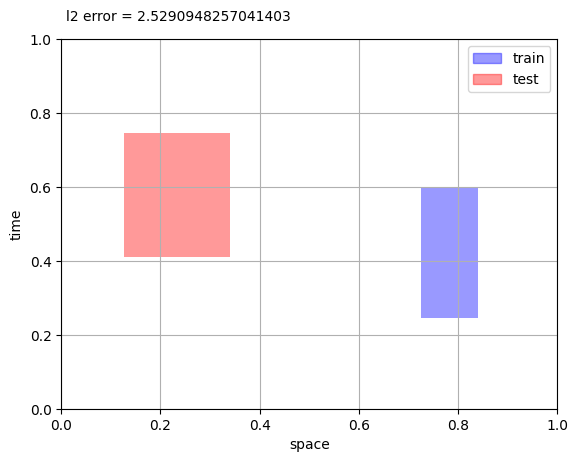

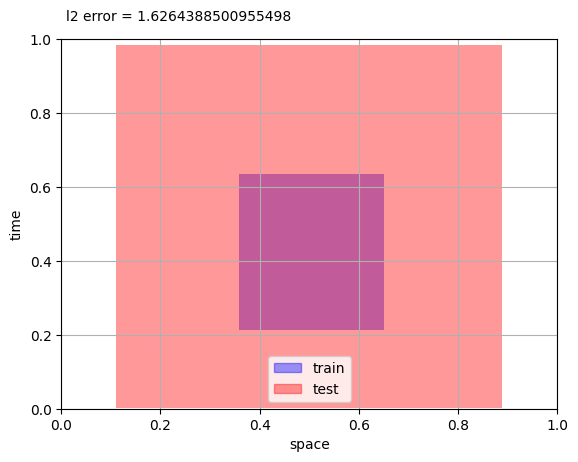

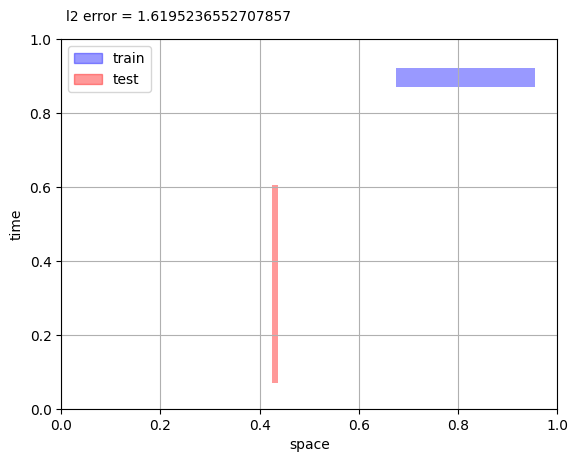

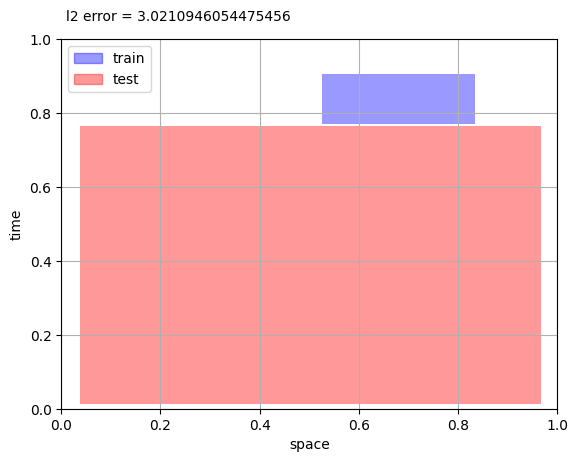

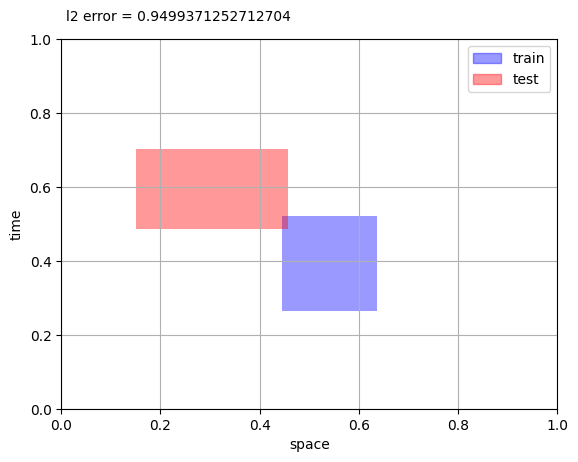

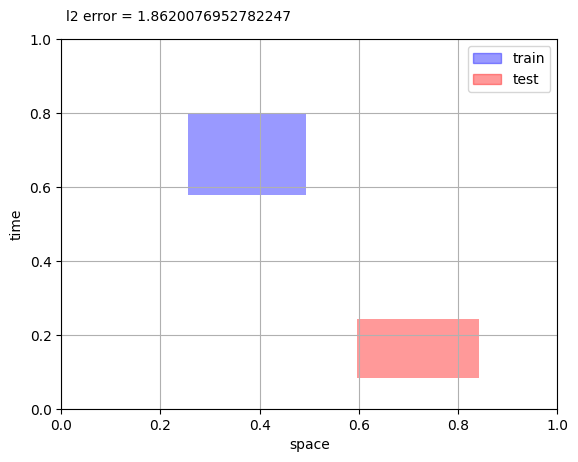

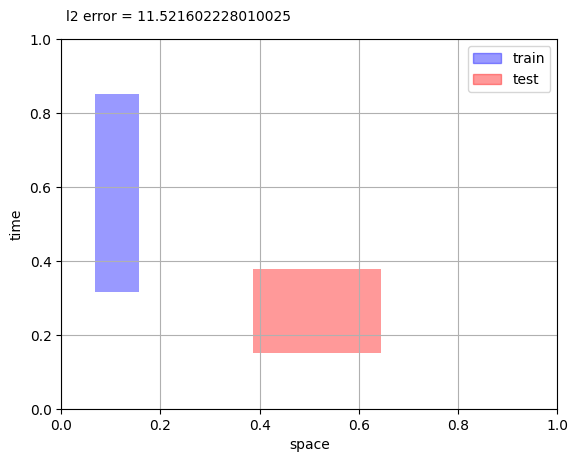

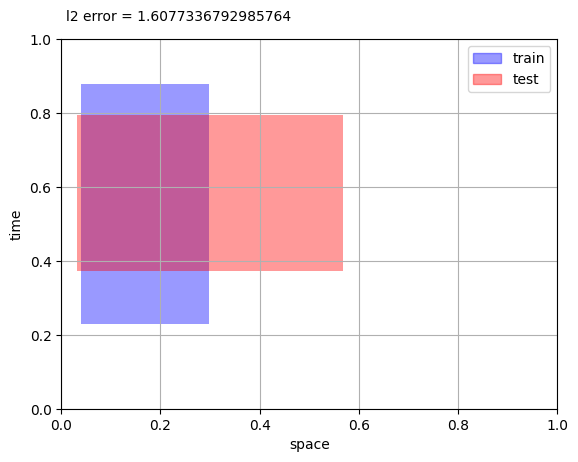

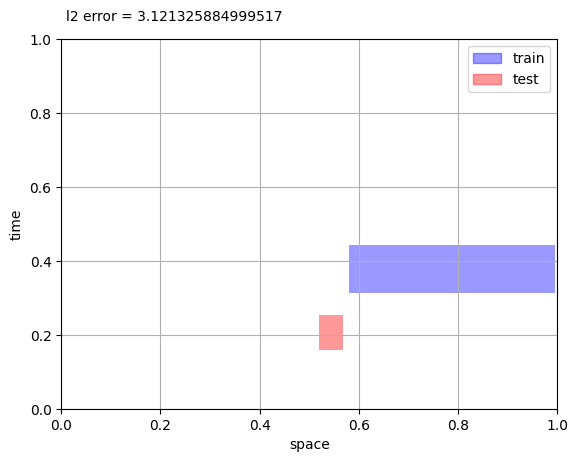

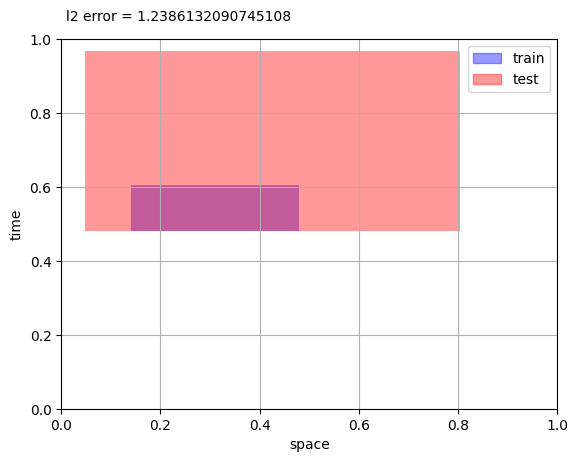

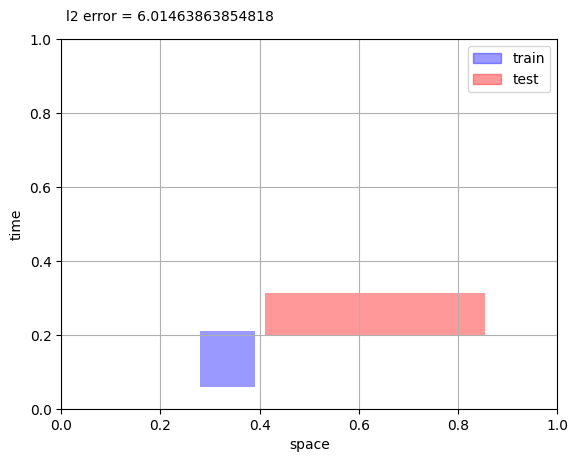

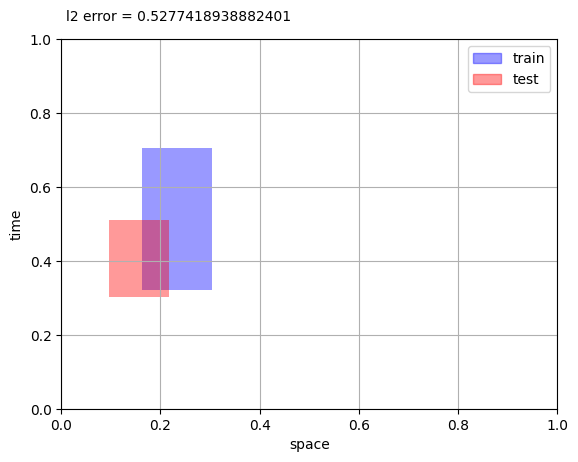

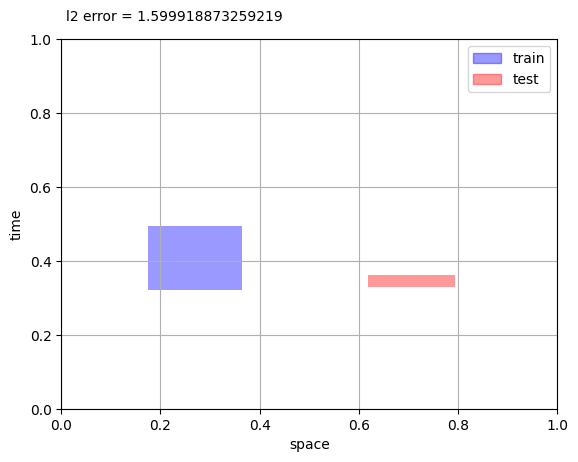

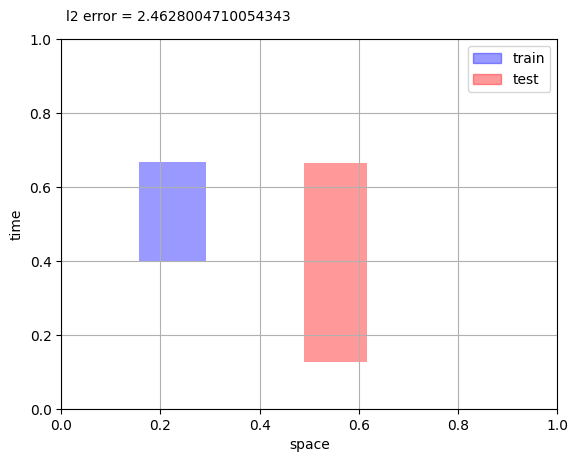

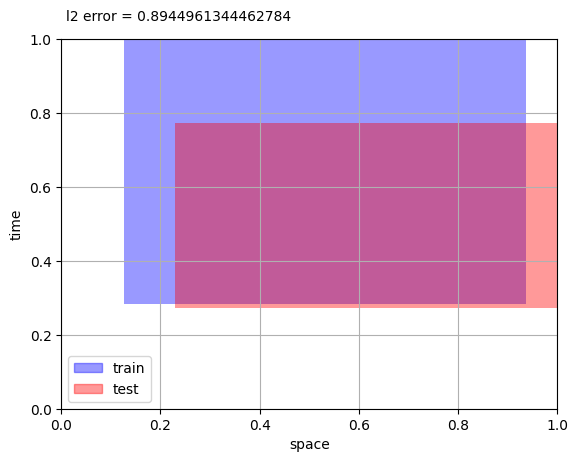

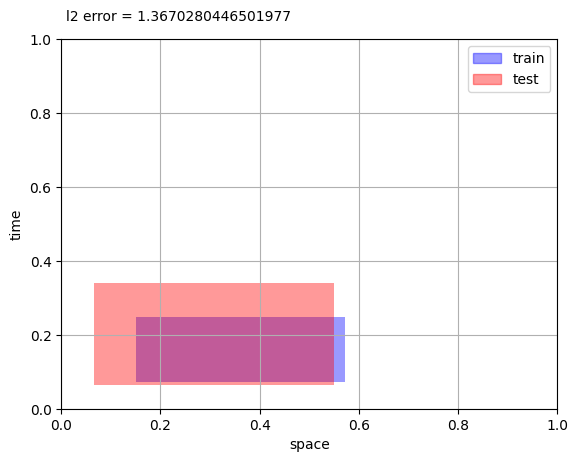

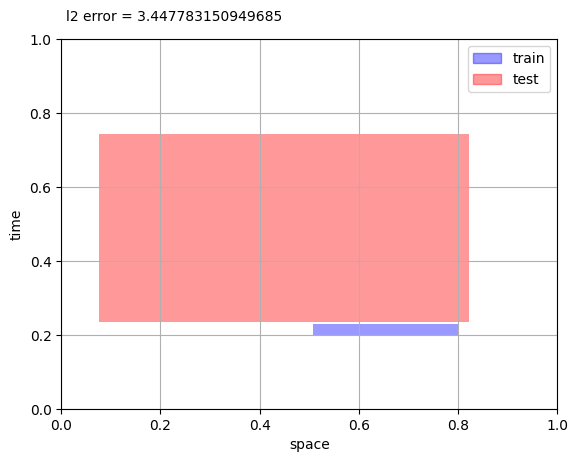

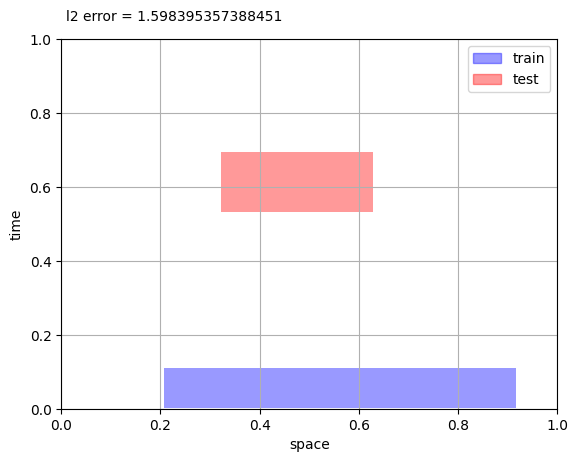

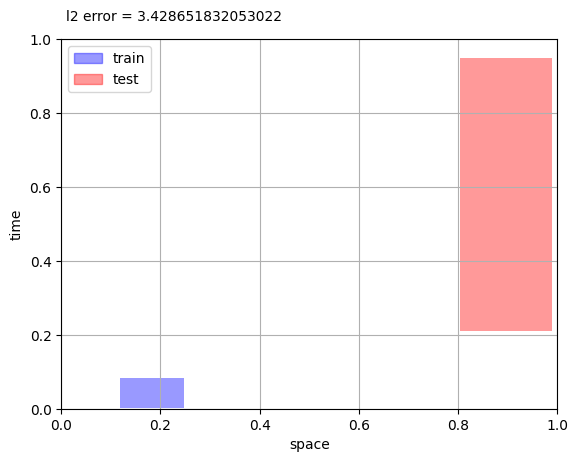

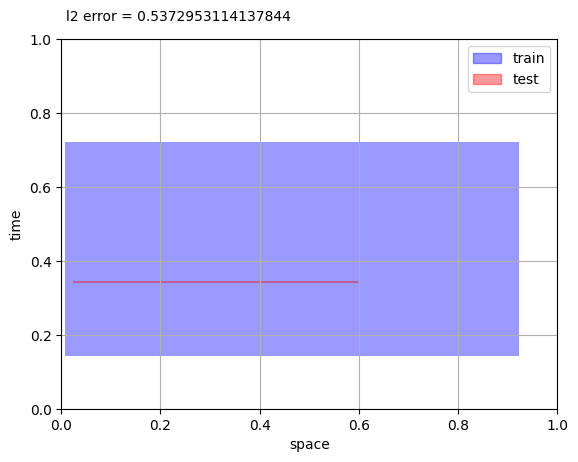

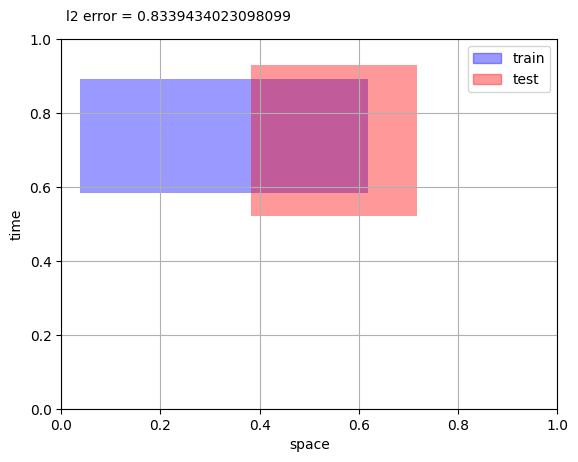

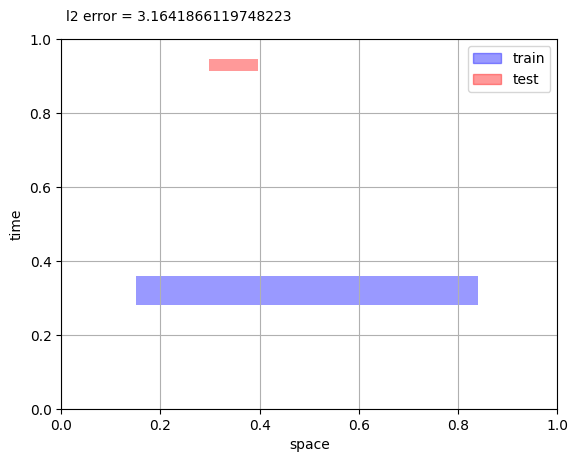

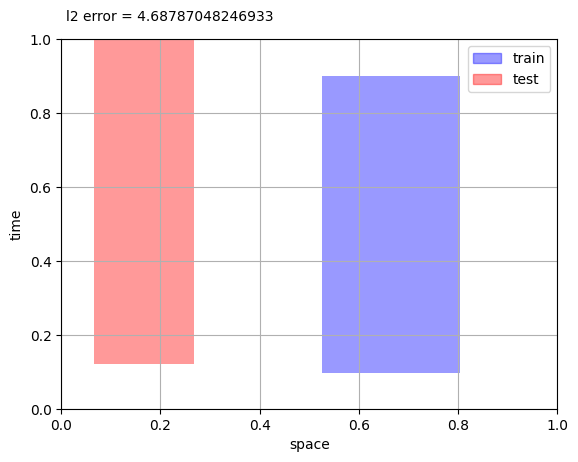

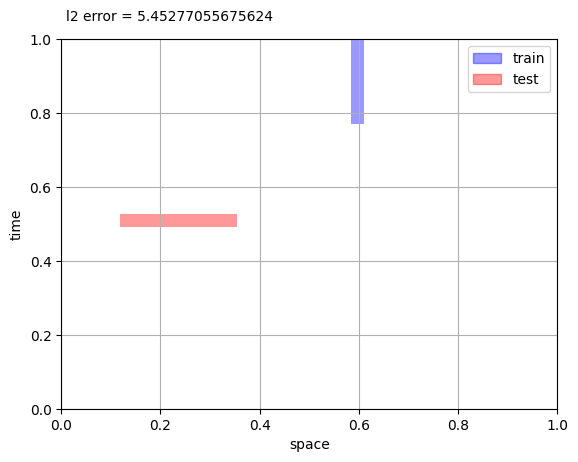

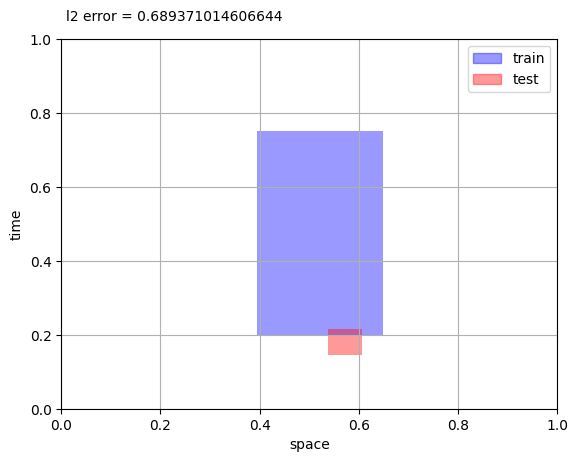

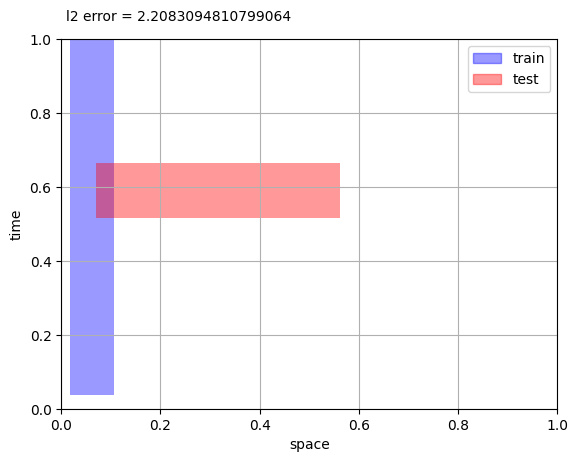

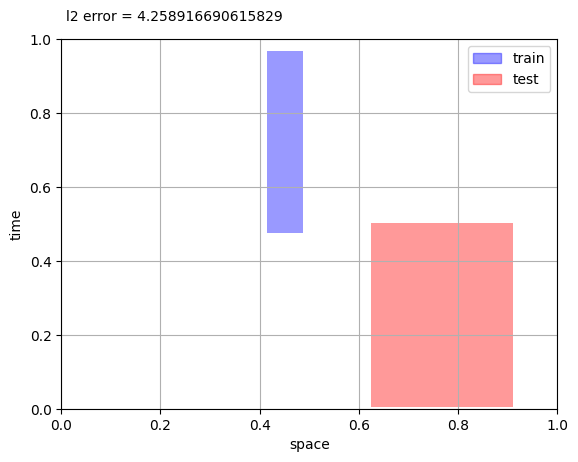

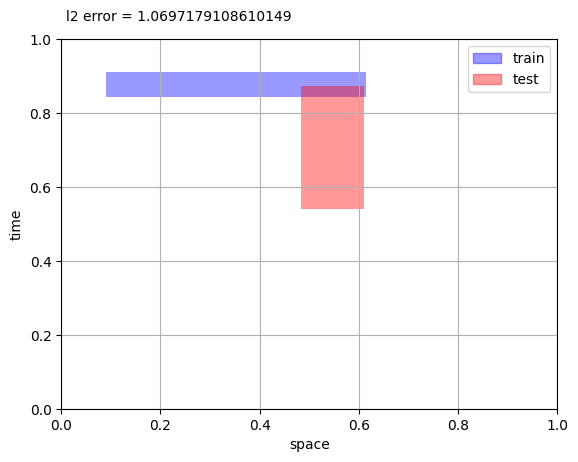

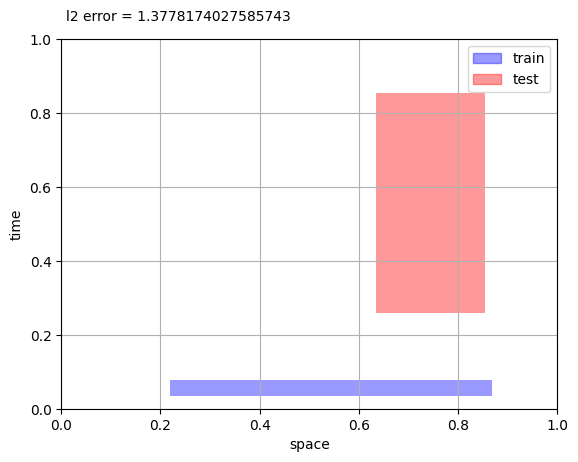

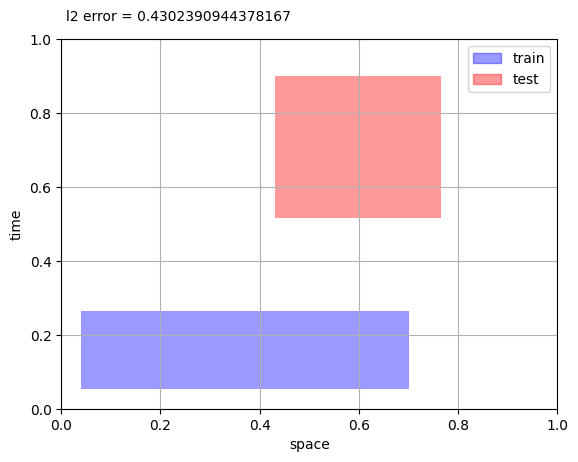

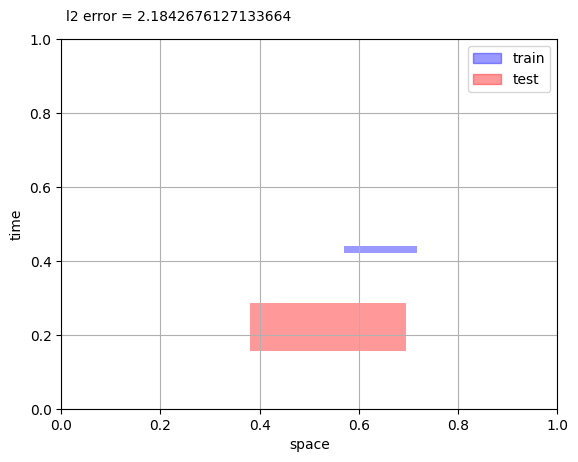

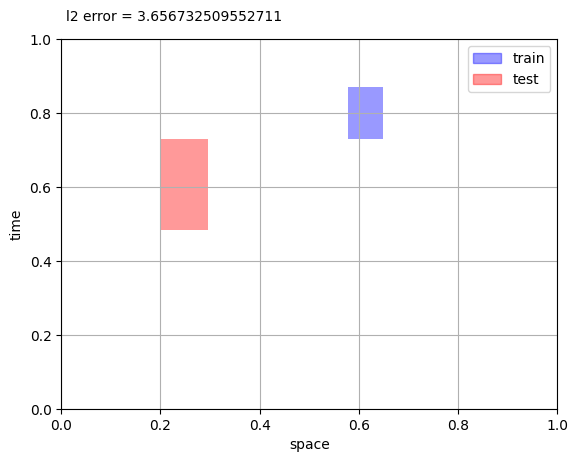

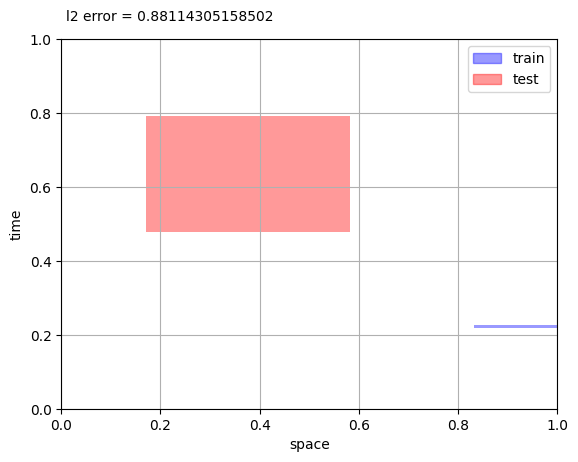

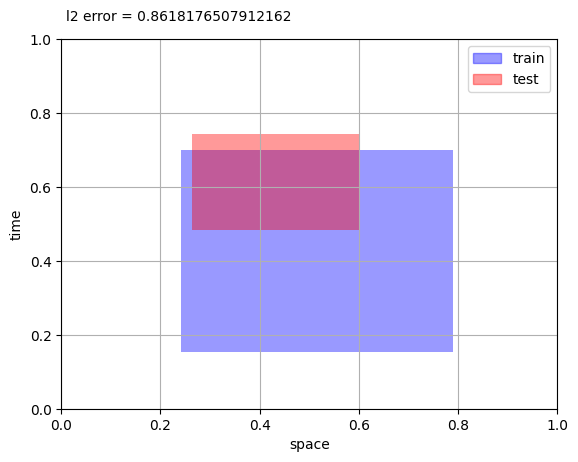

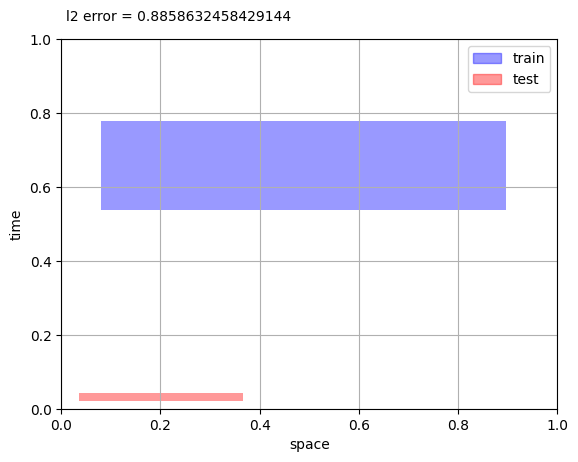

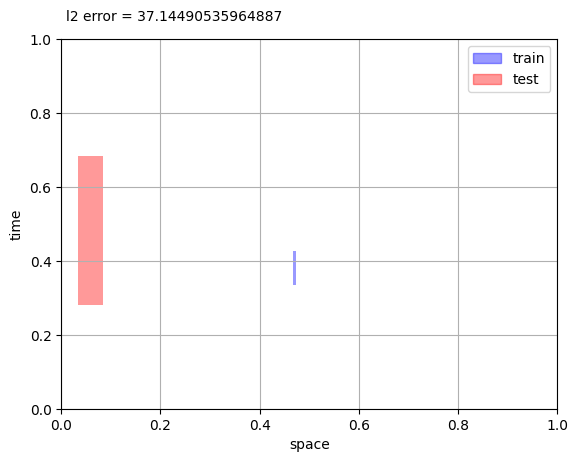

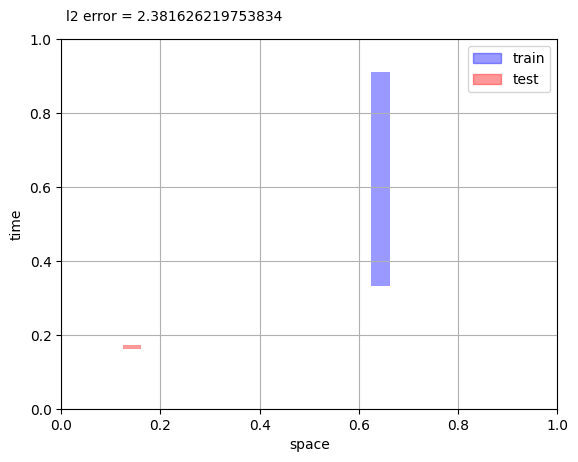

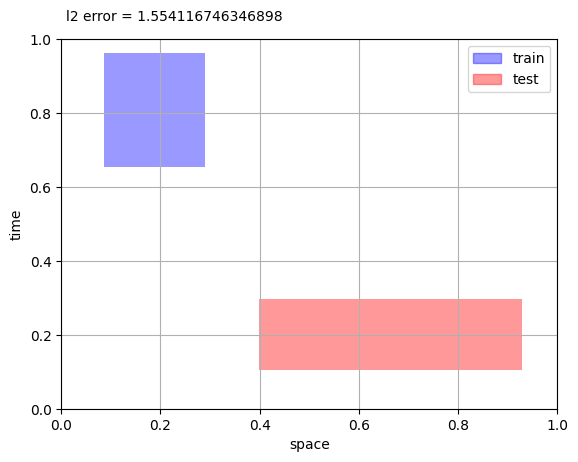

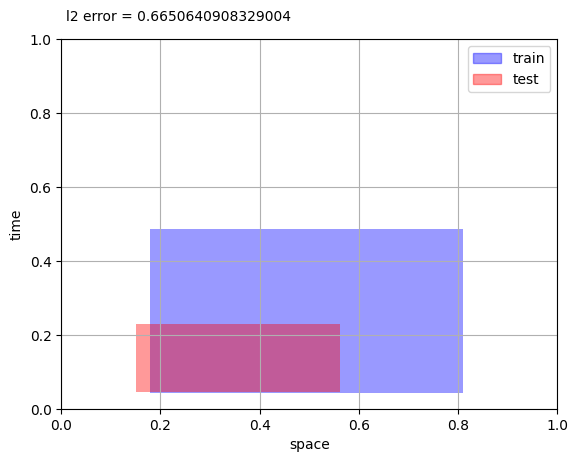

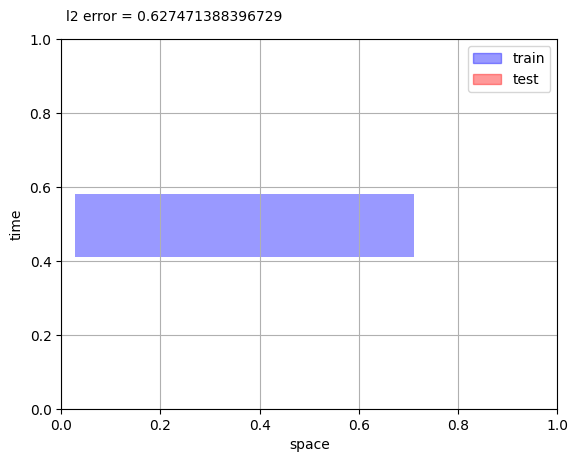

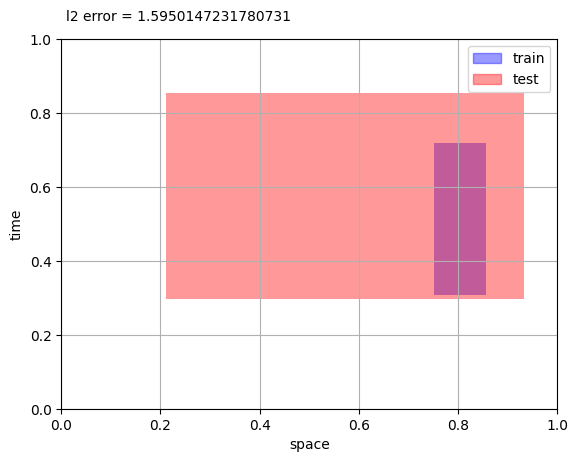

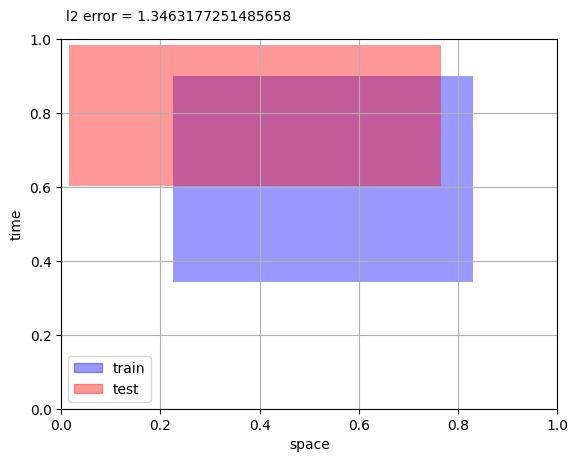

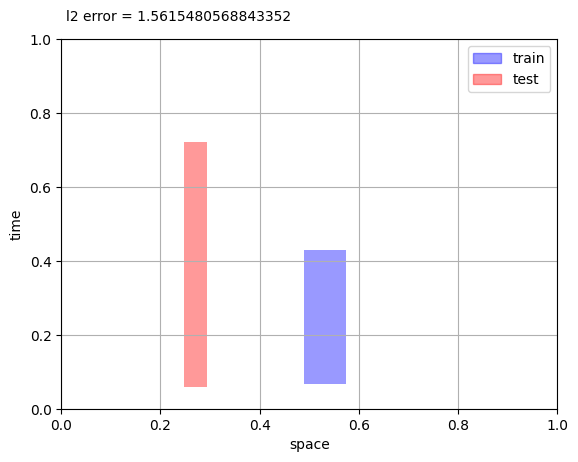

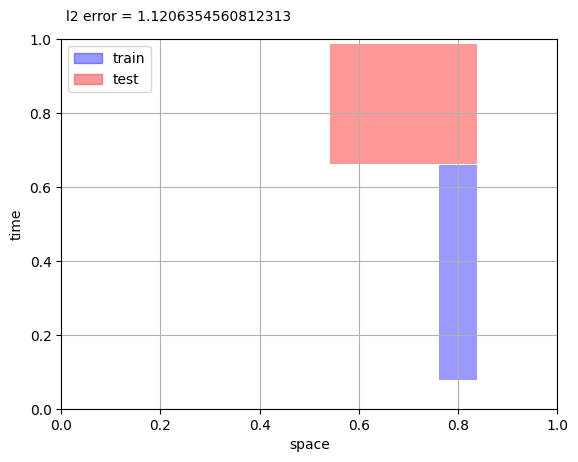

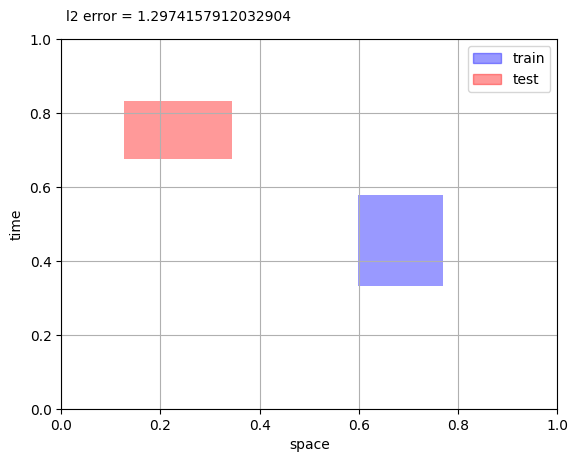

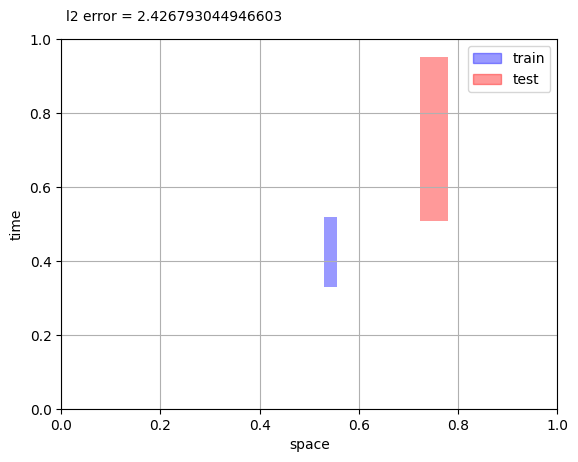

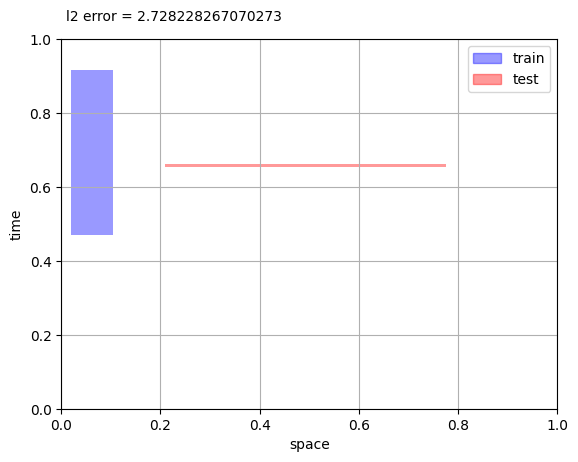

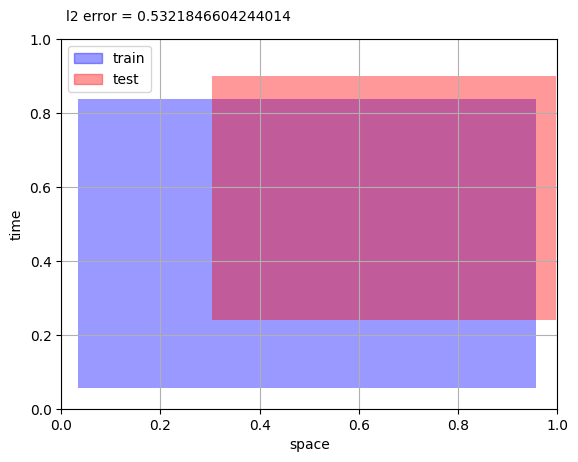

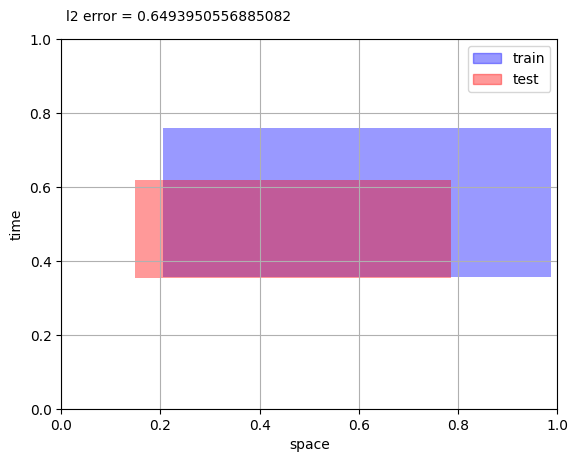

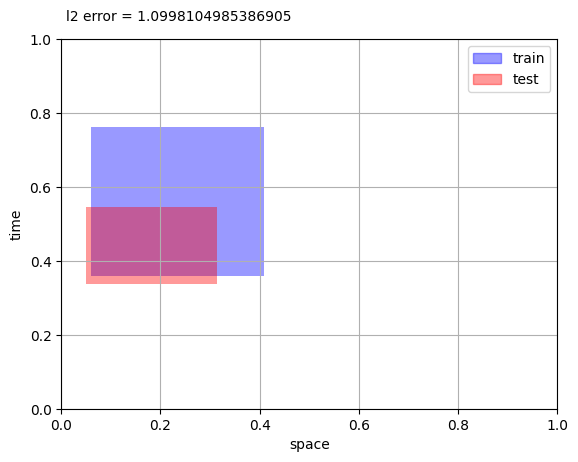

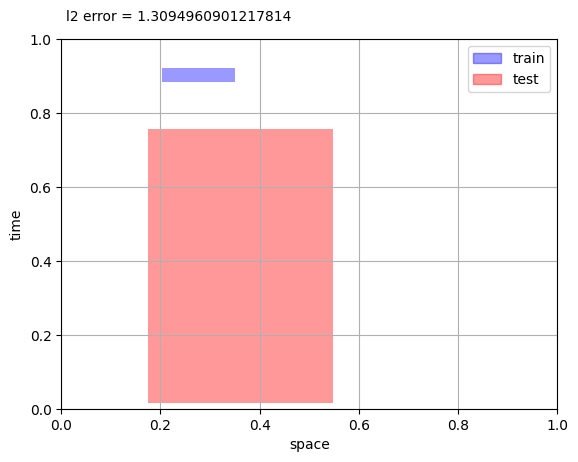

In [ ]:
for i in range(df.shape[0]):
    fig, ax = plt.subplots()
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_xlabel('space')
    ax.set_ylabel('time')
    ax.grid(True)
    blue_patch = mpatches.Patch(color='b', label='train', alpha=0.4)
    red_patch = mpatches.Patch(color='r', label='test', alpha=0.4)

    ax.legend(handles=[blue_patch, red_patch])
    ax.fill(train_geo[i], train_time[i], facecolor='b', alpha=0.4)
    ax.fill(test_geo[i], test_time[i], facecolor='r', alpha=0.4)
    ax.annotate(f"l2 error = {l2[i]}", xy=(test_geo[i][0], test_time[i][0]), xycoords='data', xytext=(0.01, 1.05), textcoords='axes fraction')

    plt.show()


In [ ]:
features = [[df.iloc[i]["train_geo_start"], df.iloc[i]["train_geo_end"], df.iloc[i]["train_time_start"], df.iloc[i]["train_time_end"], df.iloc[i]["test_geo_start"], df.iloc[i]["test_geo_end"], df.iloc[i]["test_geo_end"], df.iloc[i]["l2_relative_error"]] for i in range(df.shape[0])]

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

data_for_clustering = np.array(features)
kmeans = KMeans(n_clusters=8, random_state=0).fit(data_for_clustering)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_


array([5, 0, 0, 0, 0, 0, 6, 5, 5, 0, 4, 5, 5, 6, 7, 0, 5, 5, 4, 5, 0, 0,
       5, 5, 0, 0, 6, 5, 5, 5, 6, 0, 5, 6, 5, 5, 5, 0, 6, 2, 5, 0, 5, 4,
       5, 6, 6, 4, 5, 0, 0, 5, 4, 0, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 0, 6,
       5, 5, 5, 5, 5, 5, 5, 0, 6, 5, 0, 4, 7, 5, 0, 5, 5, 7, 5, 5, 5, 5,
       5, 5, 0, 0, 7, 6, 5, 5, 5, 0, 0, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 0, 6, 0, 5, 3, 5, 5, 5, 0, 6, 5, 4, 5, 4, 6,
       5, 0, 5, 4, 0, 5, 5, 5, 5, 5, 0, 0, 6, 5, 4, 5, 6, 4, 6, 0, 5, 5,
       4, 1, 5, 0, 6, 5, 5, 0, 5, 5, 0, 5, 5, 6, 0, 0, 5, 5, 0, 6, 0, 5,
       4, 5, 5, 5, 0, 0, 4, 5, 6, 0, 0, 5, 5, 0, 2, 0, 5, 0, 5, 0, 5, 0,
       5, 5, 0, 5, 0, 0, 5, 0, 5, 2, 5, 7, 6, 0, 5, 0, 0, 5, 6, 5, 0, 4,
       5, 5, 5, 0, 4, 5, 5, 2, 6, 0, 0, 6, 0, 5, 0, 0, 0, 6, 4, 6, 5, 0,
       0, 6, 5, 5, 5, 6, 0, 0, 0, 0, 0, 5, 0, 7, 0, 6, 5, 4, 5, 0, 0, 5,
       5, 6, 0, 6, 5, 5, 6, 6, 4, 5, 0, 6, 5, 5, 5, 0, 6, 5, 5, 5, 3, 0,
       0, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 5, 5, 5], d

In [ ]:
# read csv's and parse data

import pandas as pd

df = pd.read_csv('/content/data/results_1712006162_.csv', header=0)


In [ ]:
df[:2]

train_time_start  train_time_end  train_geo_start  train_geo_end  \
0          0.211019        0.803899         0.678179       0.929677   
1          0.473742        0.941083         0.091312       0.936563   

   test_time_start  test_time_end  test_geo_start  test_geo_end  \
0         0.210999       0.264935        0.507960      0.748393   
1         0.063483       0.321247        0.173987      0.600461   

   mean_residual  l2_relative_error  
0      12.317195           2.139811  
1       0.852570           0.827600

In [ ]:
train_geo = [[df.iloc[i]["train_geo_start"], df.iloc[i]["train_geo_end"], df.iloc[i]["train_geo_end"], df.iloc[i]["train_geo_start"]] for i in range(df.shape[0])]
test_geo = [[df.iloc[i]["test_geo_start"], df.iloc[i]["test_geo_end"], df.iloc[i]["test_geo_end"], df.iloc[i]["test_geo_start"]] for i in range(df.shape[0])]
train_time = [[df.iloc[i]["train_time_start"], df.iloc[i]["train_time_start"], df.iloc[i]["train_time_end"], df.iloc[i]["train_time_end"]] for i in range(df.shape[0])]
test_time = [[df.iloc[i]["test_time_start"], df.iloc[i]["test_time_start"], df.iloc[i]["test_time_end"], df.iloc[i]["test_time_end"]] for i in range(df.shape[0])]
l2 = [df.iloc[i]["l2_relative_error"] for i in range(df.shape[0])]


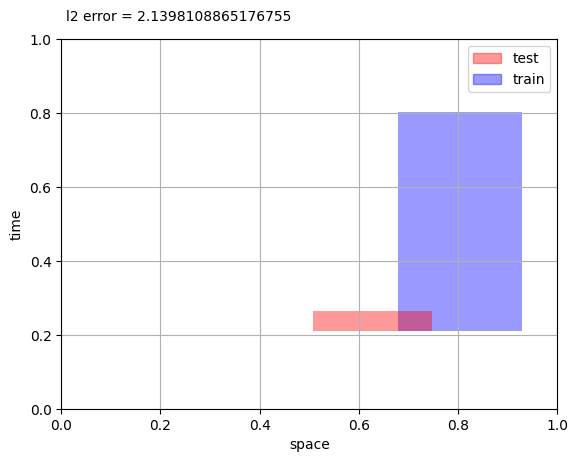

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



fig, ax = plt.subplots()
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.set_xlabel('space')
ax.set_ylabel('time')
ax.grid(True)
red_patch = mpatches.Patch(color='r', label='test', alpha=0.4)
blue_patch = mpatches.Patch(color='b', label='train', alpha=0.4)

ax.legend(handles=[red_patch, blue_patch])

ax.fill(train_geo[0], train_time[0], facecolor='b', alpha=0.4)
ax.fill(test_geo[0], test_time[0], facecolor='r', alpha=0.4)
ax.annotate(f"l2 error = {l2[0]}", xy=(test_geo[0][0], test_time[0][0]), xycoords='data', xytext=(0.01, 1.05), textcoords='axes fraction')

plt.show()

In [ ]:
# iterate over loaded dataframe to make a list of

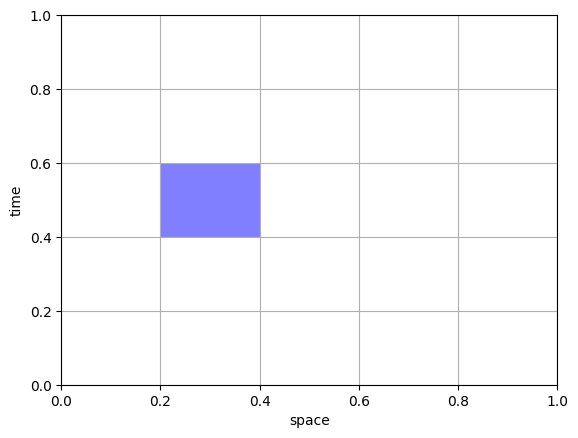

In [ ]:
import matplotlib.pyplot as plt

# Horizontal bar plot with gaps
fig, ax = plt.subplots()
# ax.broken_barh([(0.5, 0.6)], (0.1, 0.2), facecolors='b', alpha=0.5)
# ax.broken_barh([(10, 50), (100, 20), (130, 10)], (10, 9),
#                facecolors=('tab:orange', 'tab:green', 'tab:red'), alpha=0.2)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.set_xlabel('space')
ax.set_ylabel('time')

#ax.set_yticks([15, 25], labels=['Bill', 'Jim'])     # Modify y-axis tick labels
ax.grid(True)                                       # Make grid lines visible
# ax.annotate('race interrupted', (61, 25),
#             xytext=(0.8, 0.9), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             fontsize=16,
#             horizontalalignment='right', verticalalignment='top')

ax.fill([0.2, 0.4, 0.4, 0.2], [0.4, 0.4, 0.6, 0.6], facecolor='b', alpha=0.5)
plt.show()